In [1]:
#importing Important Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from scipy import stats

In [2]:
#loading data
df=pd.read_csv("C:\\Users\\chora\\OneDrive\\Desktop\\Nexthike\\housing_data.csv")

In [3]:
#Checking Load data
df.head()

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           0       SC60       RL           65     8450   Pave   NaN      Reg   
1           1       SC20       RL           80     9600   Pave   NaN      Reg   
2           2       SC60       RL           68    11250   Pave   NaN      IR1   
3           3       SC70       RL           60     9550   Pave   NaN      IR1   
4           4       SC60       RL           84    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     No    No          No       0    Feb   
1         Lvl    AllPub  ...        0     No    No          No       0    May   
2         Lvl    AllPub  ...        0     No    No          No       0    Sep   
3         Lvl    AllPub  ...        0     No    No          No       0    Feb   
4         Lvl    AllPub  ...        0     No    No          No       0    Dec   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
#Checking Shape of Dataset
df.shape

(1460, 81)

In [5]:
#Checking Column Name of Dataset
df.columns

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

# Dropping Unwanted Column

In [6]:
#Dropping Unwanted column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.shape

(1460, 80)

# Checking Null Values

In [8]:


df.isna().sum().tolist()

[0,
 0,
 0,
 0,
 0,
 1369,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 872,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 81,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

# Filling Null values

In [9]:
def fill_missing_values(df):
   
    # Fill missing values in numerical columns with the mean
    numerical_cols = df.select_dtypes(include='number').columns
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

    # Fill missing values in object (categorical) columns with the mode
    object_cols = df.select_dtypes(include='object').columns
    df[object_cols] = df[object_cols].fillna(df[object_cols].mode().iloc[0])

    return df

In [10]:
df1=fill_missing_values(df)

In [11]:
df1.isna().sum().tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   int64  
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [14]:
#Describing Statical values of Numerical Columns
df1.describe().T

count           mean           std      min        25%  \
LotFrontage    1460.0      57.623288     34.664304      0.0      42.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1460.0     103.117123    180.731373      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1460.0    1978.506164     23.994583   1900.0    1962.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                         50%        75%       max  
LotFrontage        63.000000      79.00     313.0  
LotArea          9478.500000   11601.50  215245.0  
OverallQual         6.000000       7.00      10.0  
OverallCond         5.000000       6.00       9.0  
YearBuilt        1973.000000    2000.00    2010.0  
YearRemodAdd     1994.000000    2004.00    2010.0  
MasVnrArea          0.000000     164.25    1600.0  
BsmtFinSF1        383.500000     712.25    5644.0  
BsmtFinSF2          0.000000       0.00    1474.0  
BsmtUnfSF         477.500000     808.00    2336.0  
TotalBsmtSF       991.500000    1298.25    6110.0  
1stFlrSF         1087.000000    1391.25    4692.0  
2ndFlrSF            0.000000     728.00    2065.0  
LowQualFinSF        0.000000       0.00     572.0  
GrLivArea        1464.000000    1776.75    5642.0  
BsmtFullBath        0.000000       1.00       3.0  
BsmtHalfBath        0.000000       0.00       2.0  
FullBath            2.000000       2.00       3.0  
HalfBath            0.000000       1.00       2.0  
BedroomAbvGr        3.000000       3.00       8.0  
KitchenAbvGr        1.000000       1.00       3.0  
TotRmsAbvGrd        6.000000       7.00      14.0  
Fireplaces          1.000000       1.00       3.0  
GarageYrBlt      1978.506164    2001.00    2010.0  
GarageCars          2.000000       2.00       4.0  

# Checking Duplicate Values

In [15]:
df1.duplicated().sum()

0

# Univariant Analysis

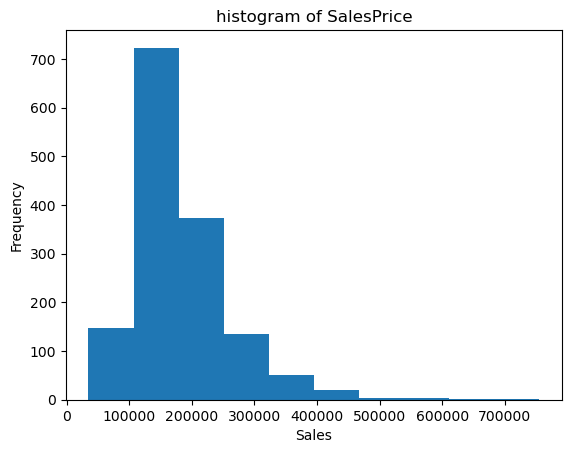

In [16]:
# histogram
plt.hist(df1['SalePrice'], bins = 10) 
plt.title("histogram of SalesPrice")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

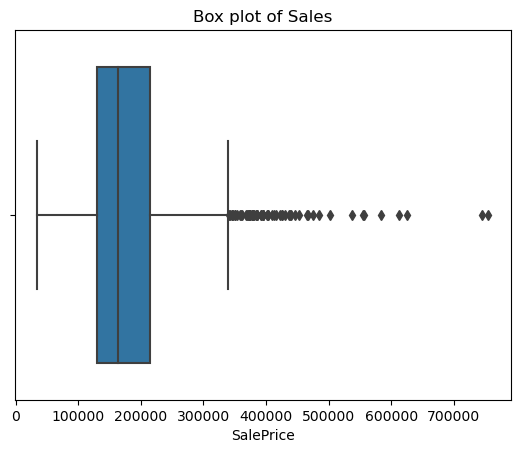

In [17]:
# Box plot
sns.boxplot(x = df1['SalePrice'])
plt.title("Box plot of Sales")
plt.show()

In [ ]:
# As we can see there is lot of outliers in Sale price


In [42]:
# Handling outliers using IQR
def handle_outliers(df1, outlier_threshold=1.5):
    numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns

    for col in numeric_cols:
        Q1 = df1[col].quantile(0.25)
        Q3 = df1[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - outlier_threshold * IQR
        upper_bound = Q3 + outlier_threshold * IQR

        df1[col] = df1[col].apply(lambda x: x if lower_bound <= x <= upper_bound else df1[col].median())

    return df

# Apply the function to handle outliers
df1 = handle_outliers(df1)

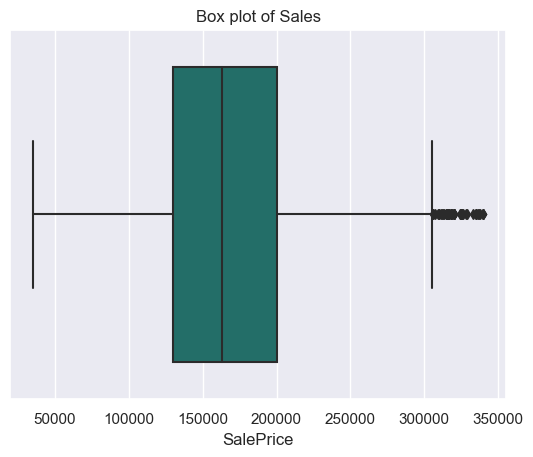

In [43]:
# Box plot after outliers
sns.boxplot(x = df1['SalePrice'])
plt.title("Box plot of Sales")
plt.show()

In [ ]:
## from above finding its shows how to treat outliers and before and after effect of outliers

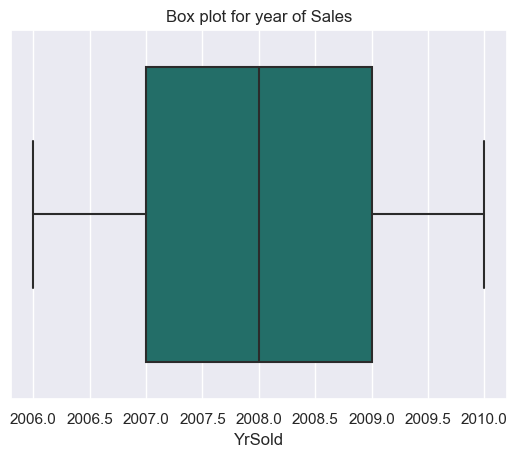

In [44]:
# Box plot
sns.boxplot(x = df1['YrSold'])
plt.title("Box plot for year of Sales")
plt.show()

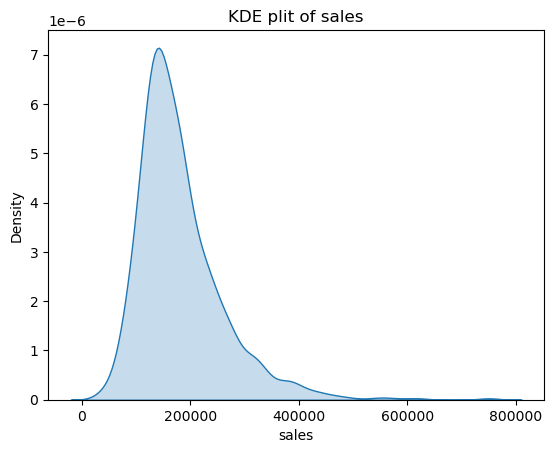

In [18]:
# Kernel Density Estimation
sns.kdeplot(df1['SalePrice'], shade = True)
plt.title("KDE plit of sales")
plt.xlabel("sales")
plt.ylabel('Density')
plt.show()

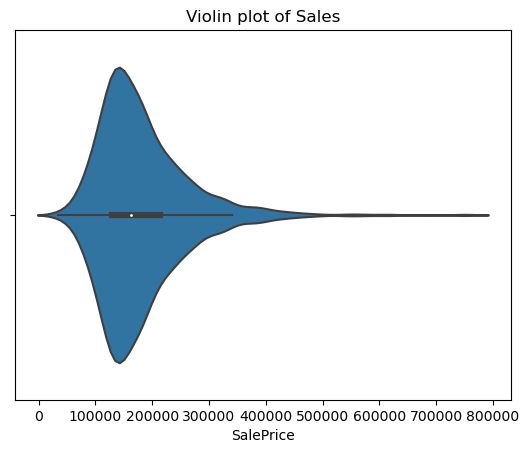

In [19]:
# Violin plots
sns.violinplot(x=df1['SalePrice'])
plt.title('Violin plot of Sales')
plt.show()

In [20]:
# 1. Shapiro-Wilk test
# Test the normality
stat, p = stats.shapiro(df1['SalePrice'])

In [21]:
stat

0.869672954082489

In [22]:
p

3.2072044604461286e-33

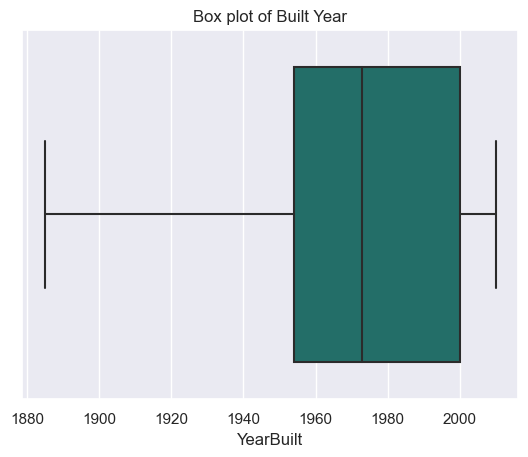

In [45]:
# Box plot
sns.boxplot(x = df1['YearBuilt'])
plt.title("Box plot of Built Year")
plt.show()

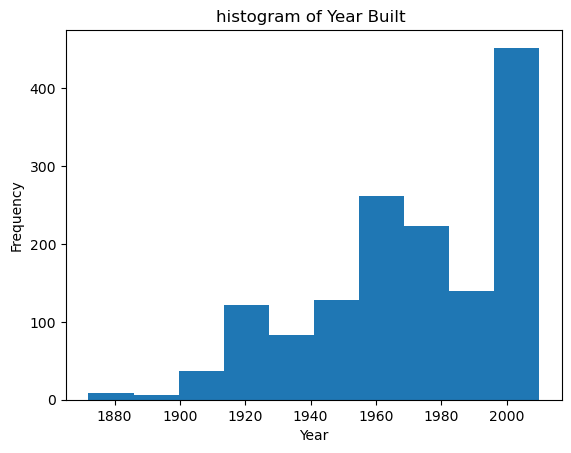

In [24]:
# histogram
plt.hist(df1['YearBuilt'], bins = 10) 
plt.title("histogram of Year Built ")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

In [25]:
# Defining a function to separate categorical and numerical data
def separate_categorical_and_continious(df1):
    categorical_cols, numerical_cols = [] , []
    for cols in df1.columns:
        if df1[cols].dtypes == "object":
            categorical_cols.append(cols)
        else:
            numerical_cols.append(cols)
    return categorical_cols, numerical_cols

In [26]:
separate_categorical_and_continious(df1)

(['MSSubClass',
  'MSZoning',
  'Street',
  'Alley',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'Heating',
  'HeatingQC',
  'CentralAir',
  'Electrical',
  'KitchenQual',
  'Functional',
  'FireplaceQu',
  'GarageType',
  'GarageFinish',
  'GarageQual',
  'GarageCond',
  'PavedDrive',
  'PoolQC',
  'Fence',
  'MiscFeature',
  'MoSold',
  'SaleType',
  'SaleCondition'],
 ['LotFrontage',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'B

In [27]:
def univariate_analysis(data):
    # Plot cat charts --> bar and pie
    # Plot contnious charts --> historam and boxplot
    for cols in data.columns:
        # If the col is representing a category
        if data[cols].dtypes == "object":
            plt.figure(figsize = [10,10])
            # This is for the first subplot
            plt.subplot(1,2,1)
            sns.barplot(x=data[cols].value_counts().index,
                        y=data[cols].value_counts().values,
                        color = "darkblue",
                        orient = "v")
            # This is for the second subplot
            plt.subplot(1,2,2)
            plt.pie(labels=data[cols].value_counts().index,
                    x=data[cols].value_counts().values,
                    autopct = '%1.2f%%')
            plt.title("Categorical Distribution of the {}".format(cols))
            plt.show();

        # If the col is representing a numerical field
        else:
            plt.figure(figsize = [10,10])
            # This is for the first subplot
            plt.subplot(1,2,1)
            sns.histplot(x = cols, data = data, color = "darkblue")
            # This is for the second subplot
            plt.subplot(1,2,2)
            sns.boxplot(x = cols, data = data, color = "darkblue")
            plt.title("Continious Distribution of the {}".format(cols))
            plt.show();

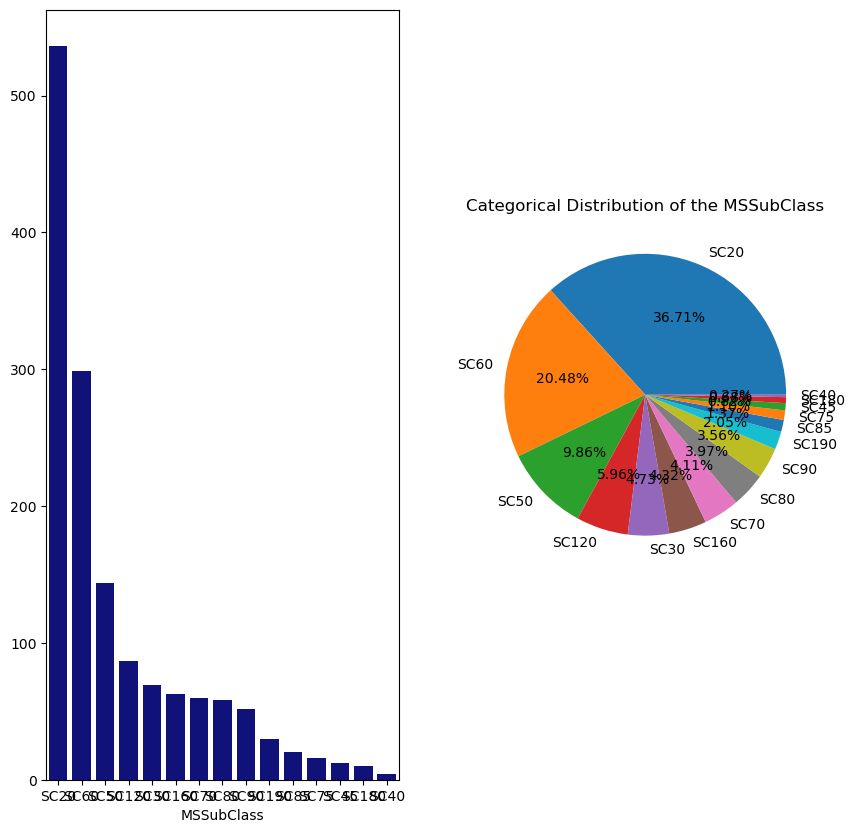

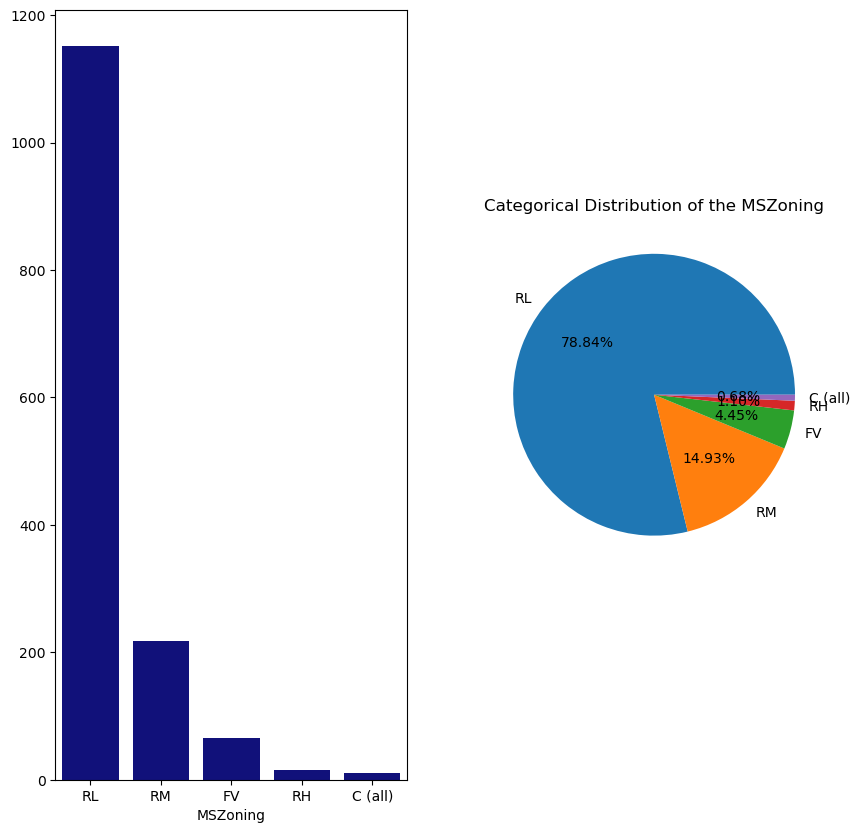

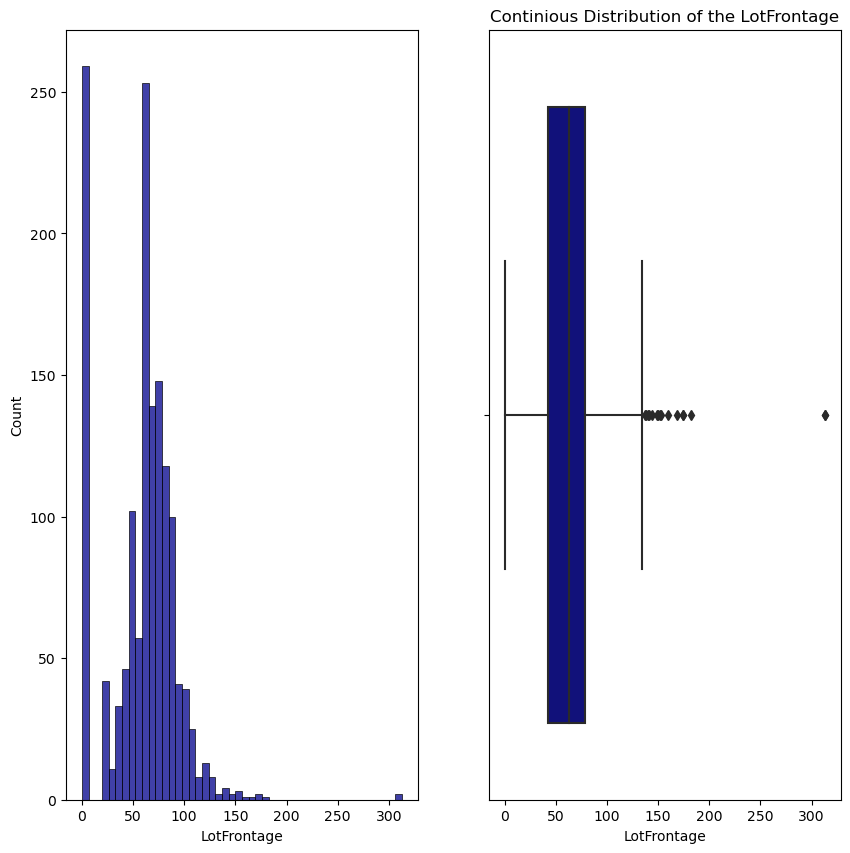

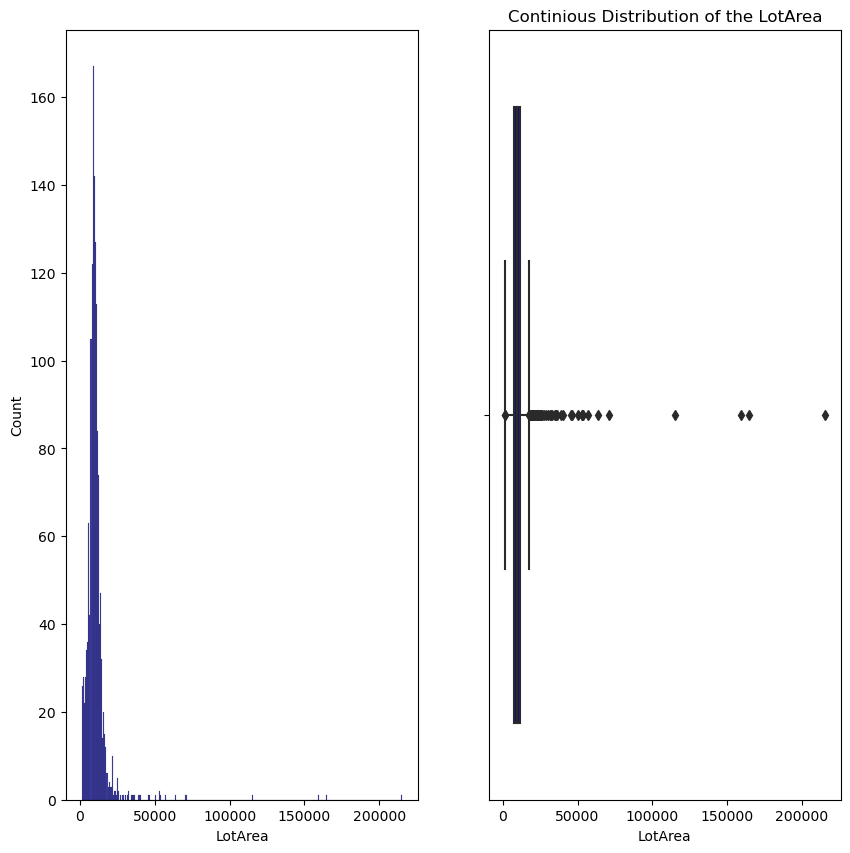

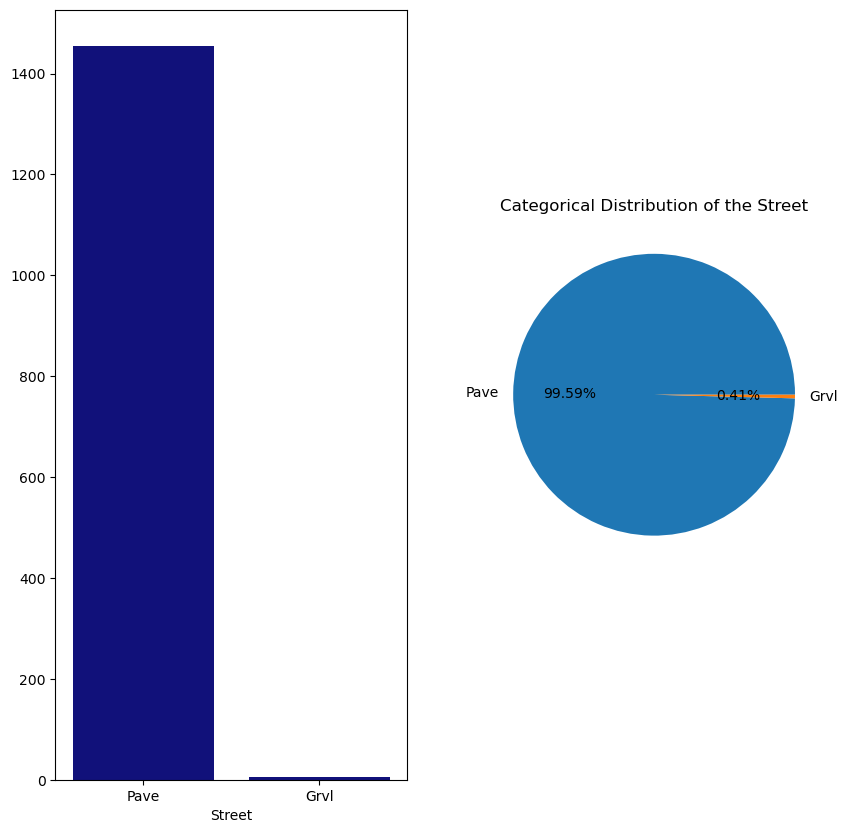

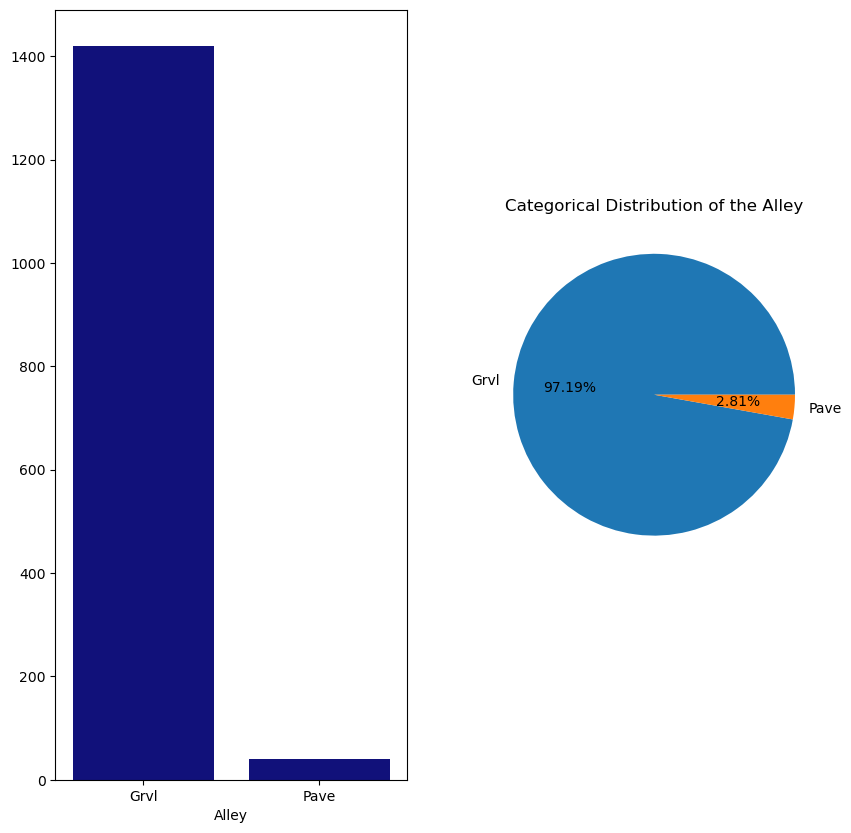

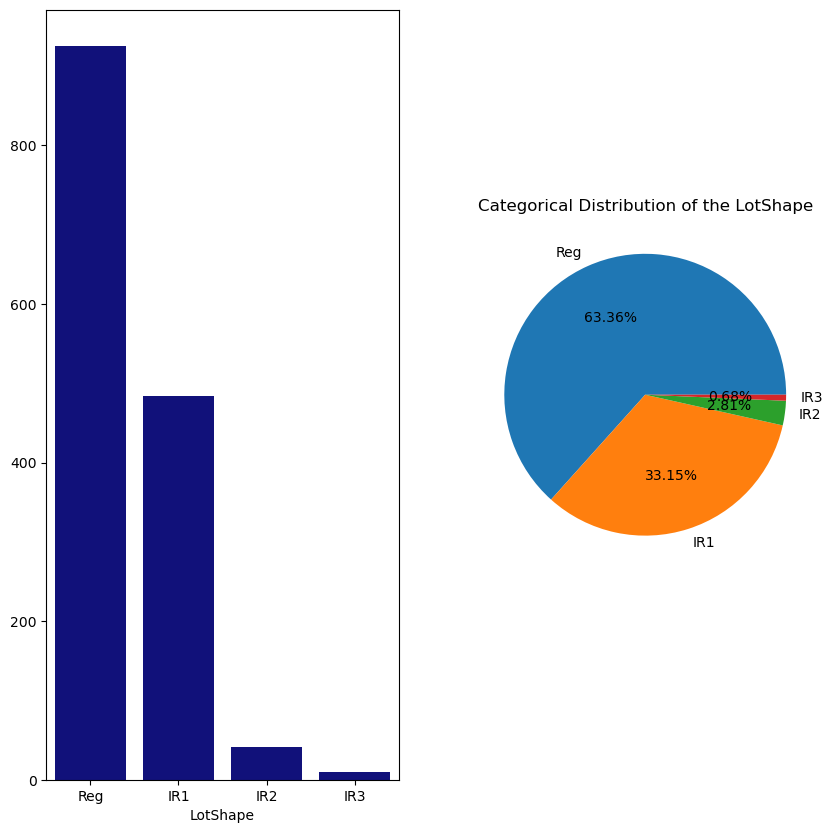

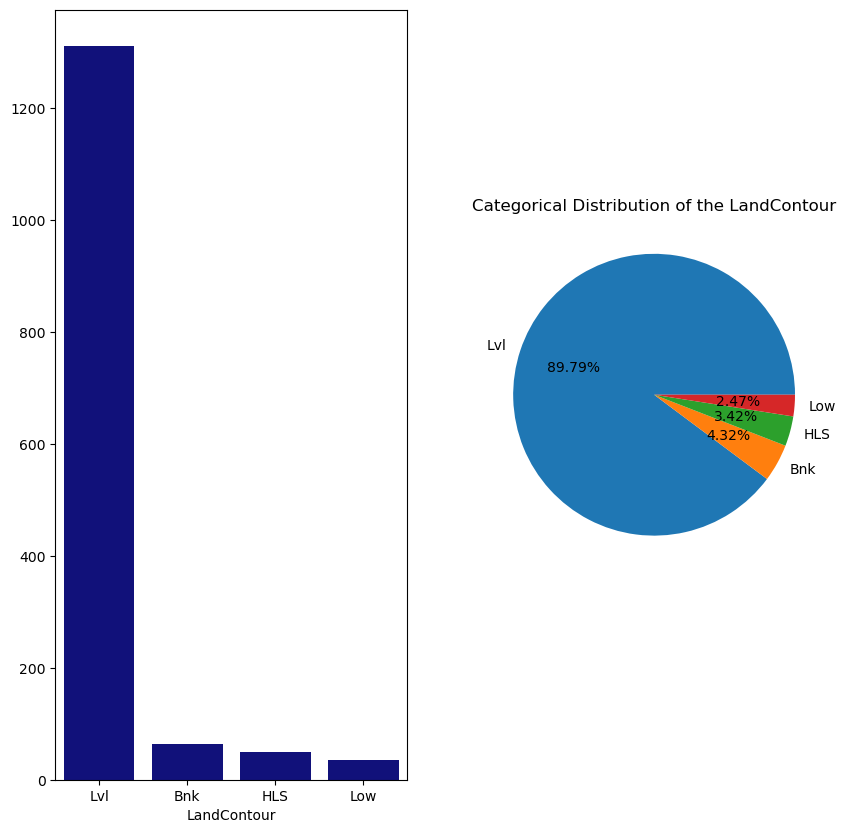

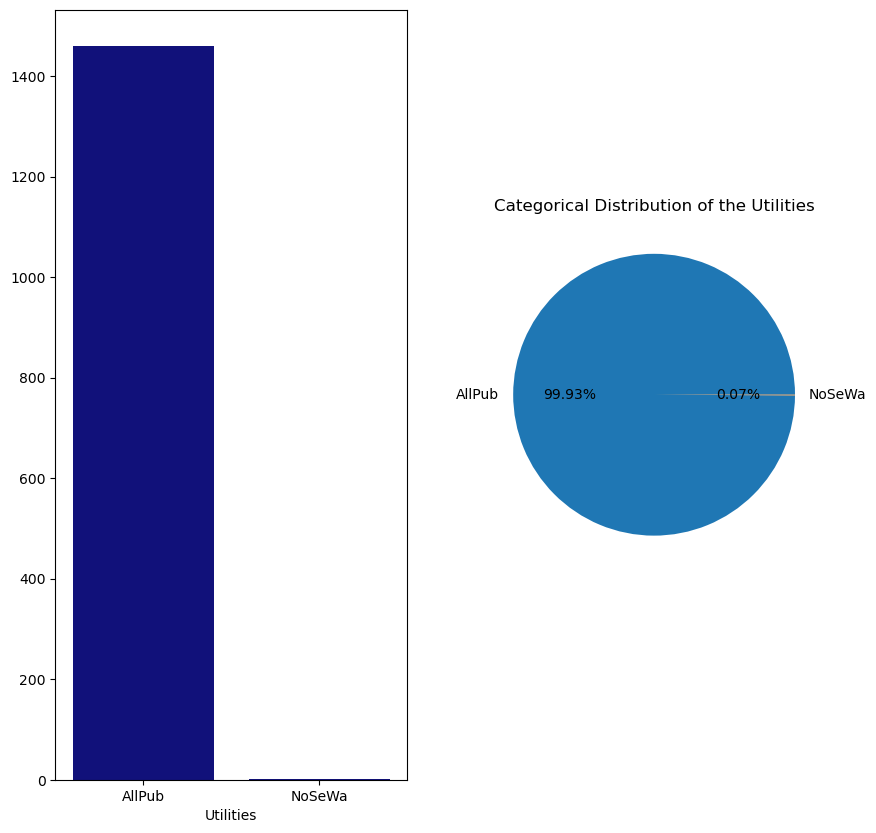

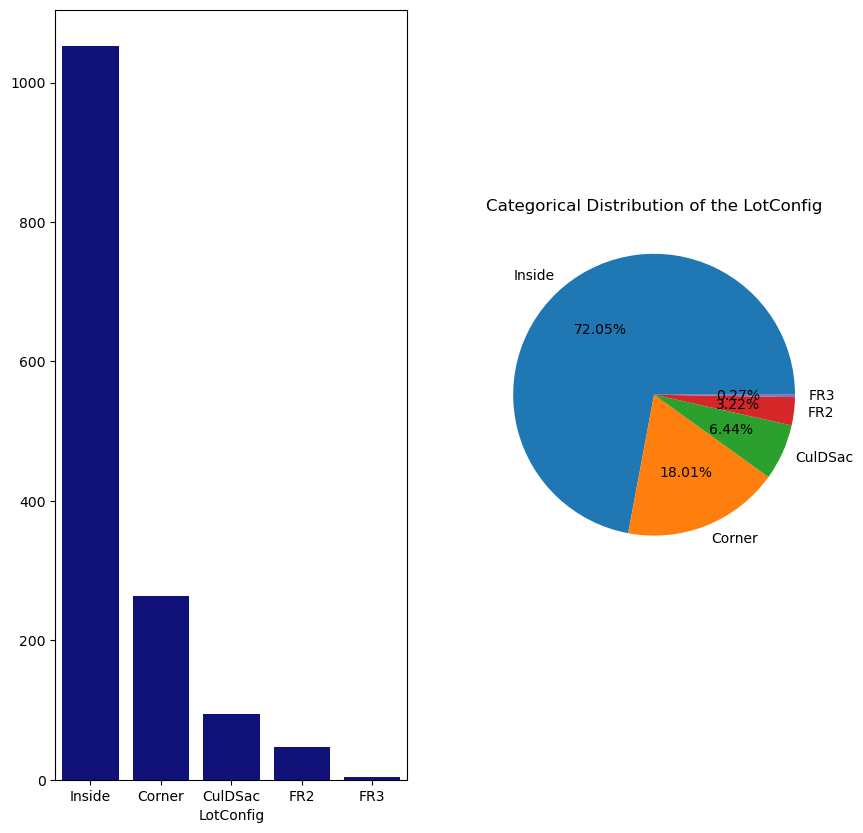

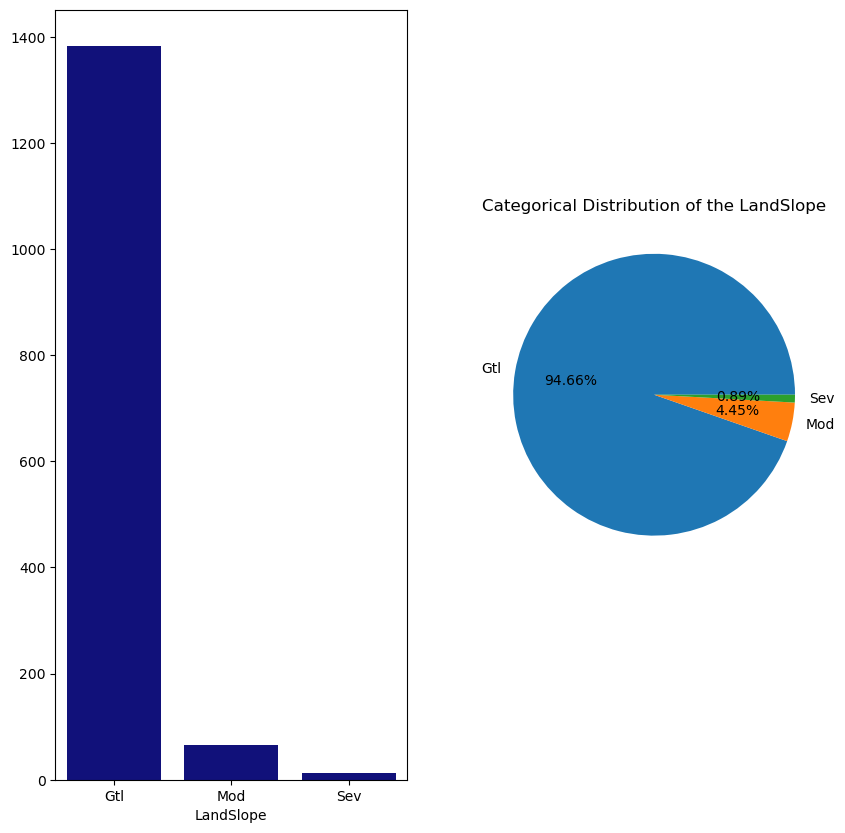

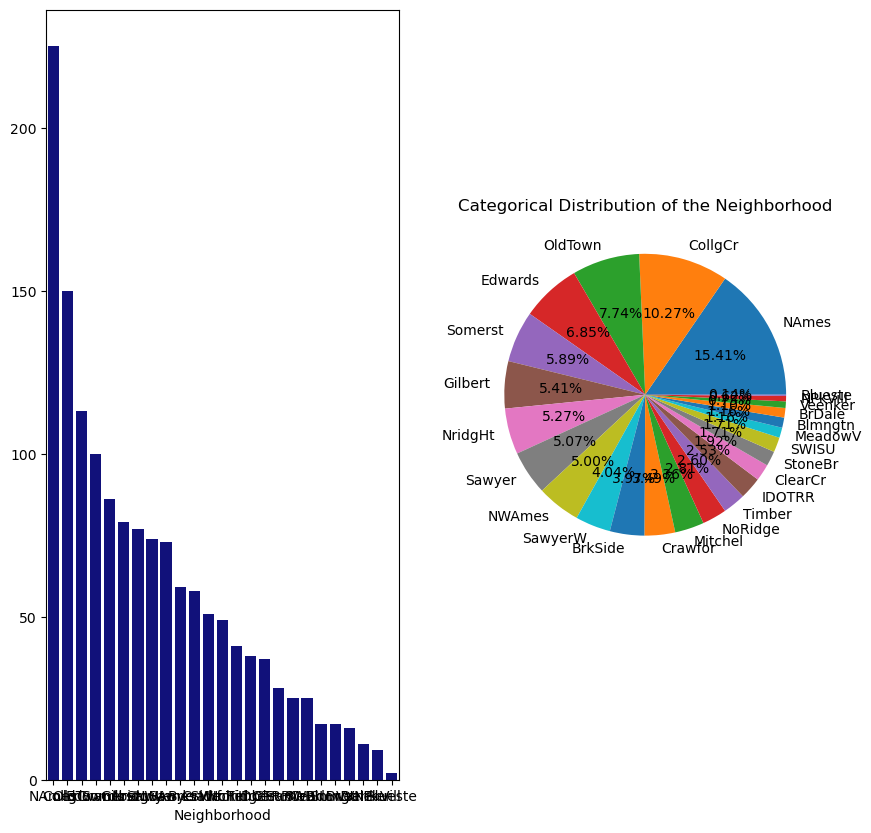

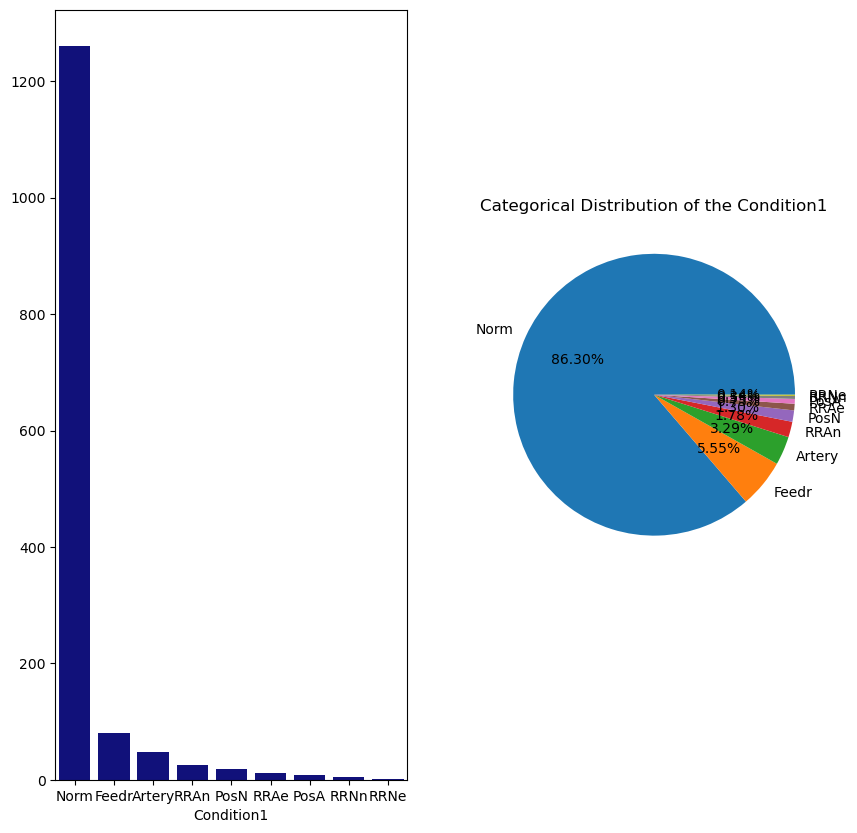

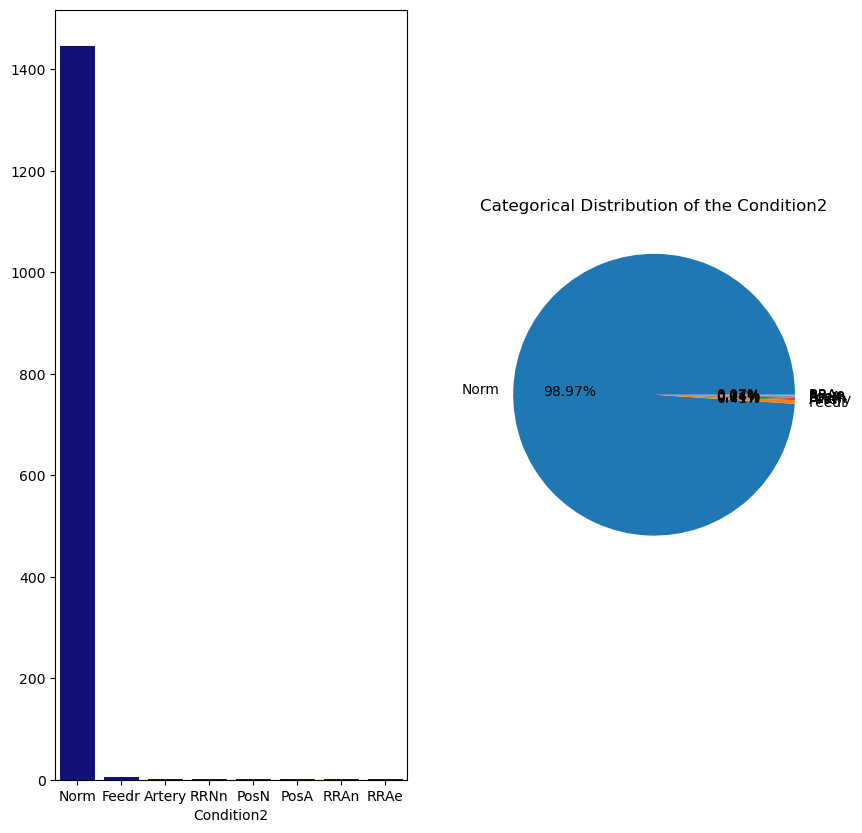

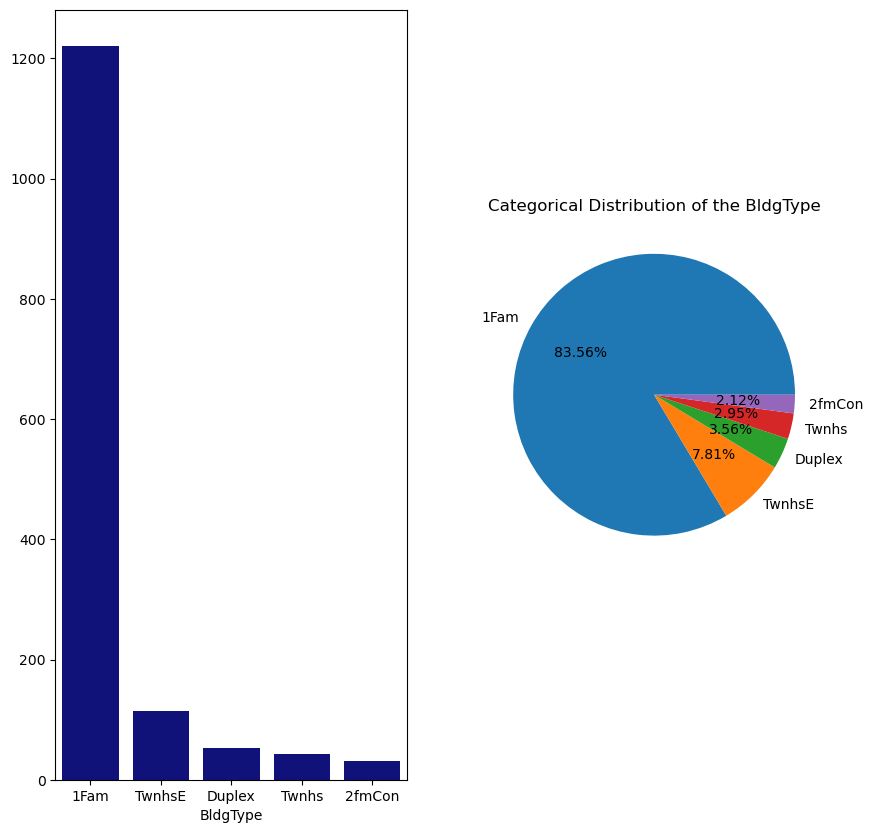

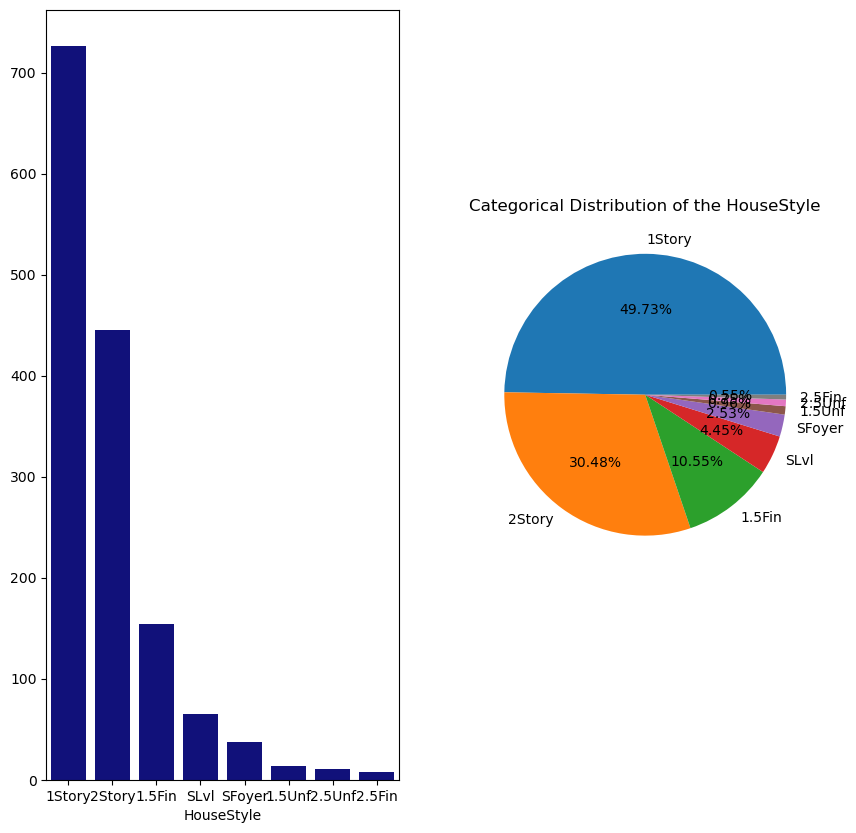

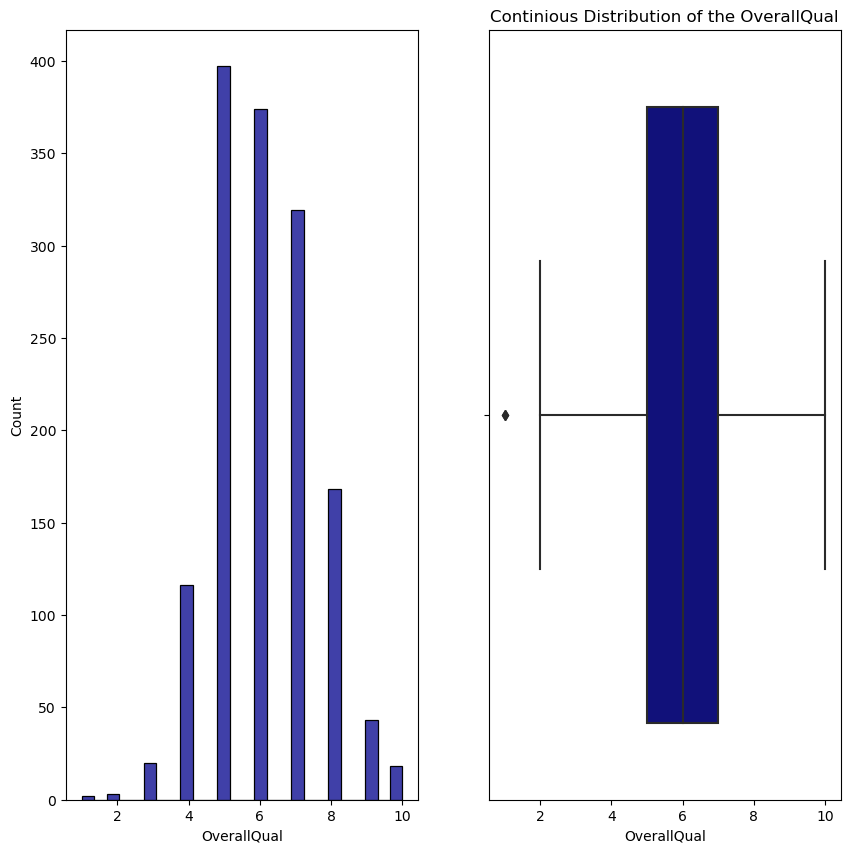

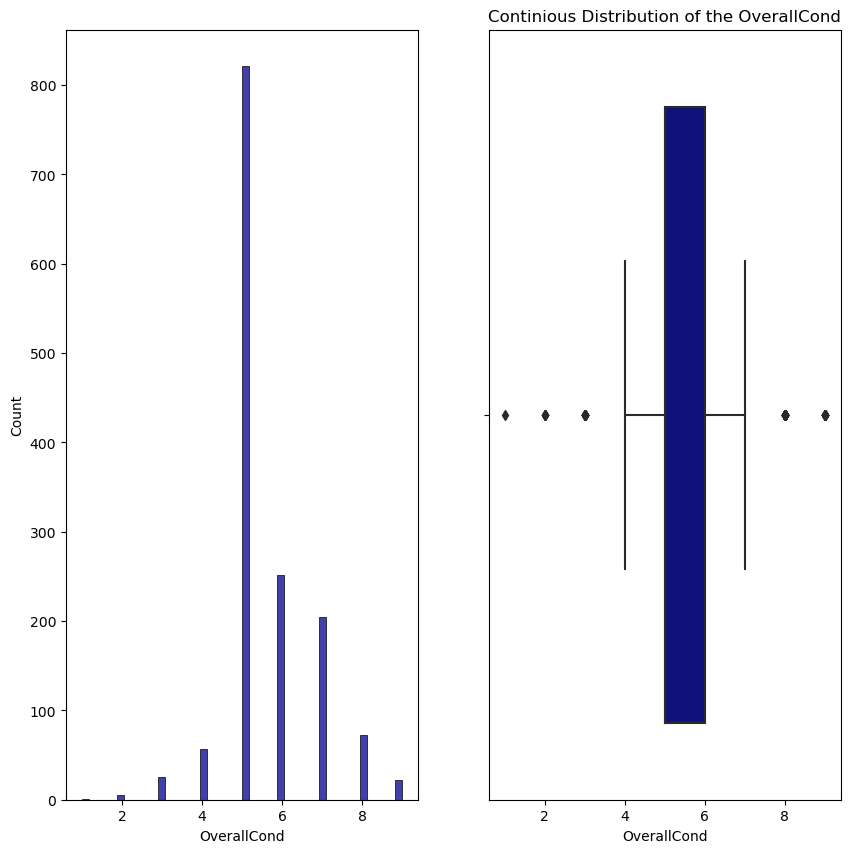

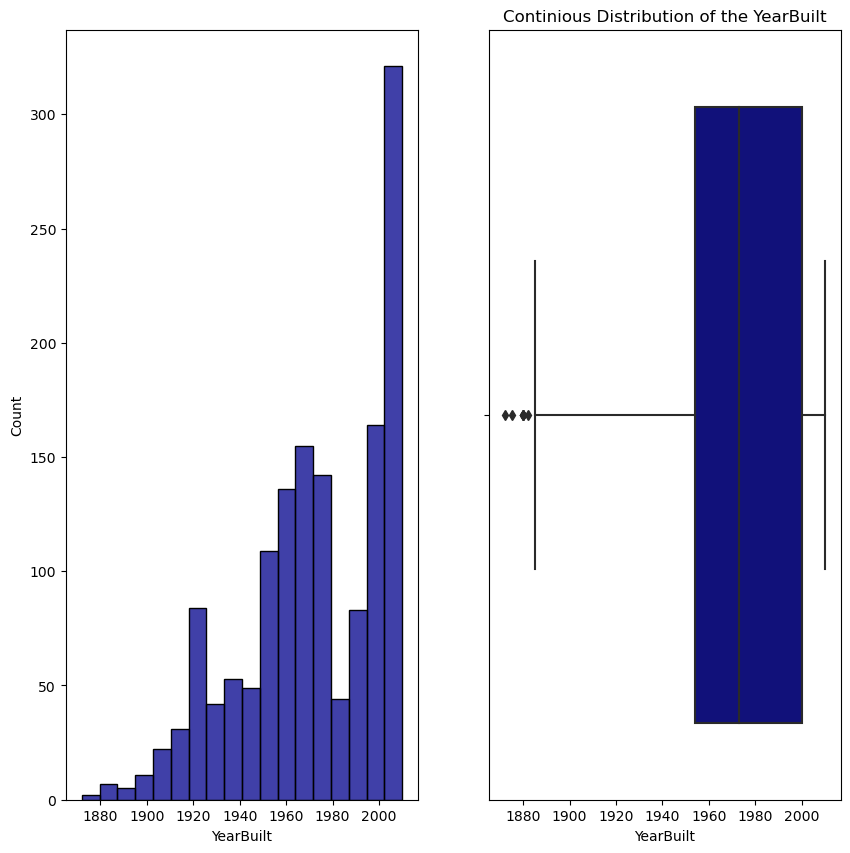

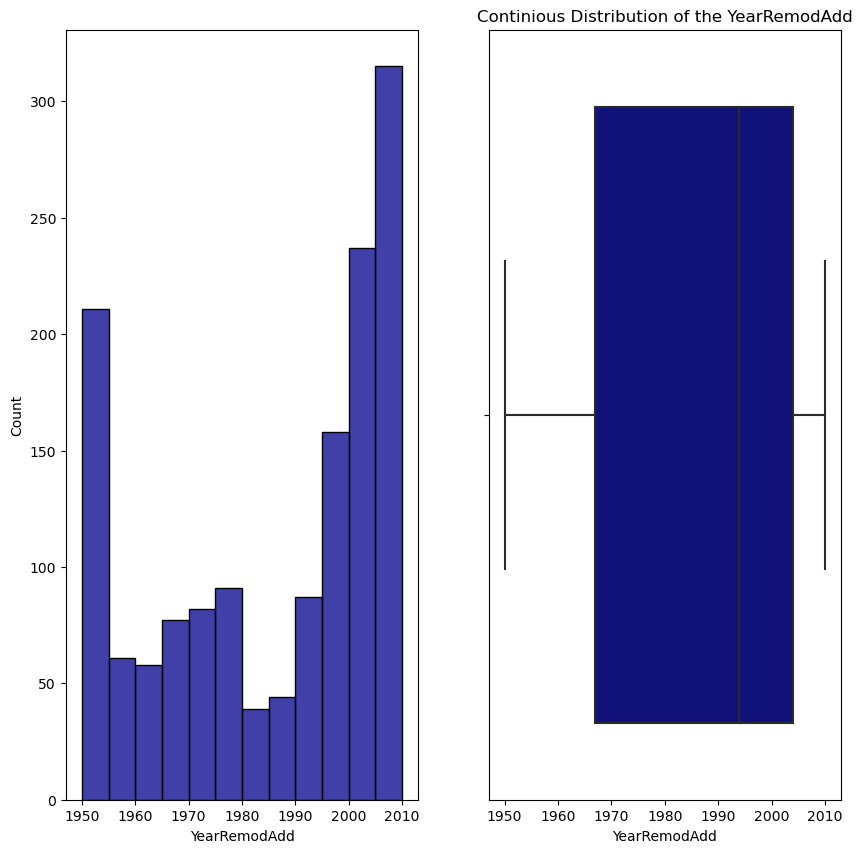

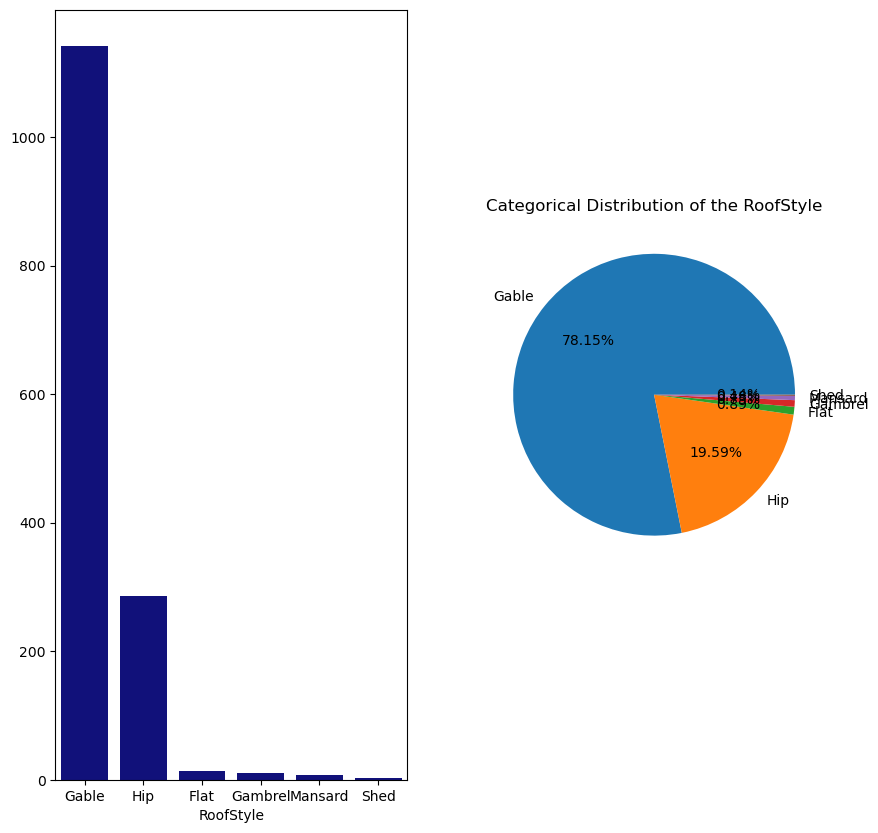

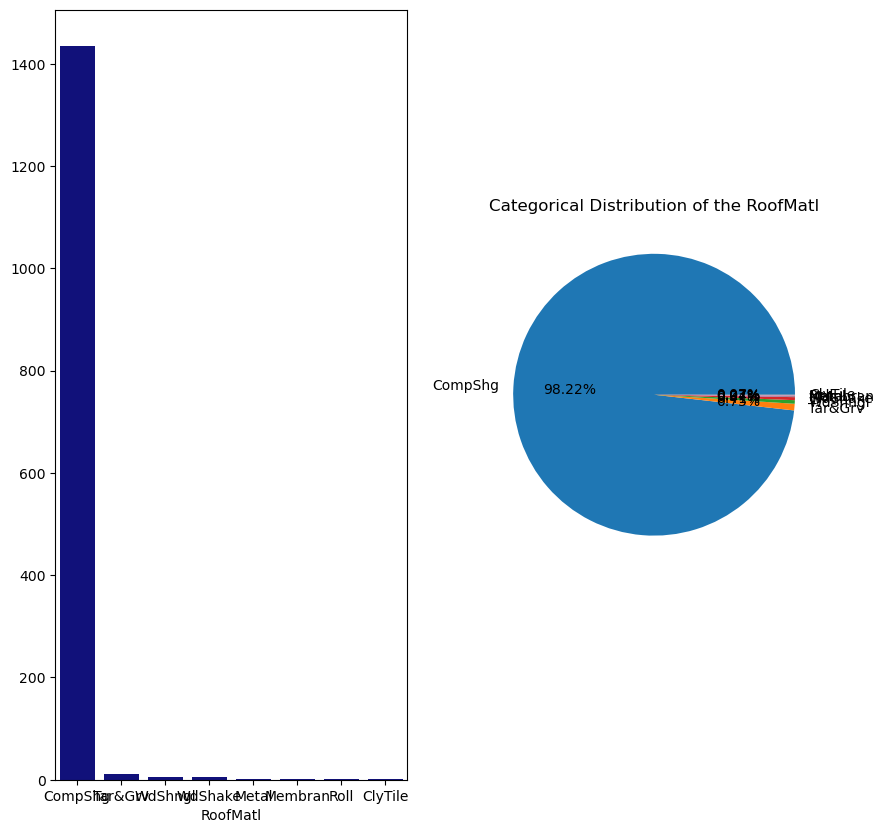

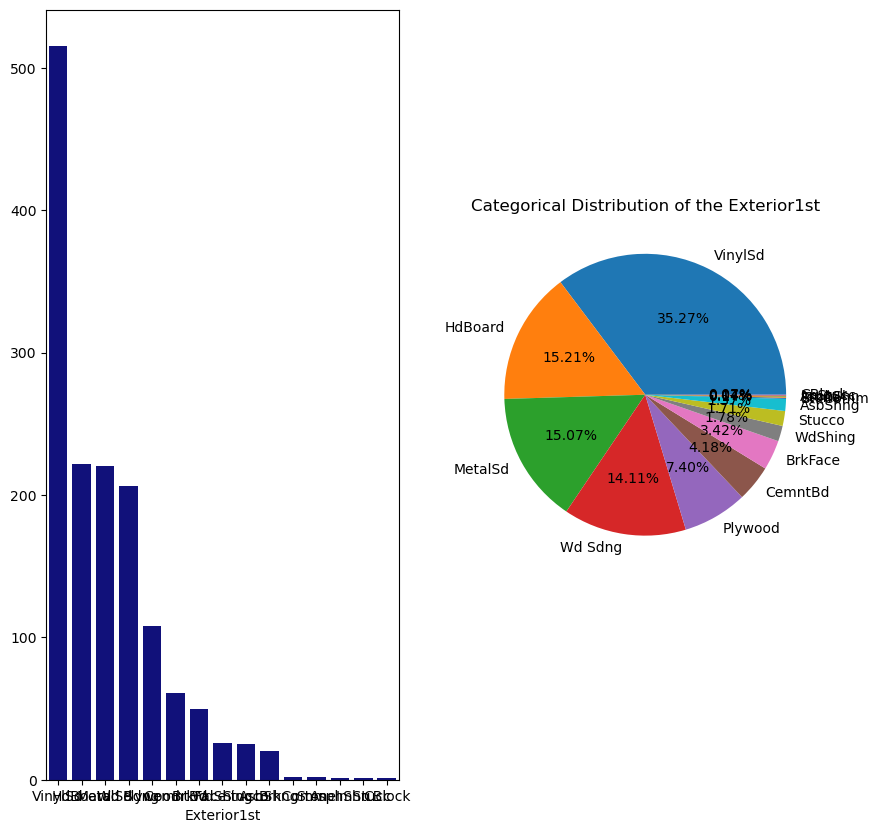

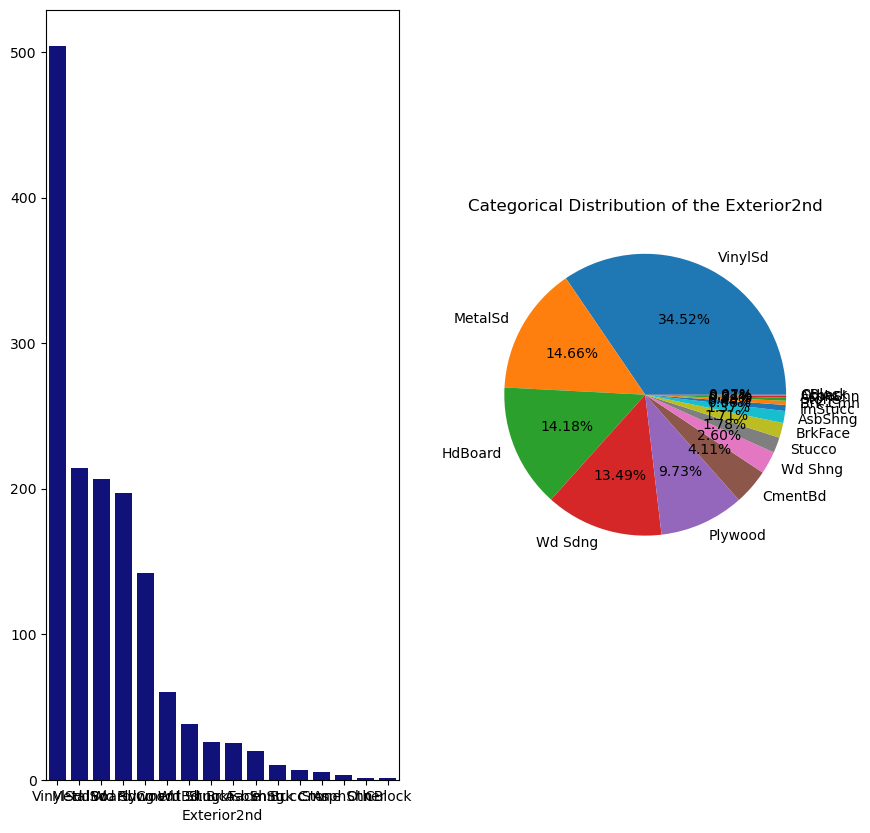

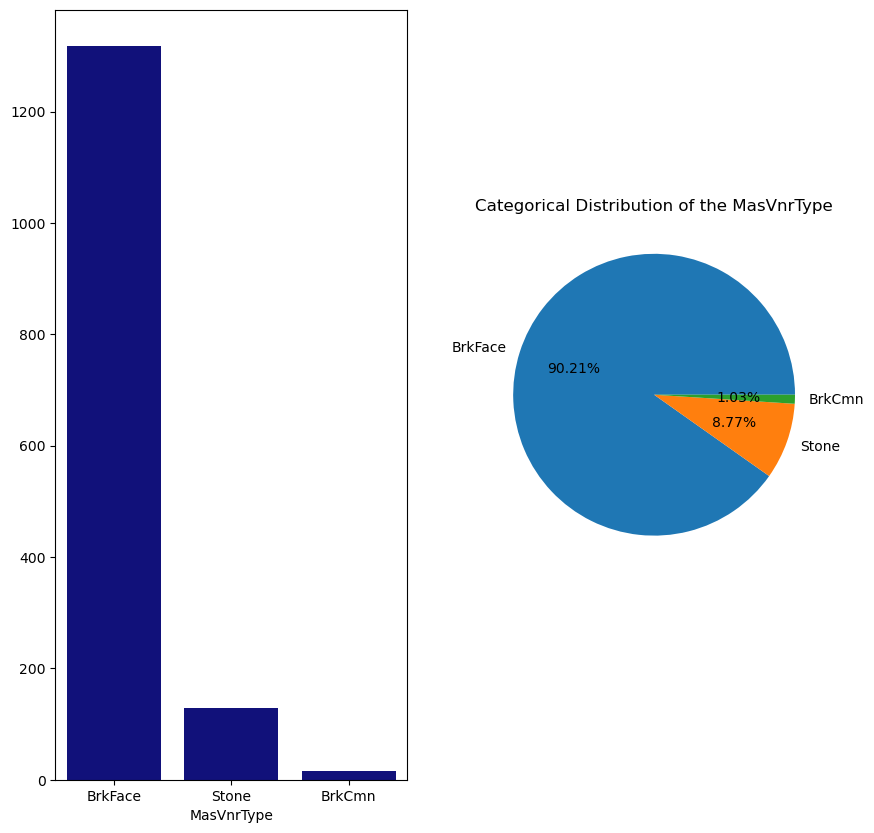

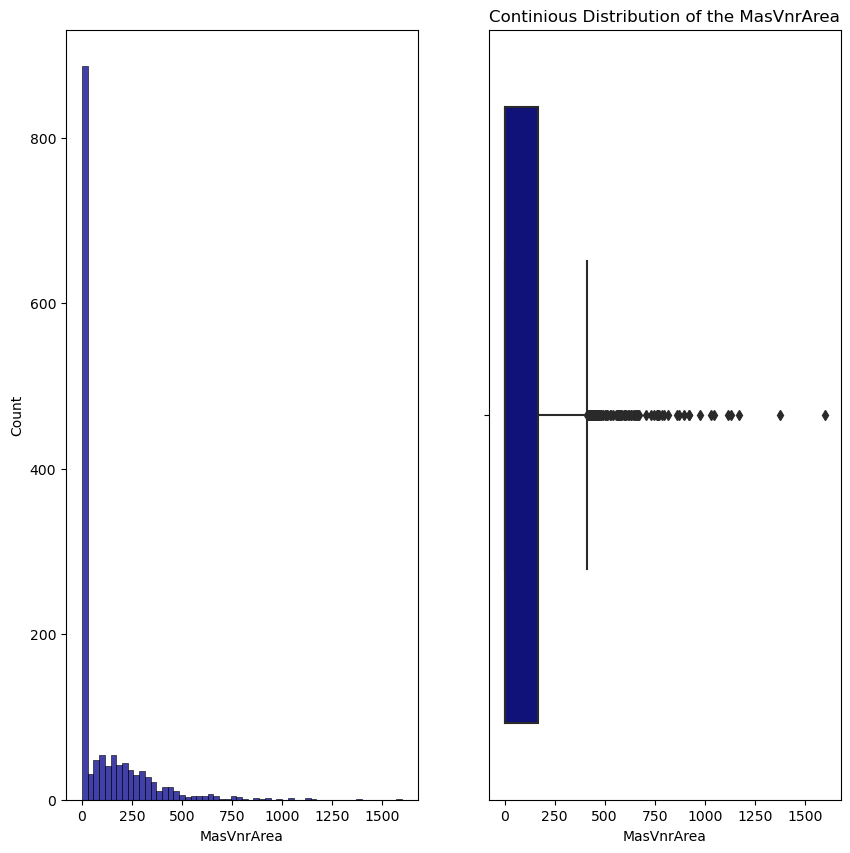

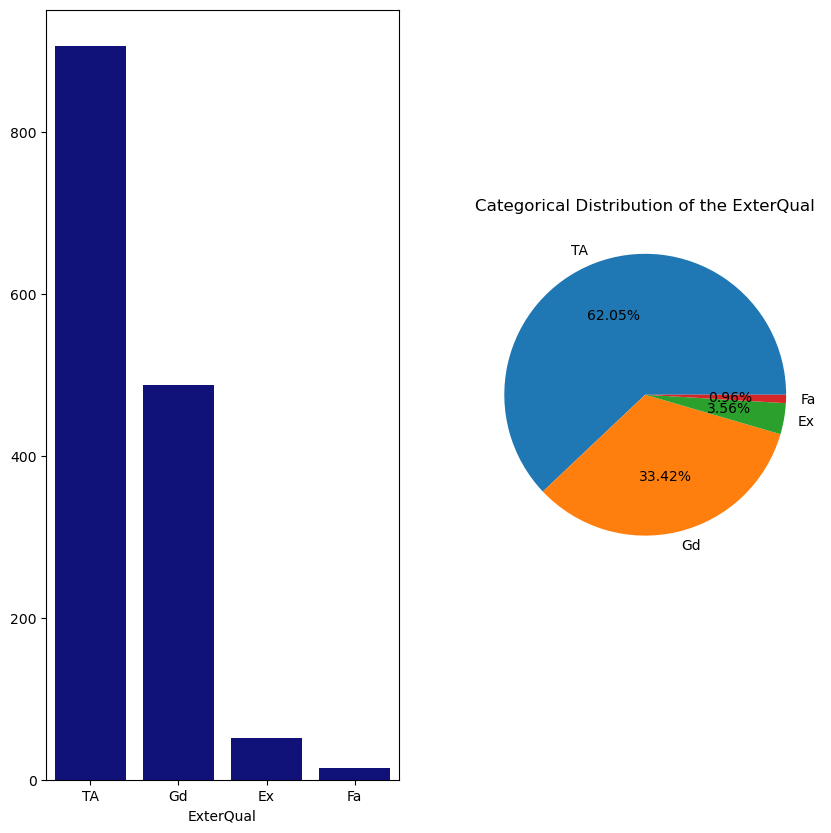

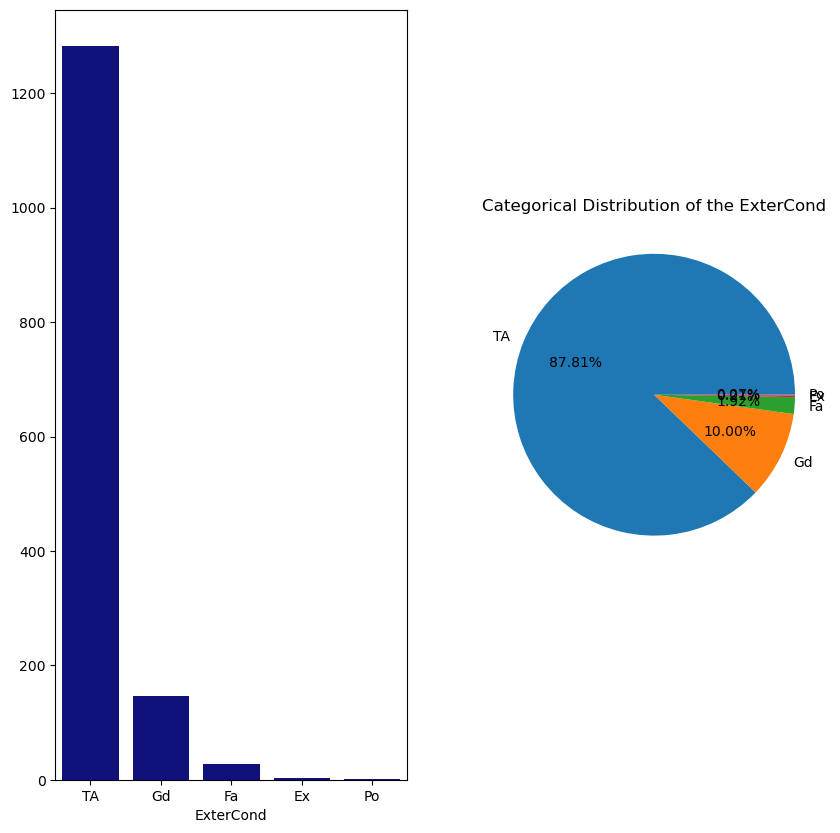

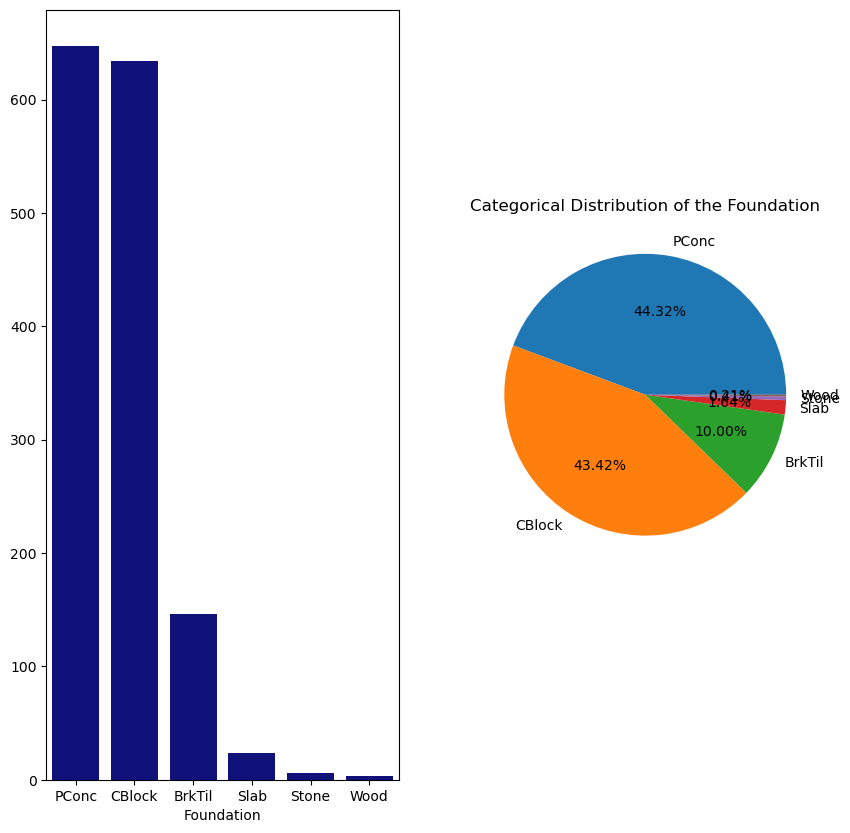

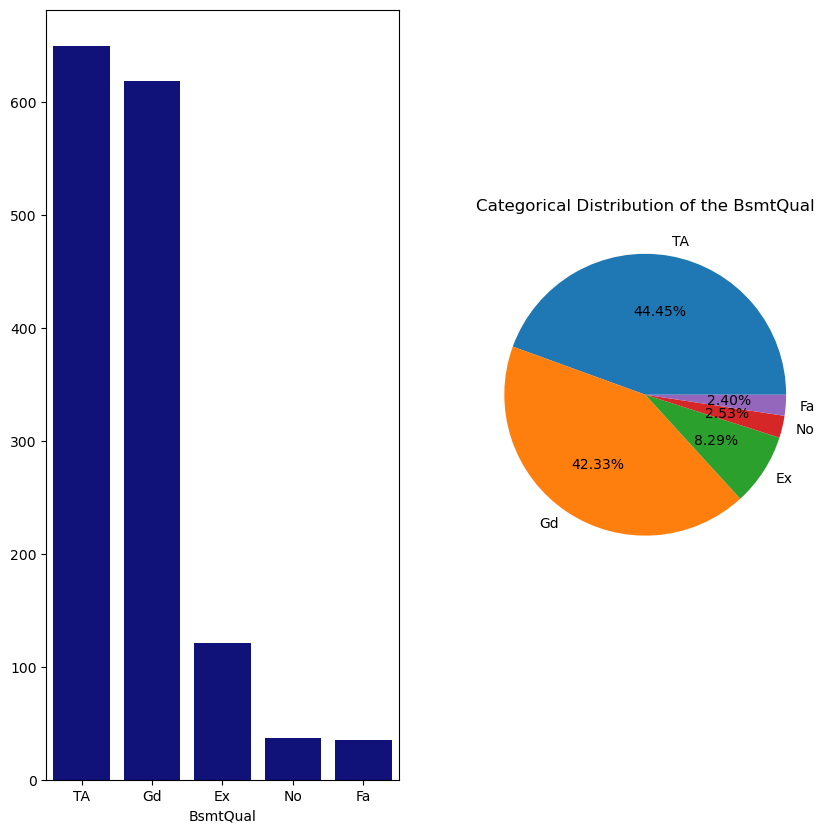

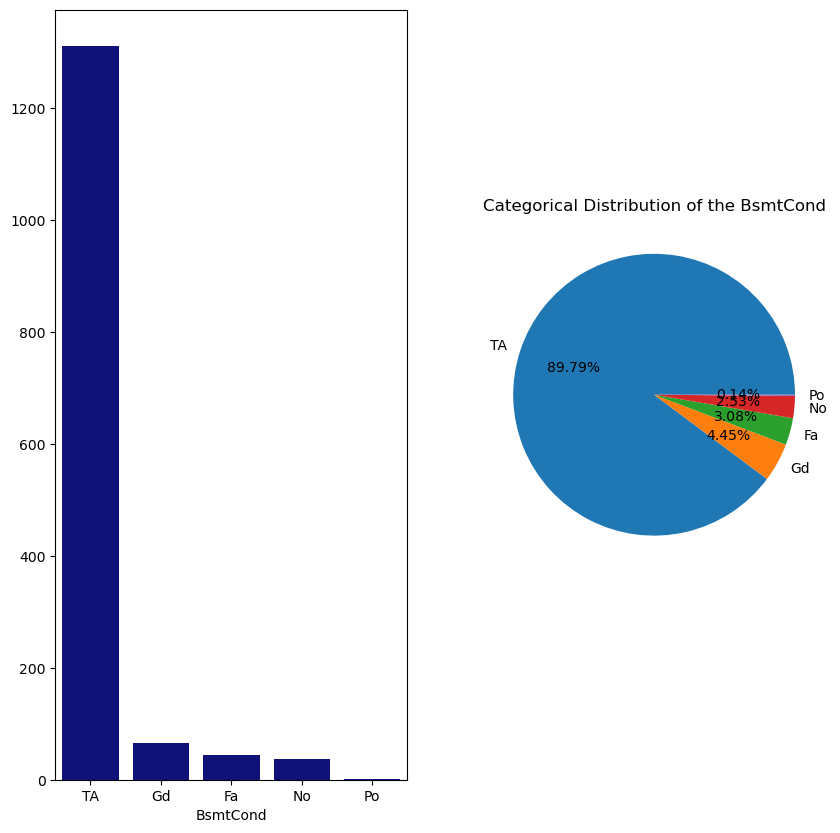

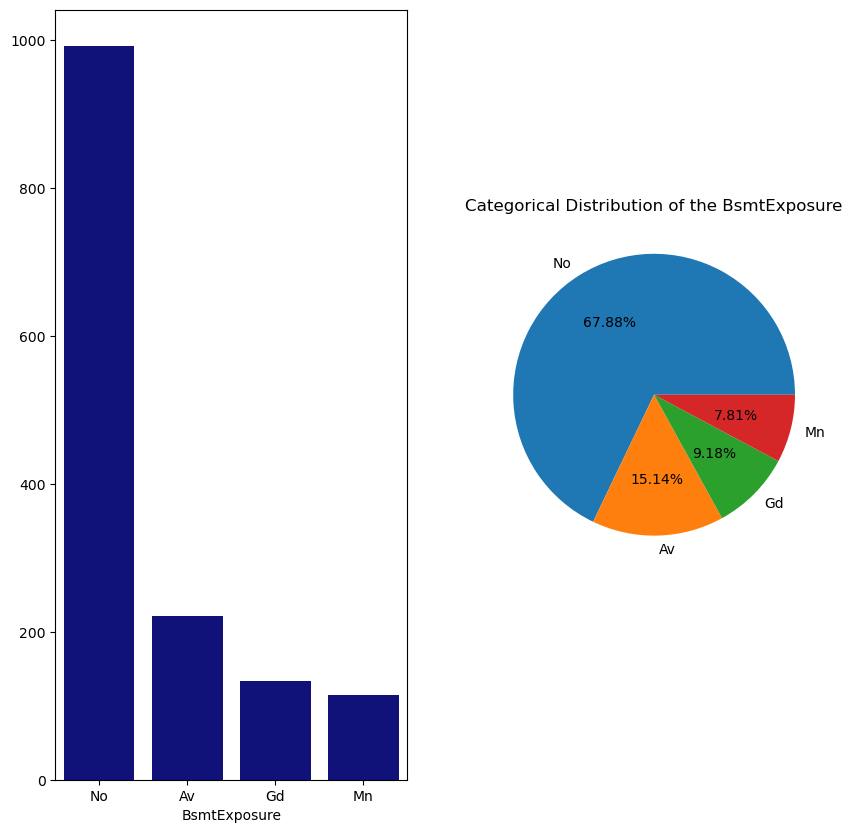

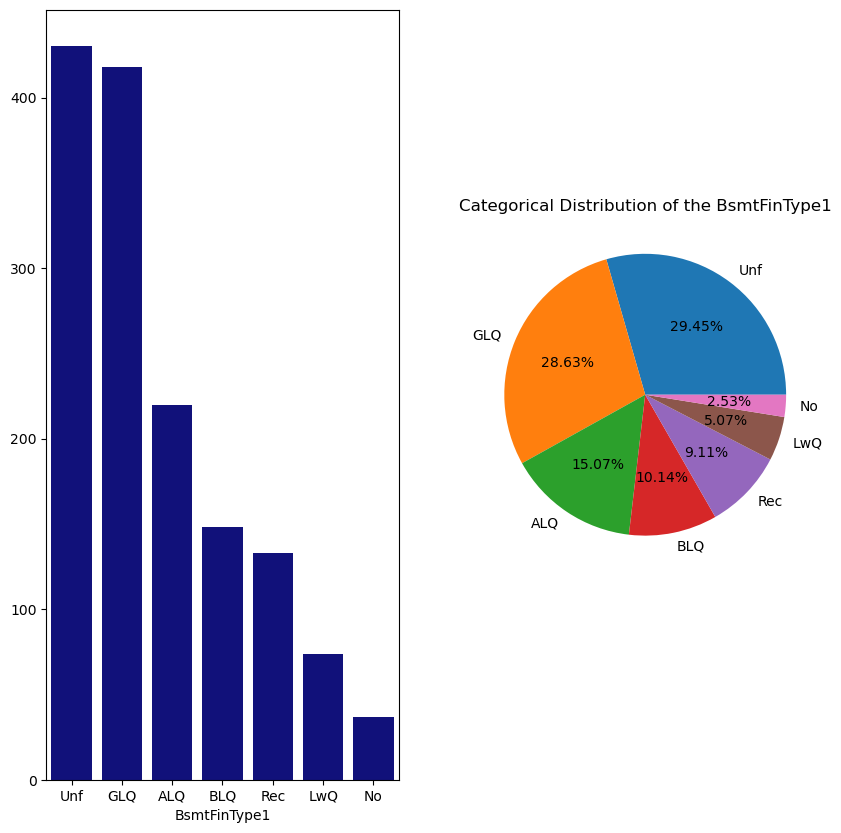

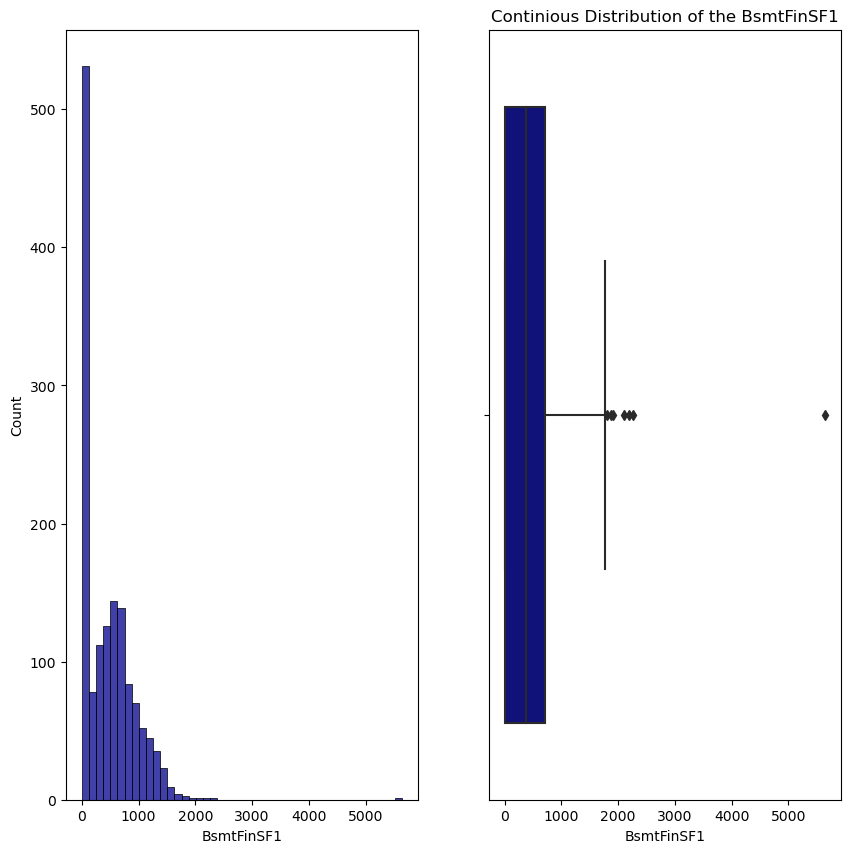

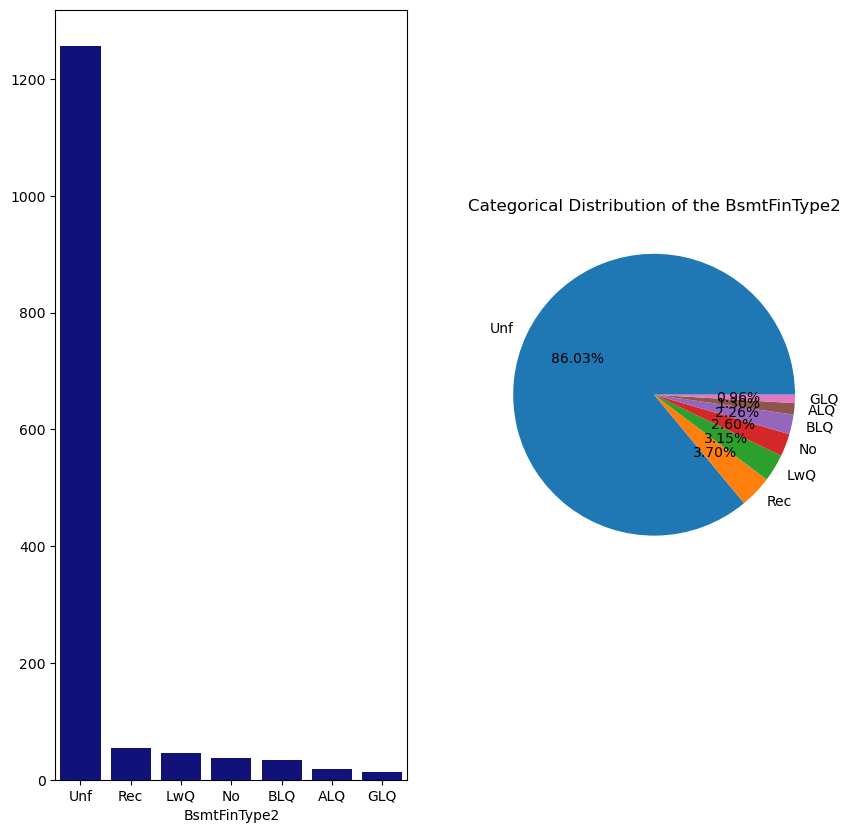

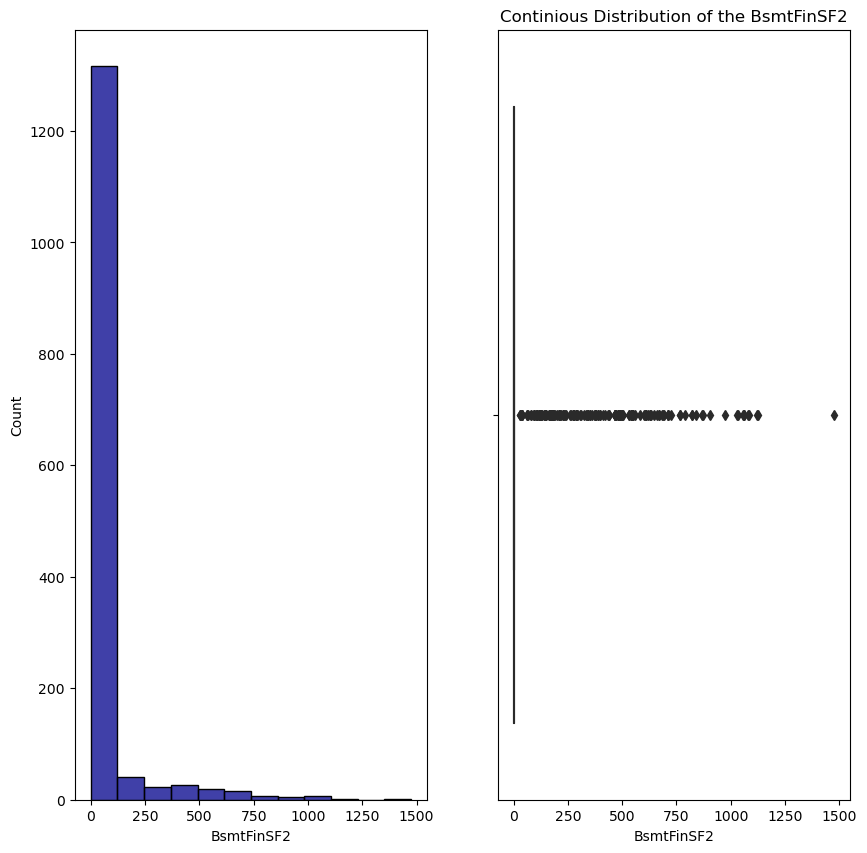

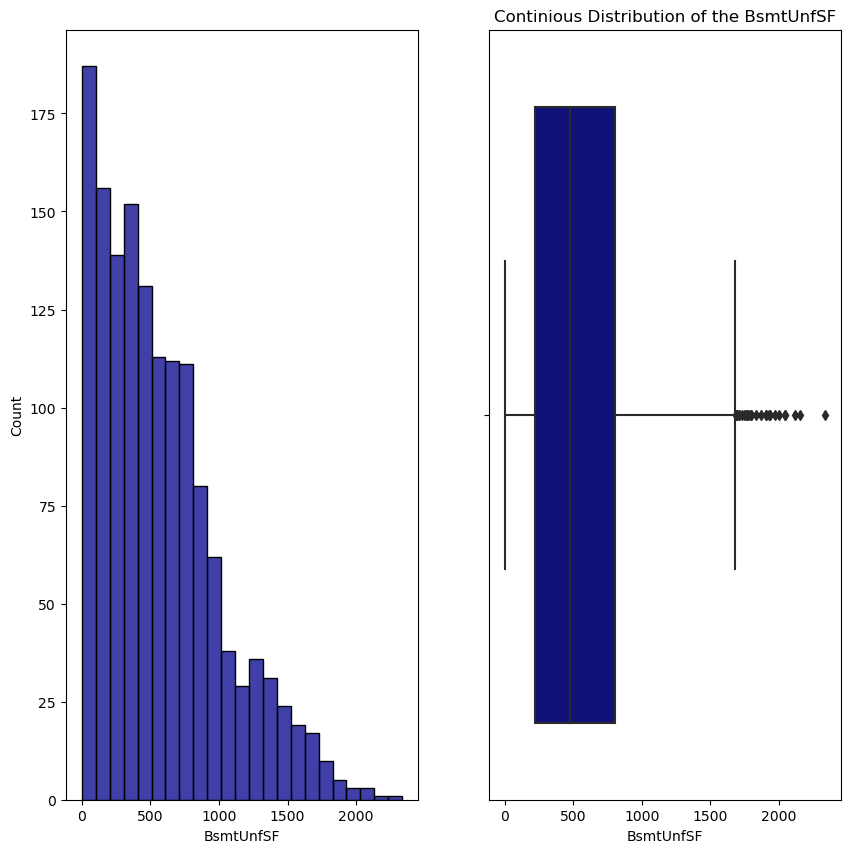

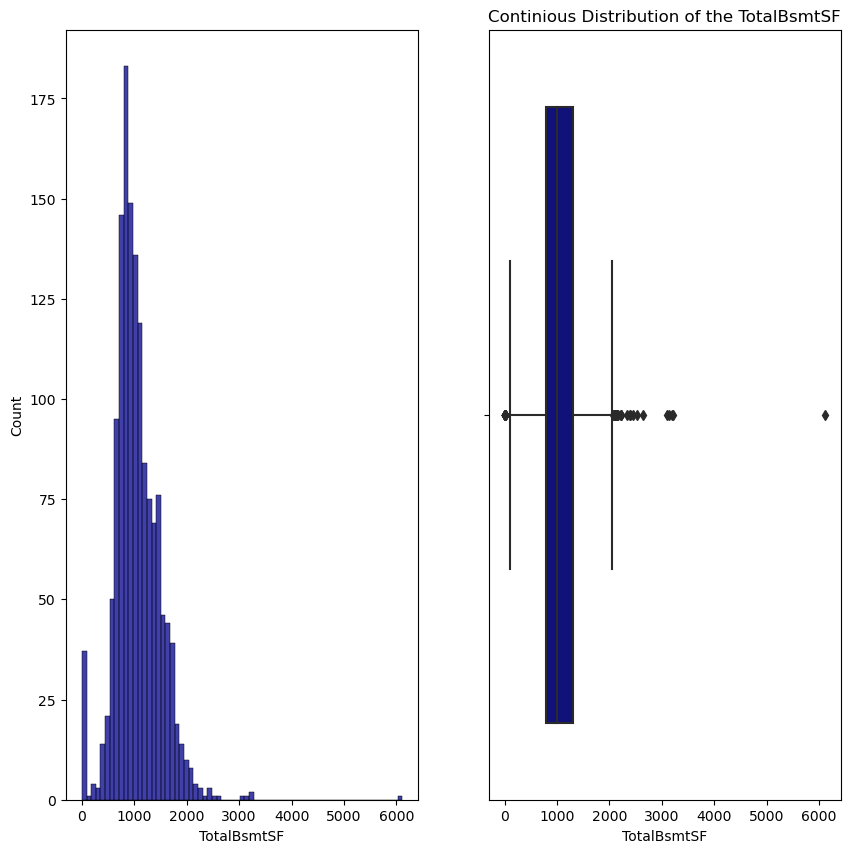

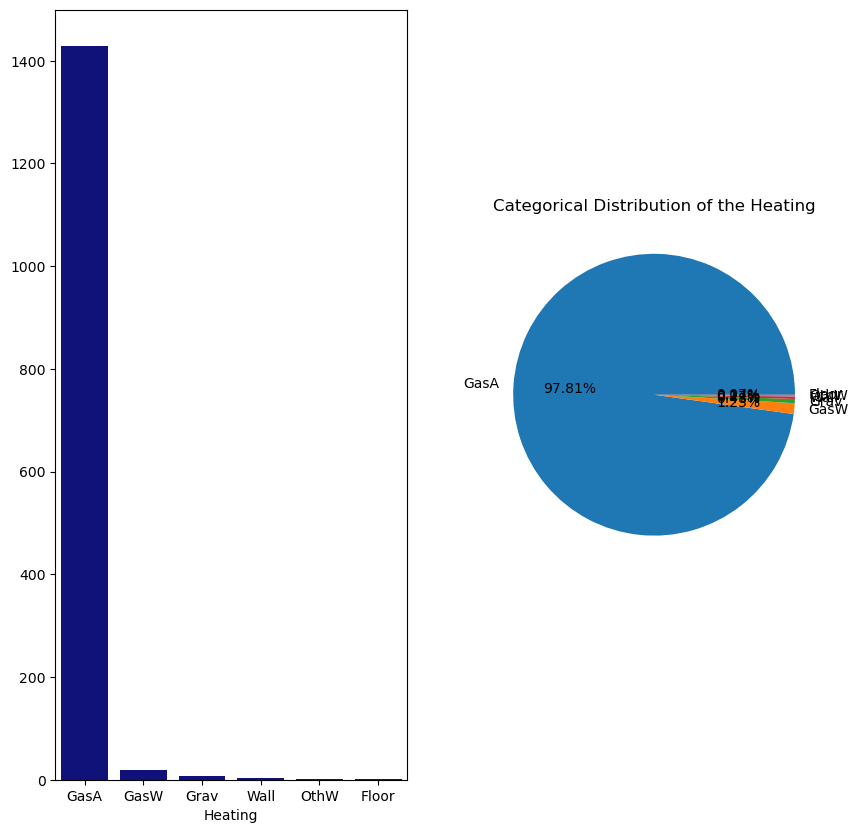

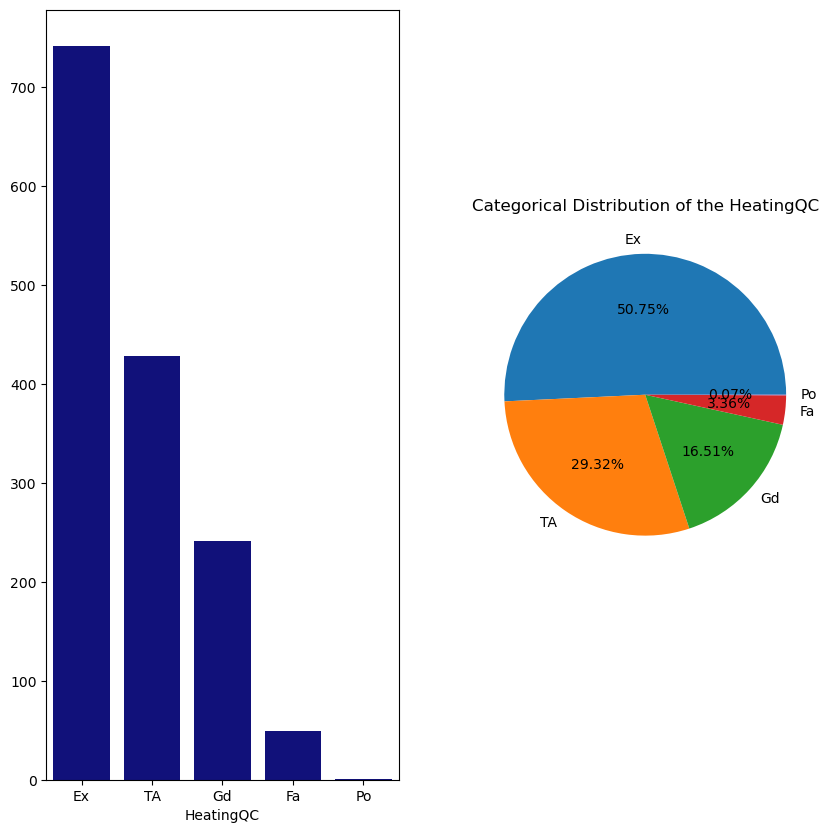

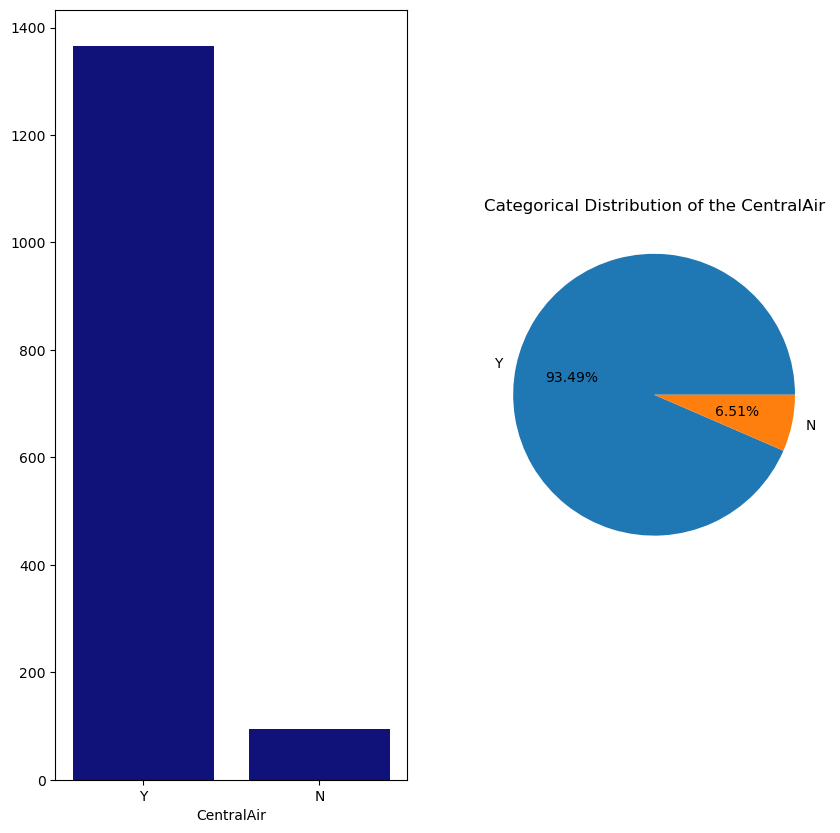

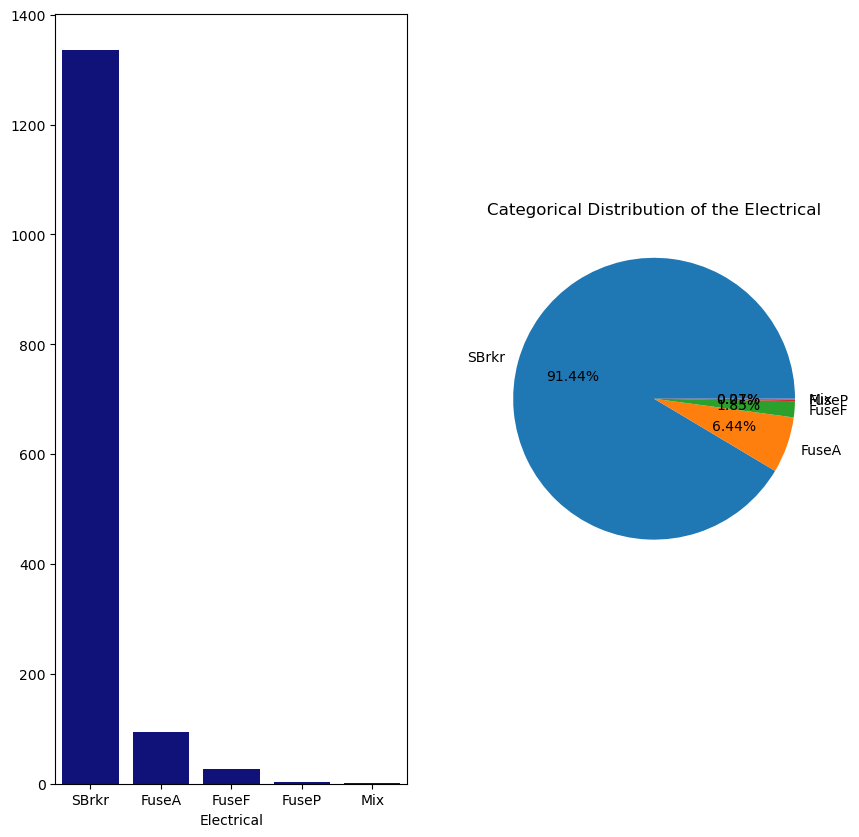

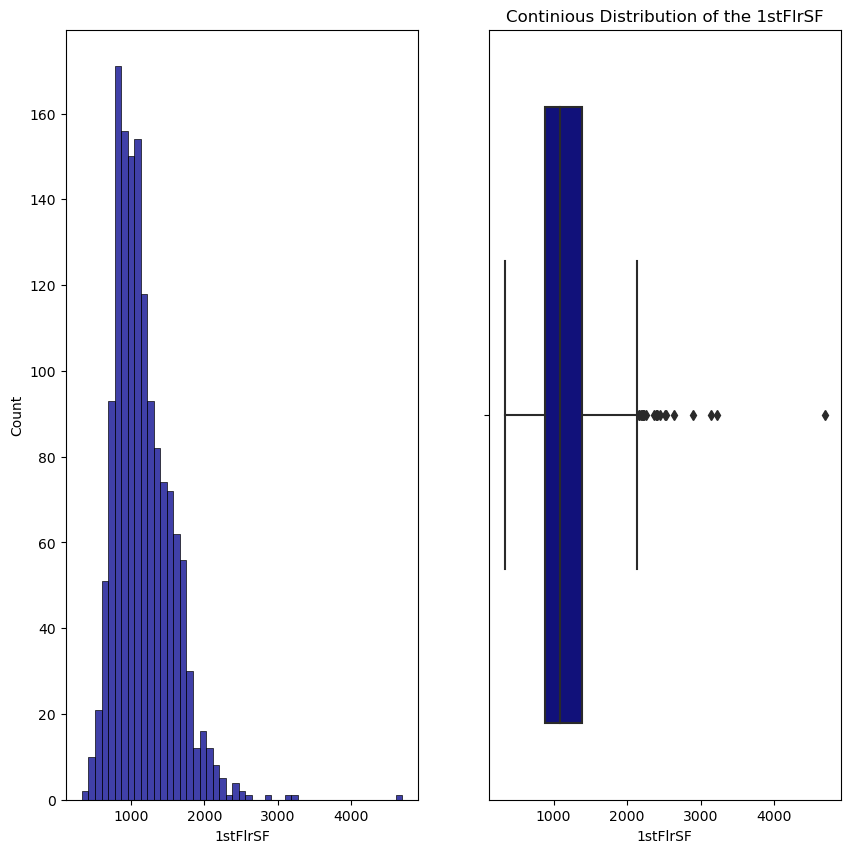

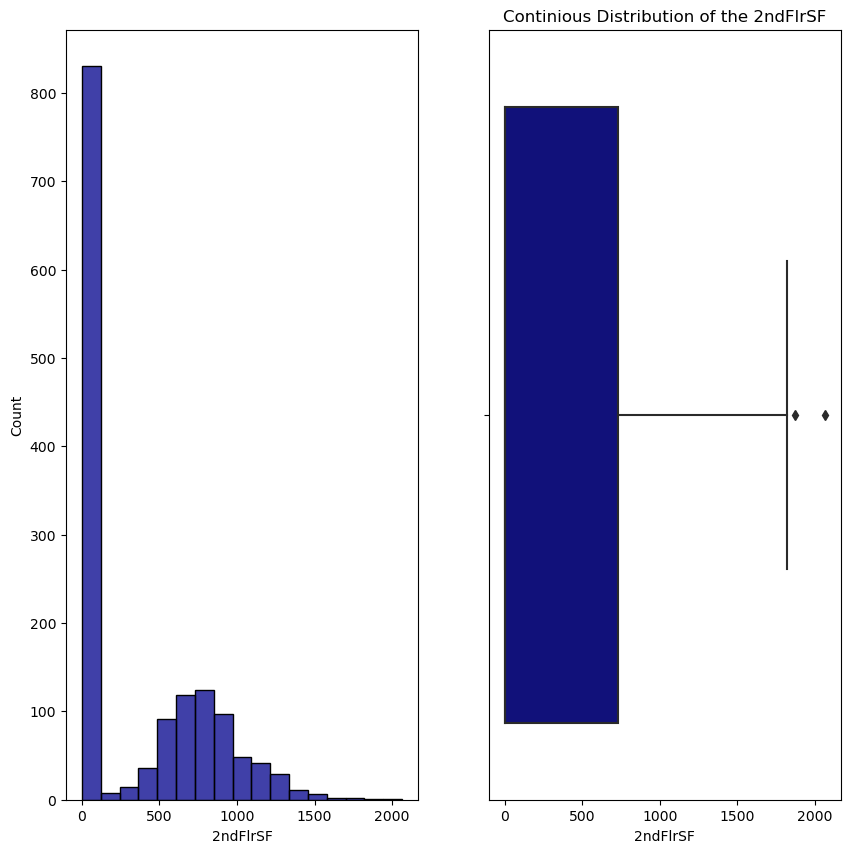

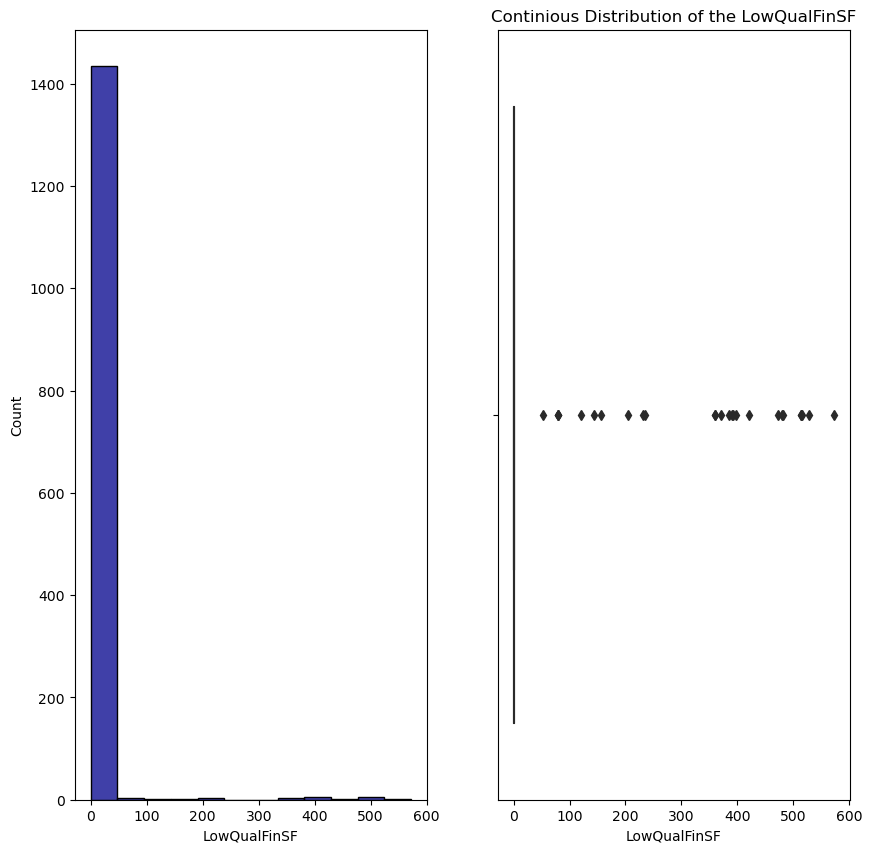

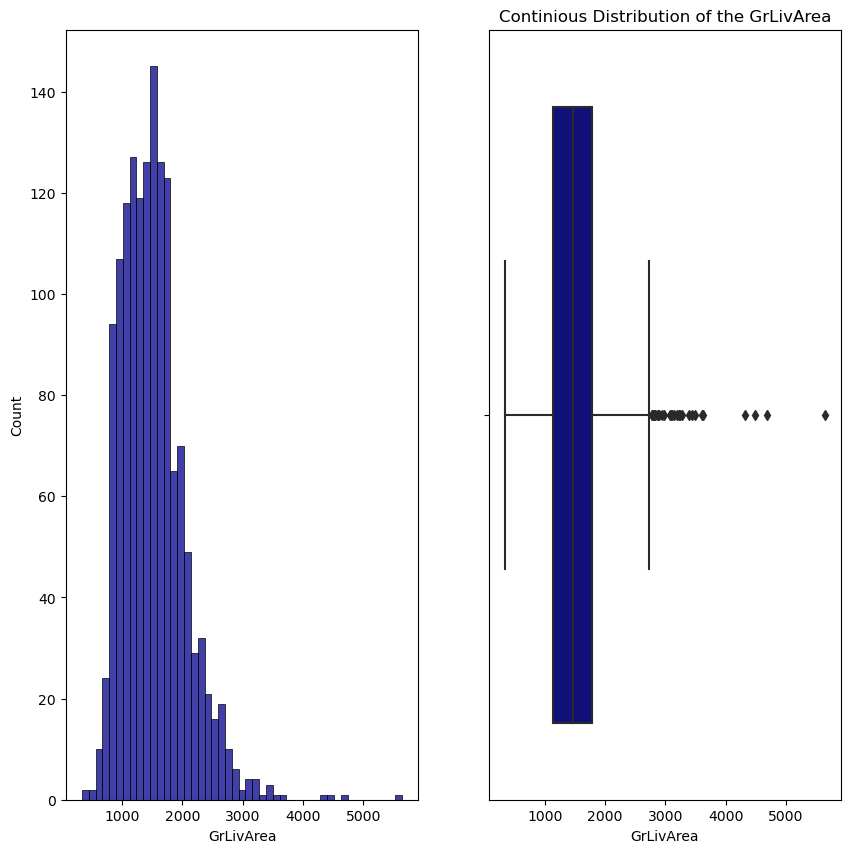

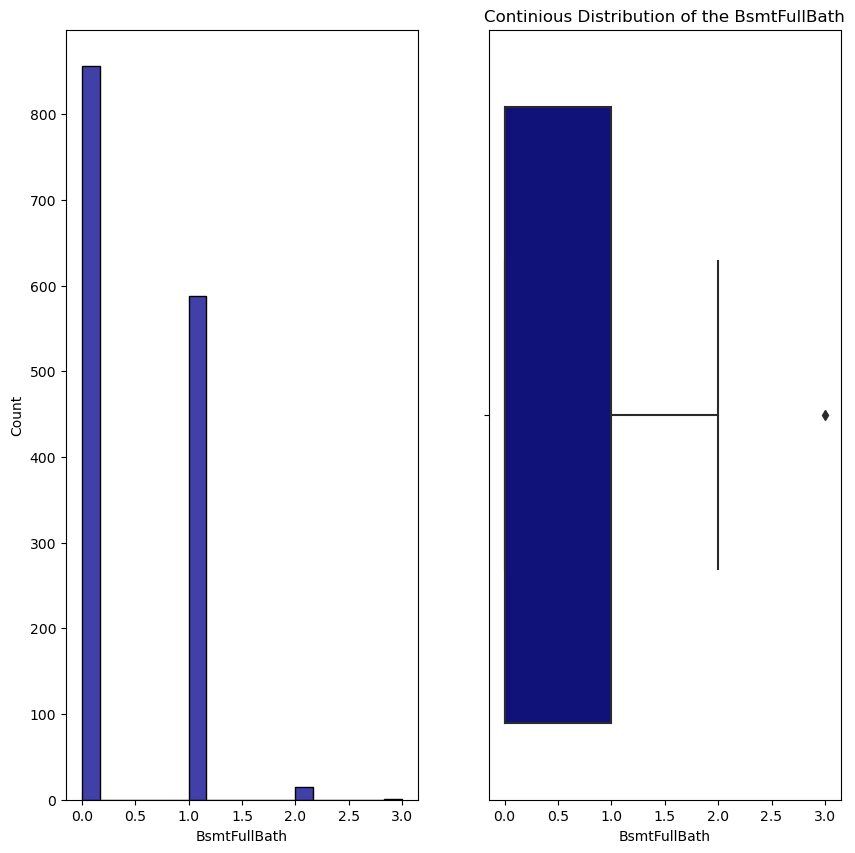

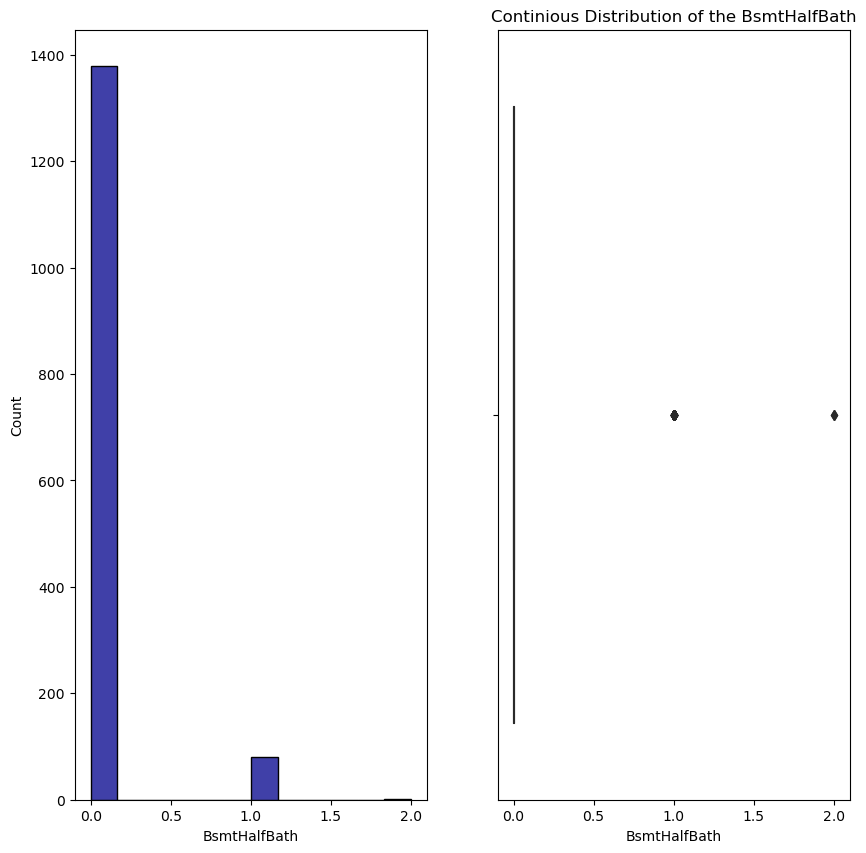

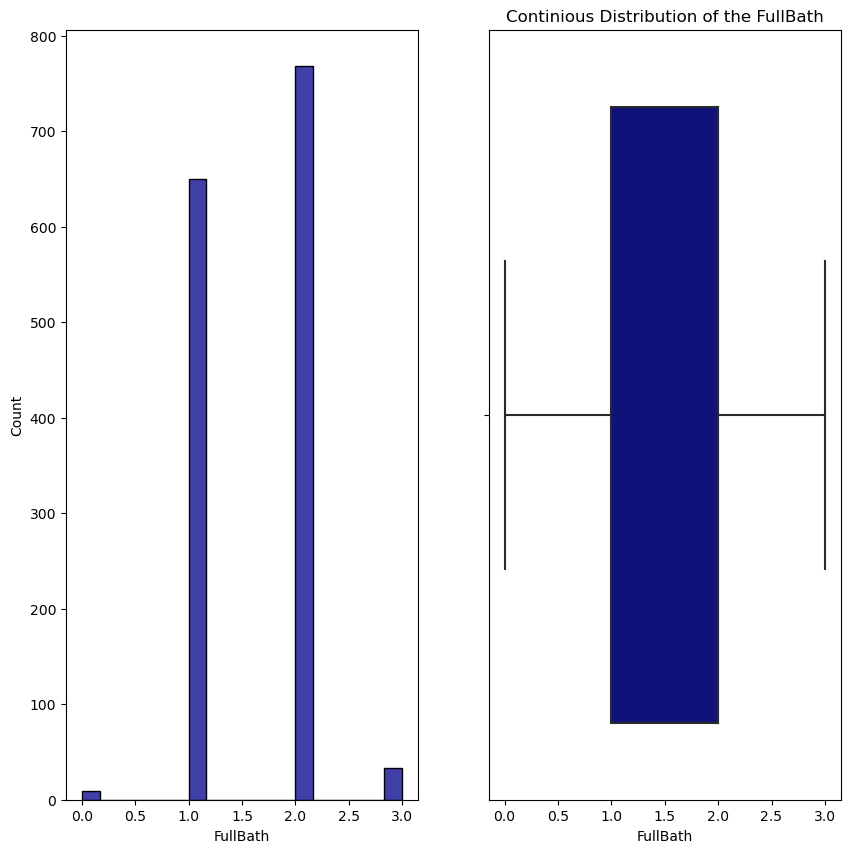

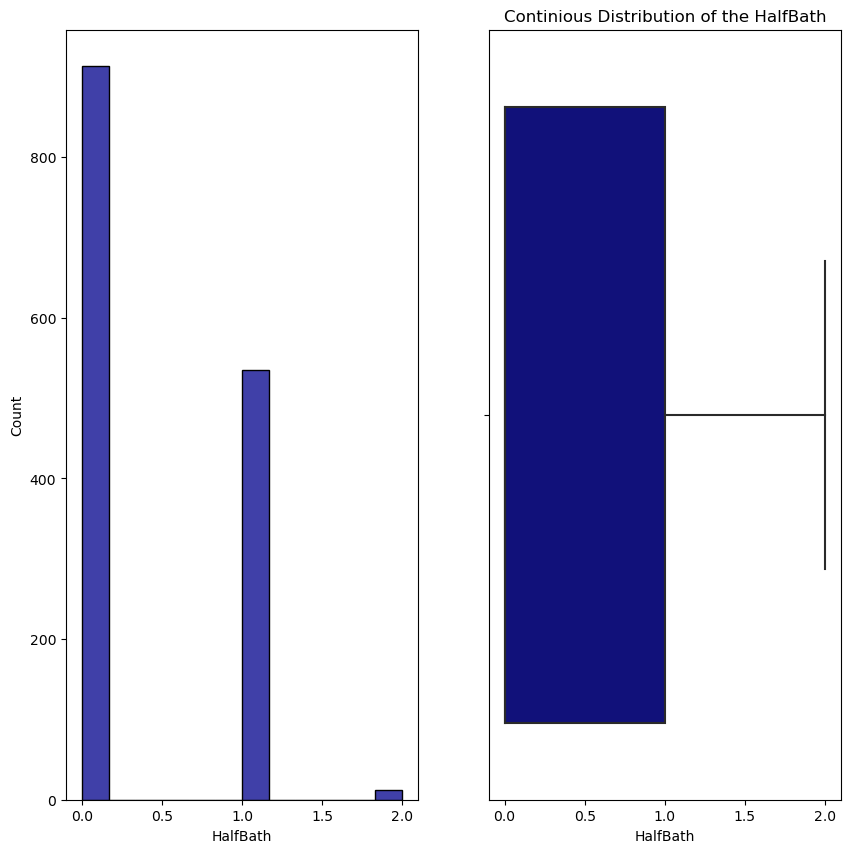

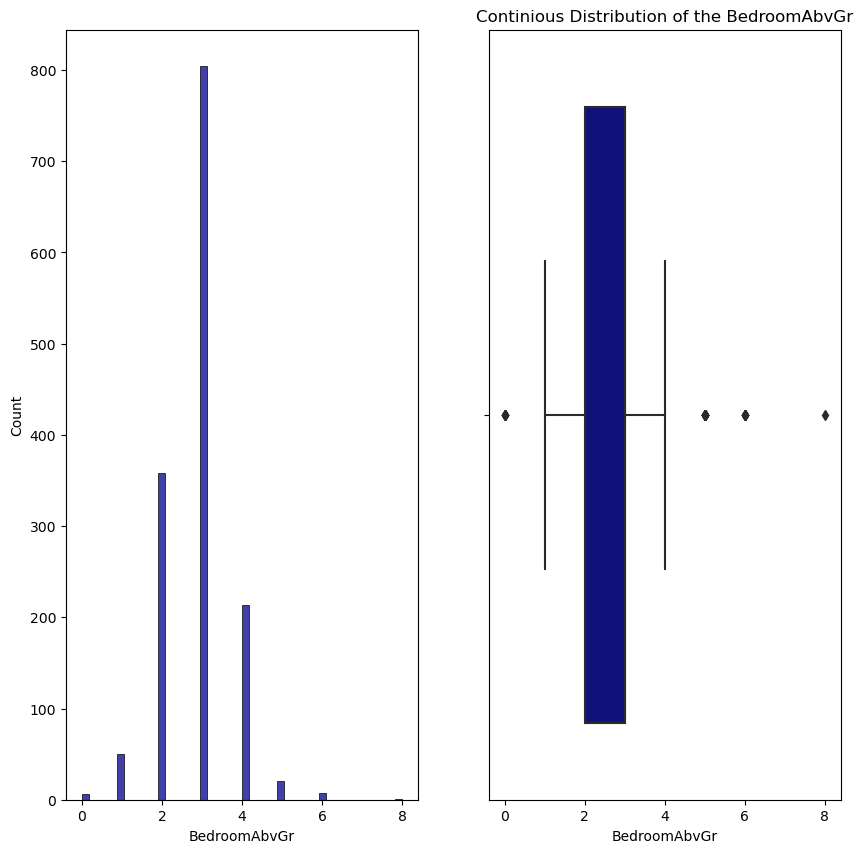

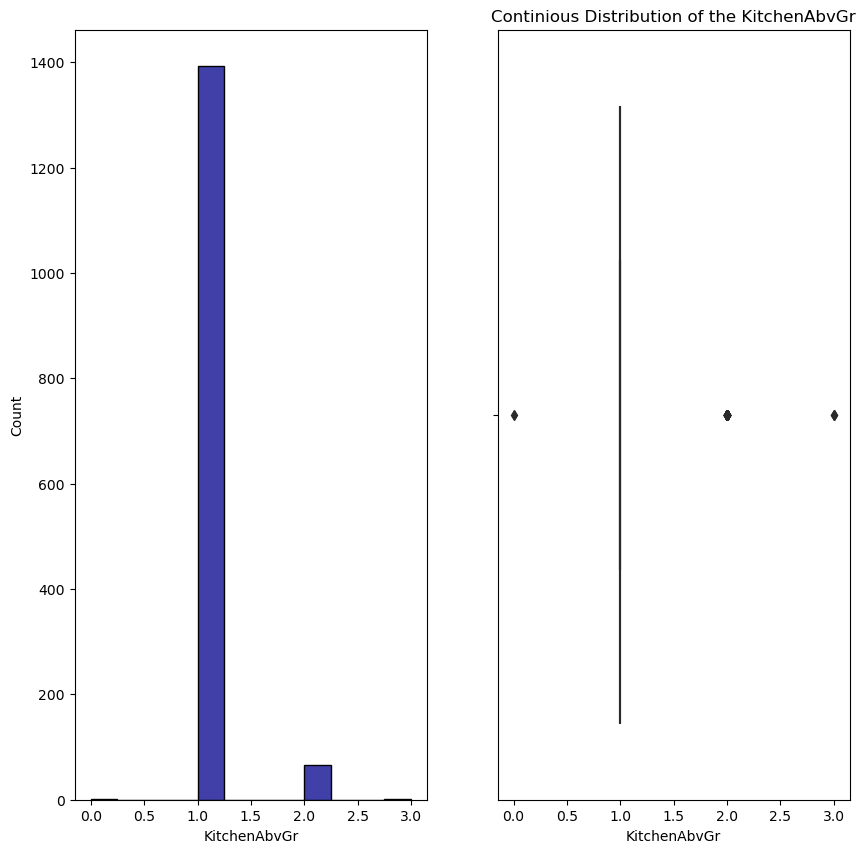

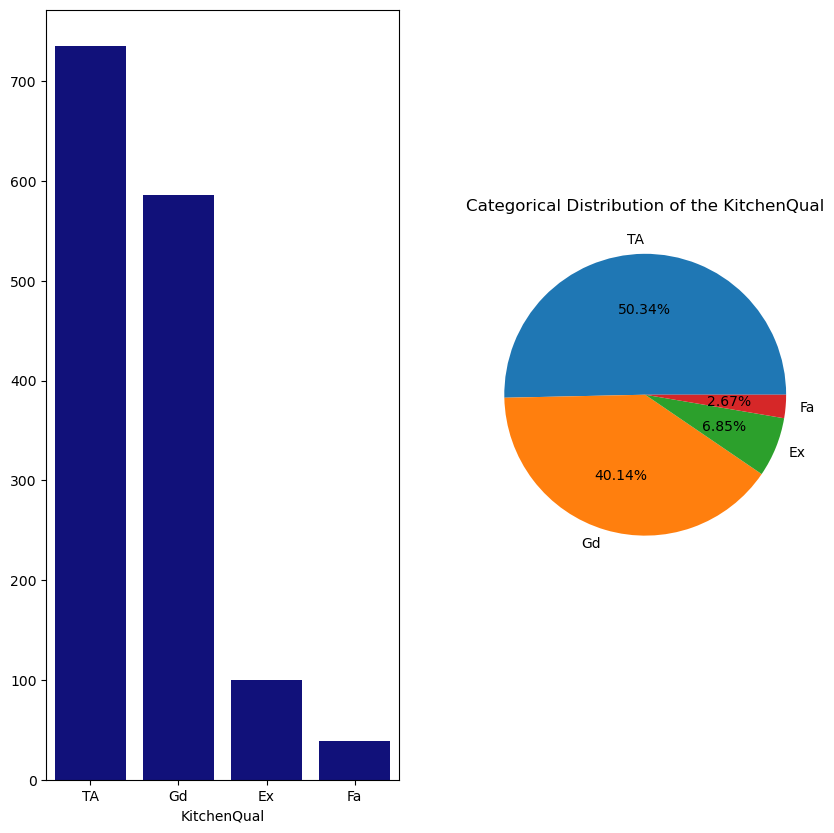

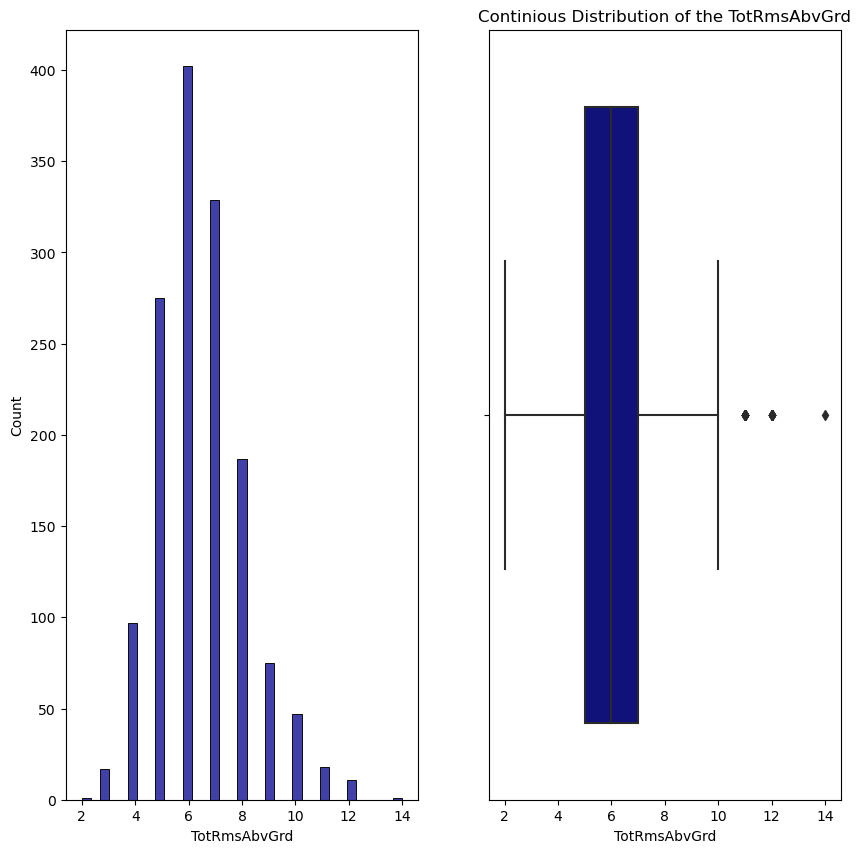

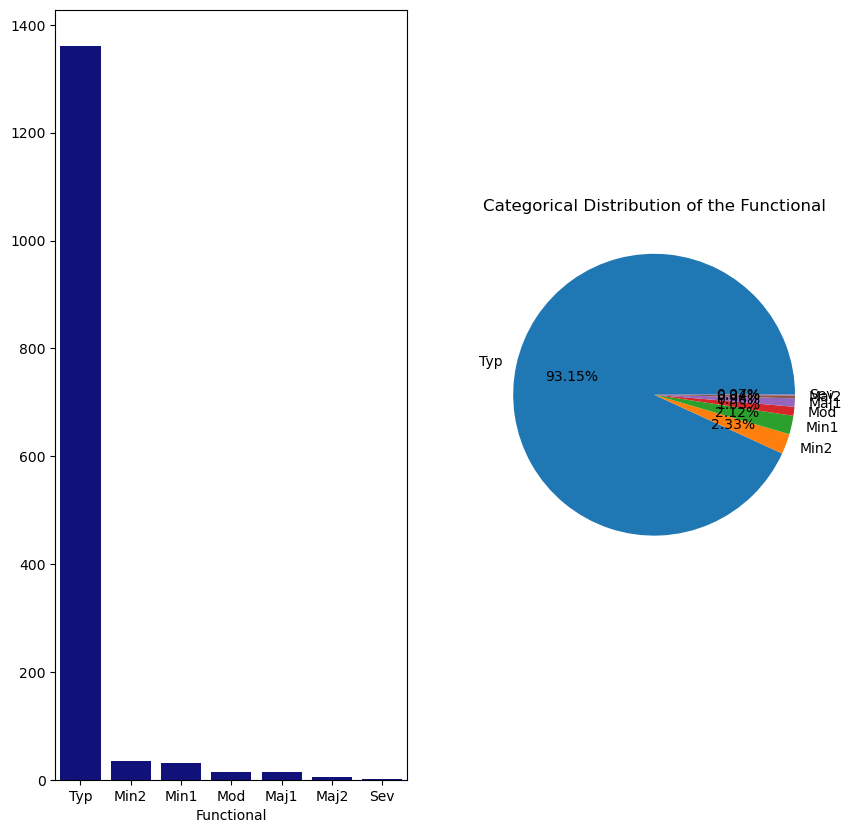

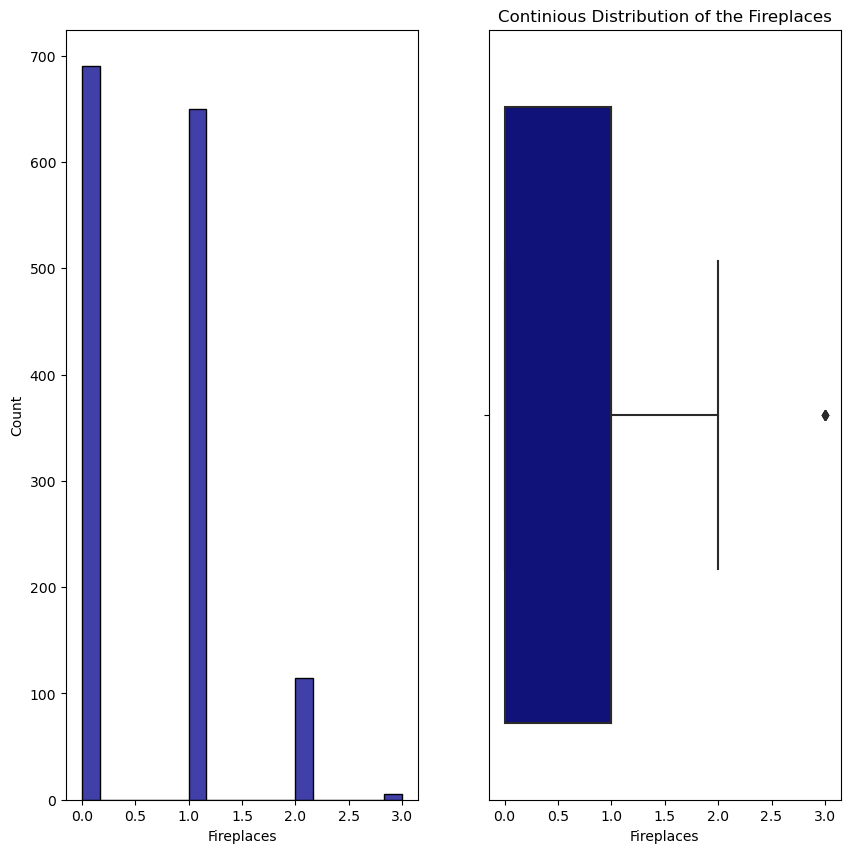

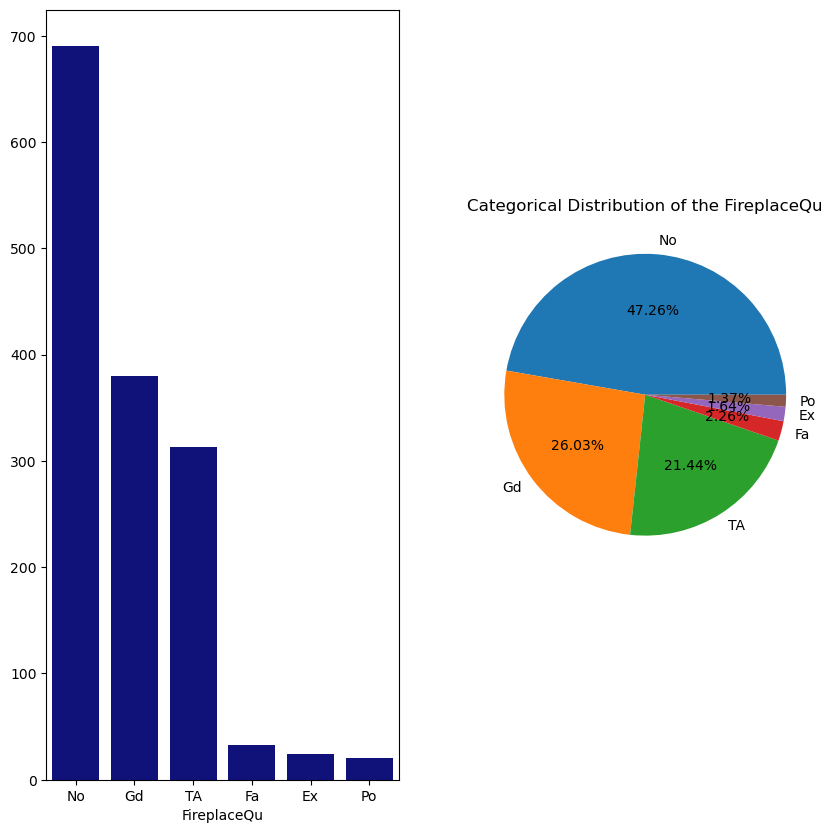

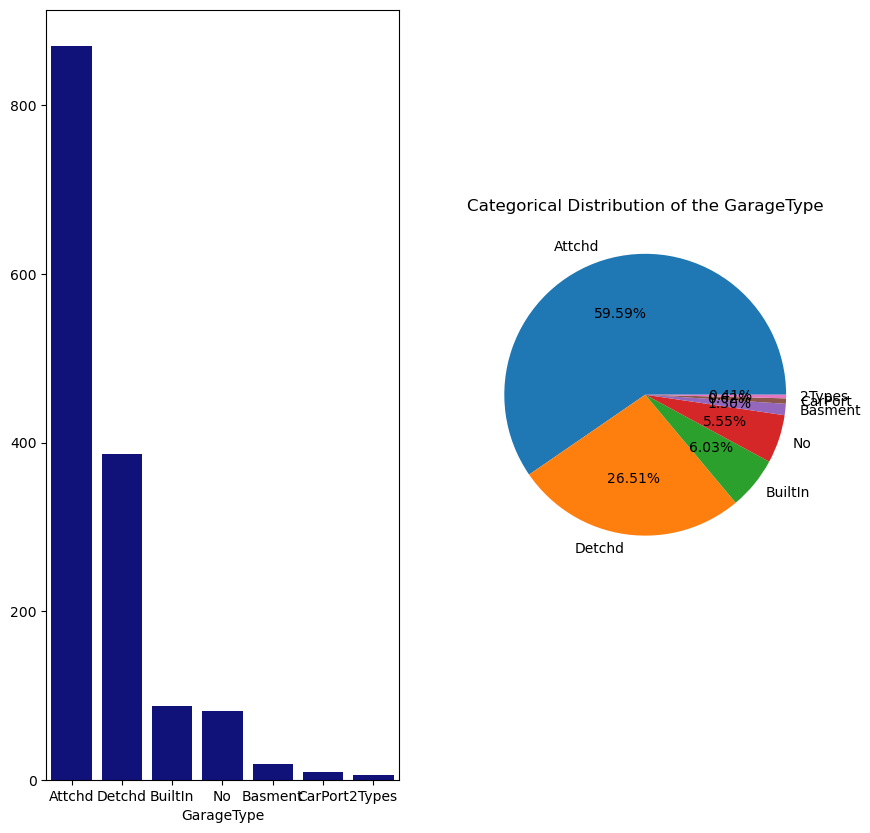

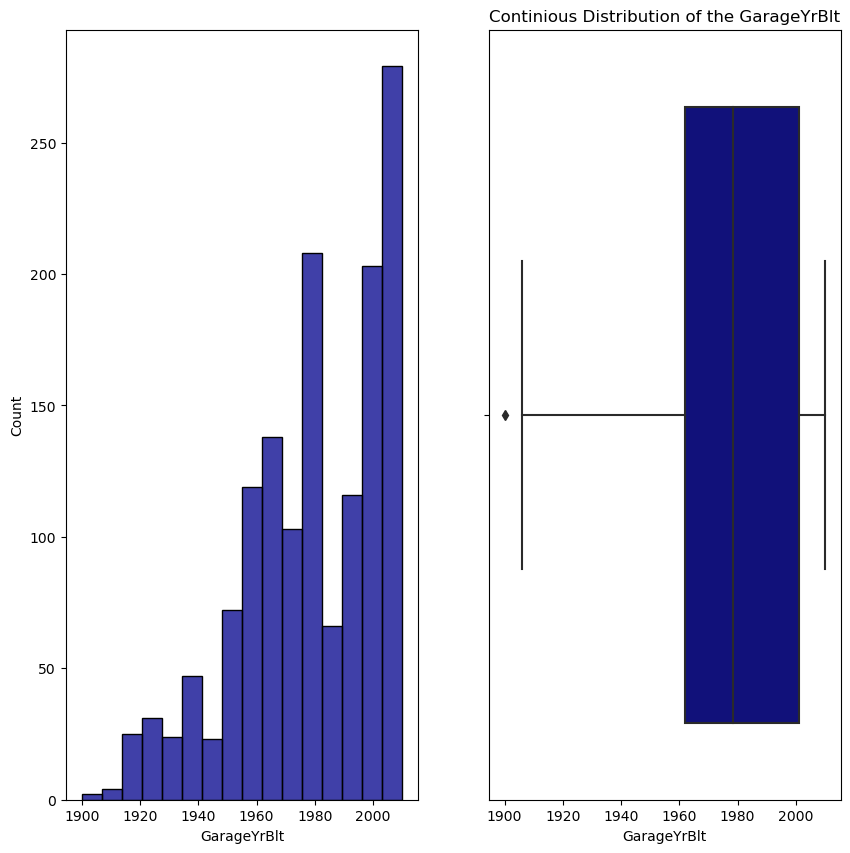

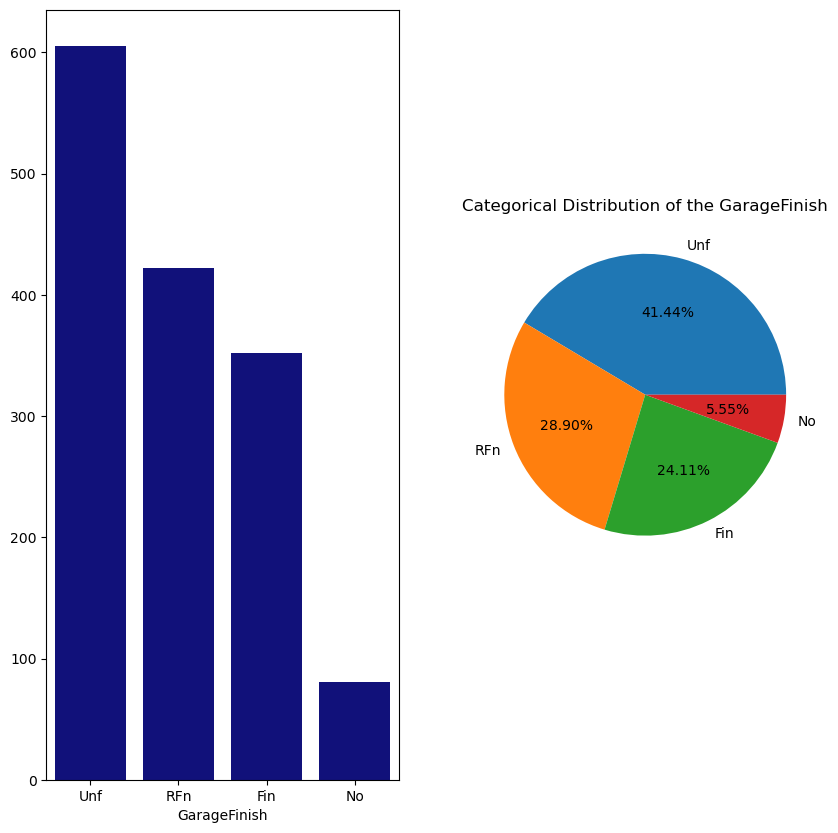

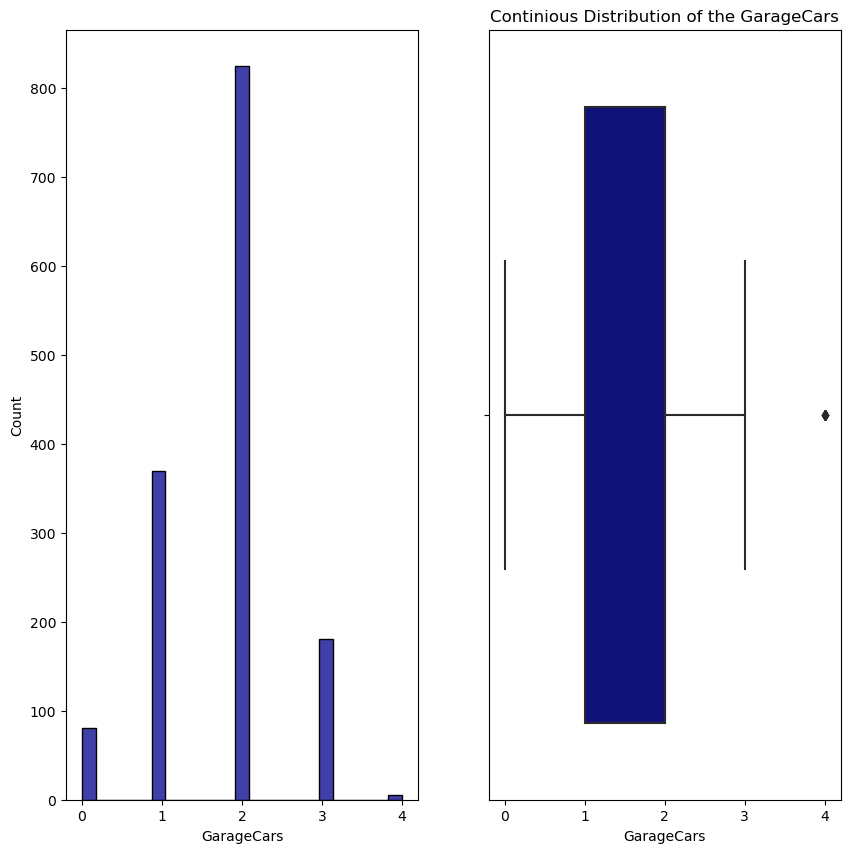

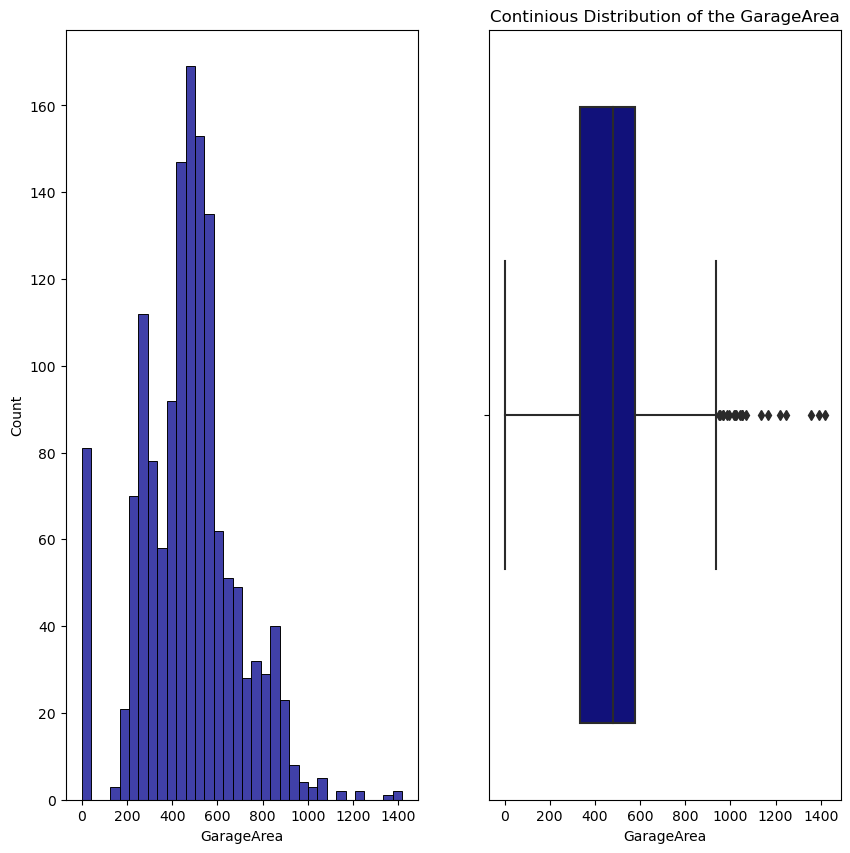

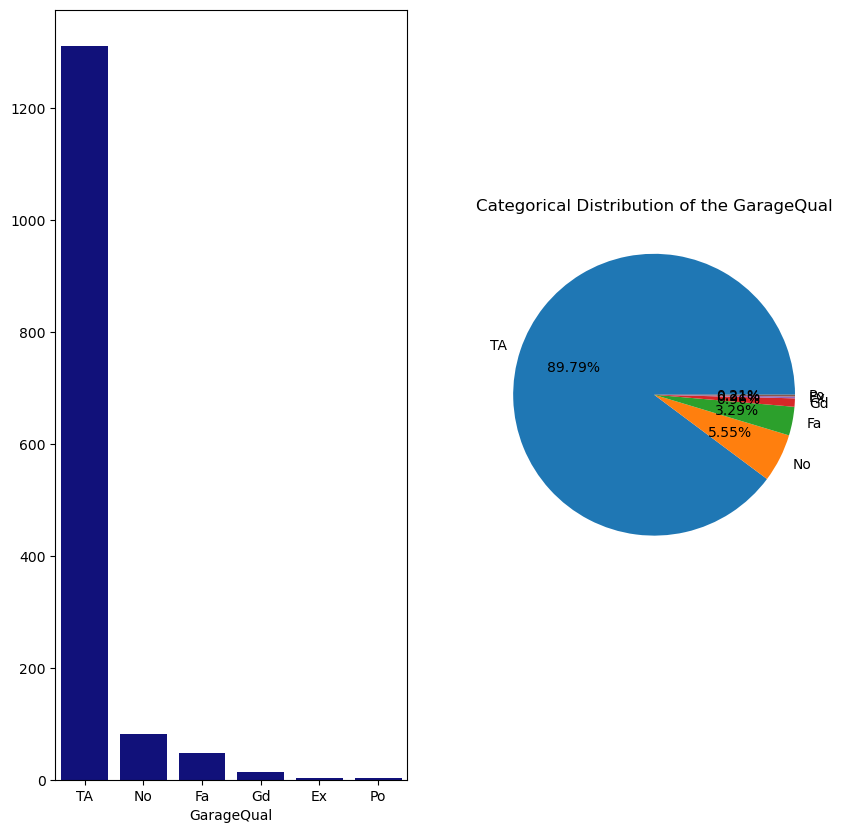

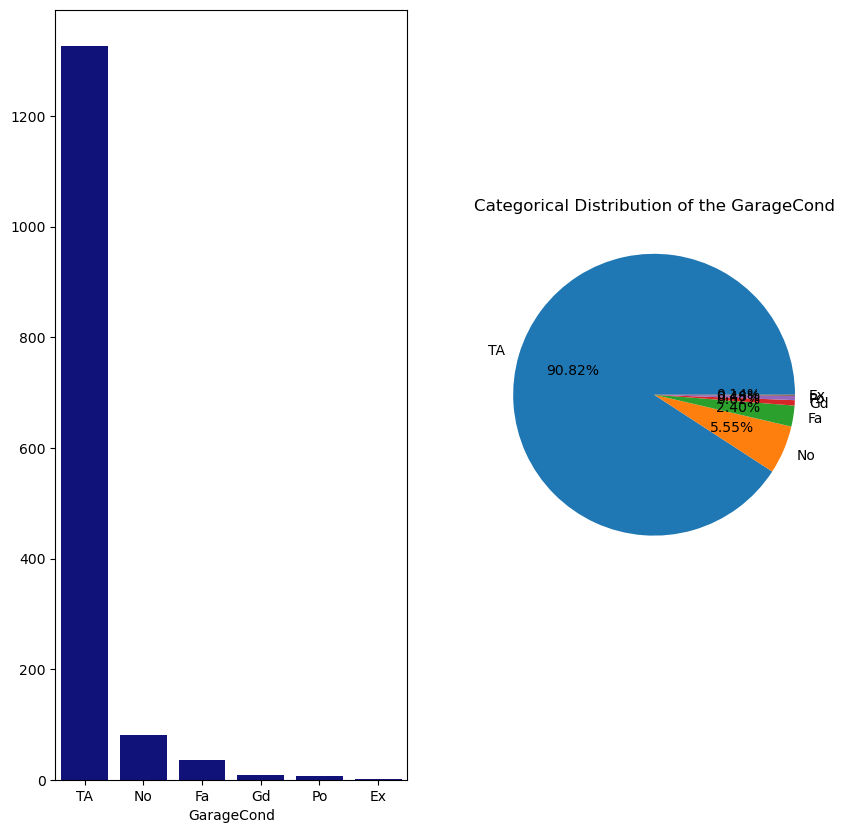

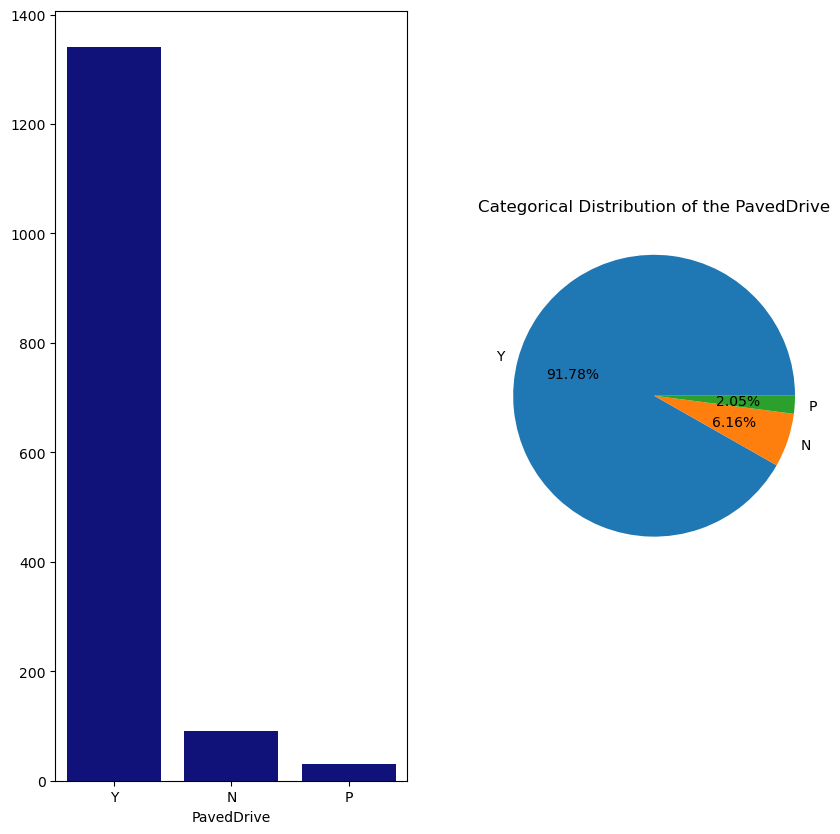

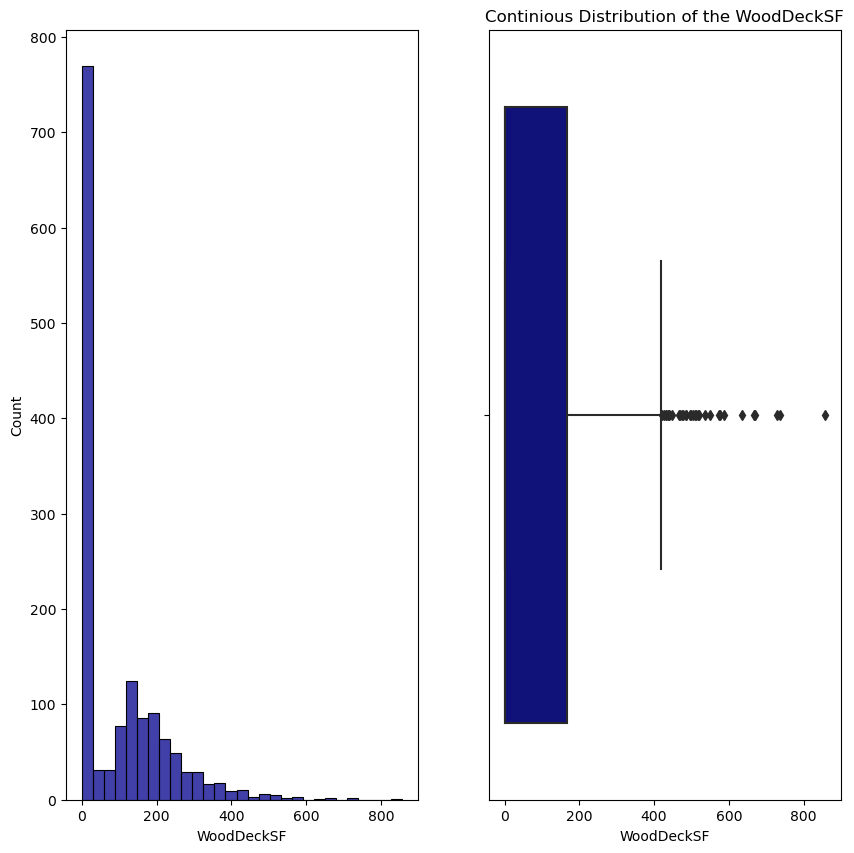

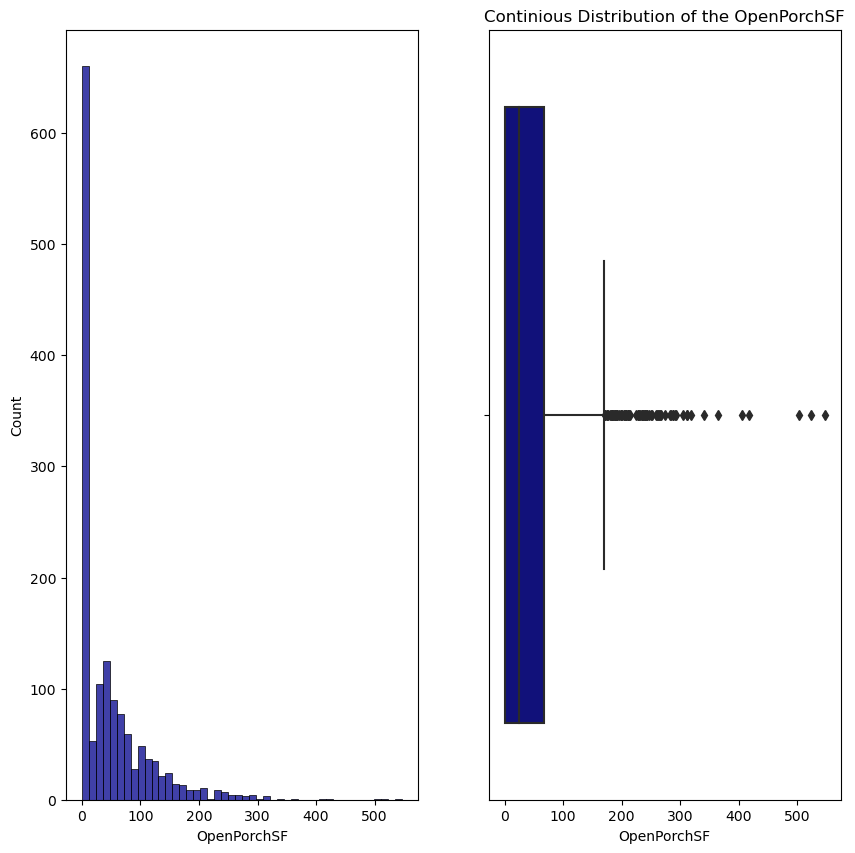

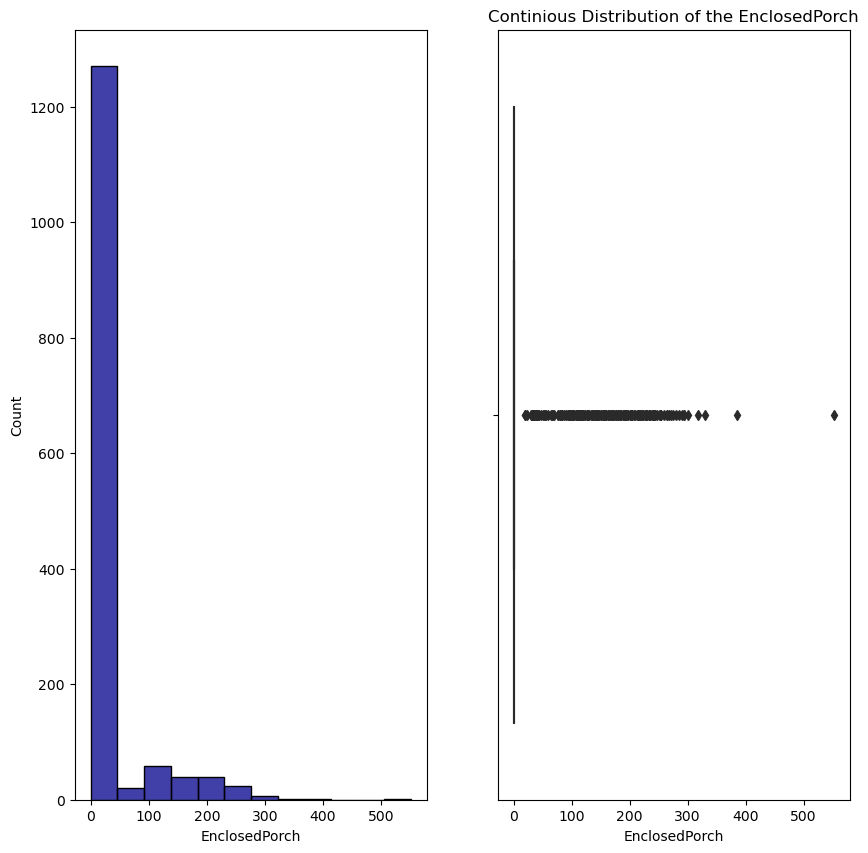

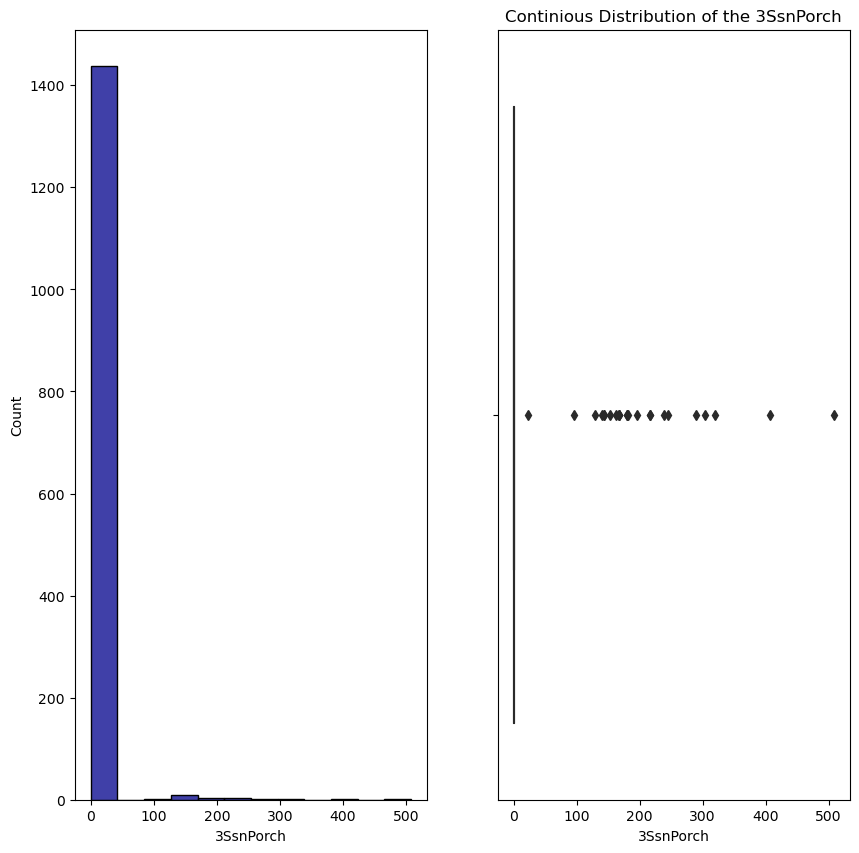

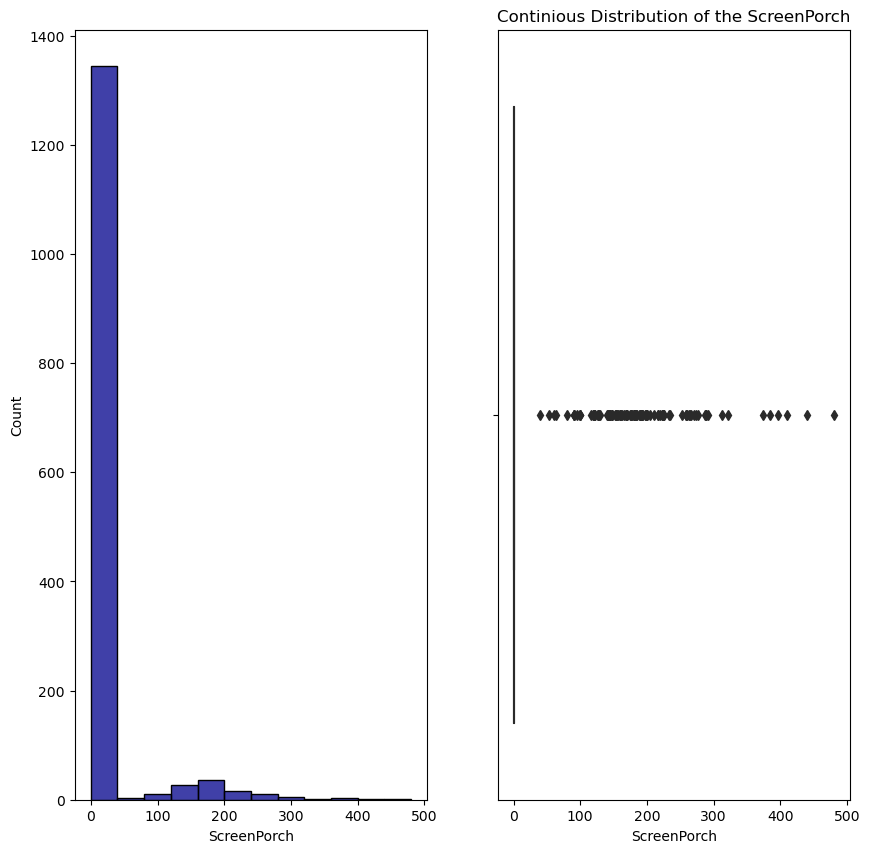

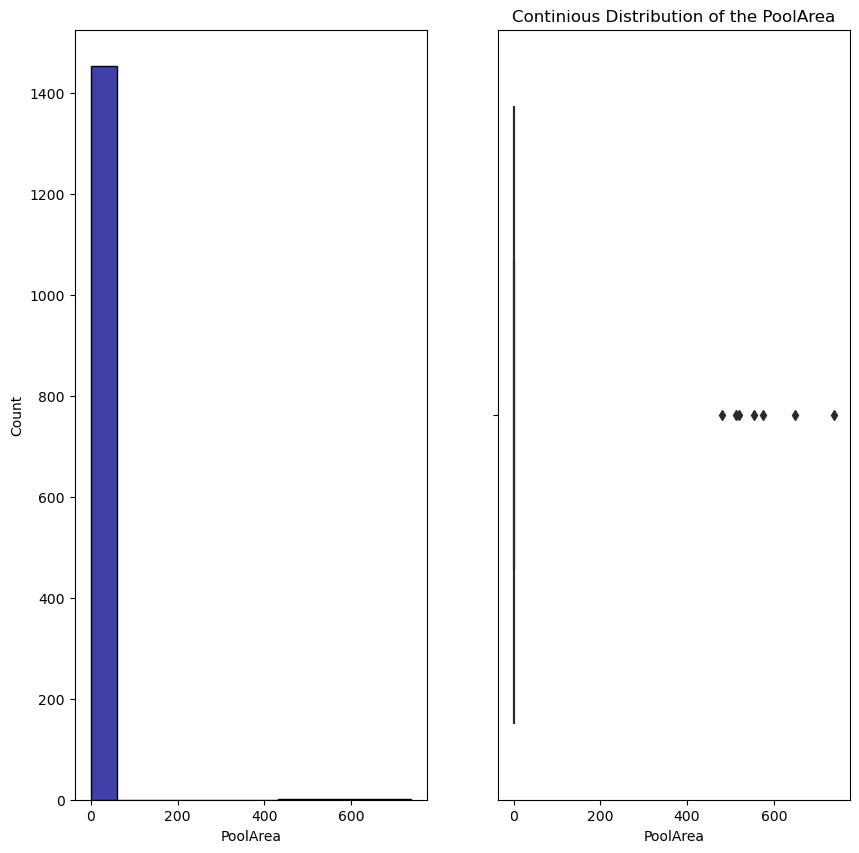

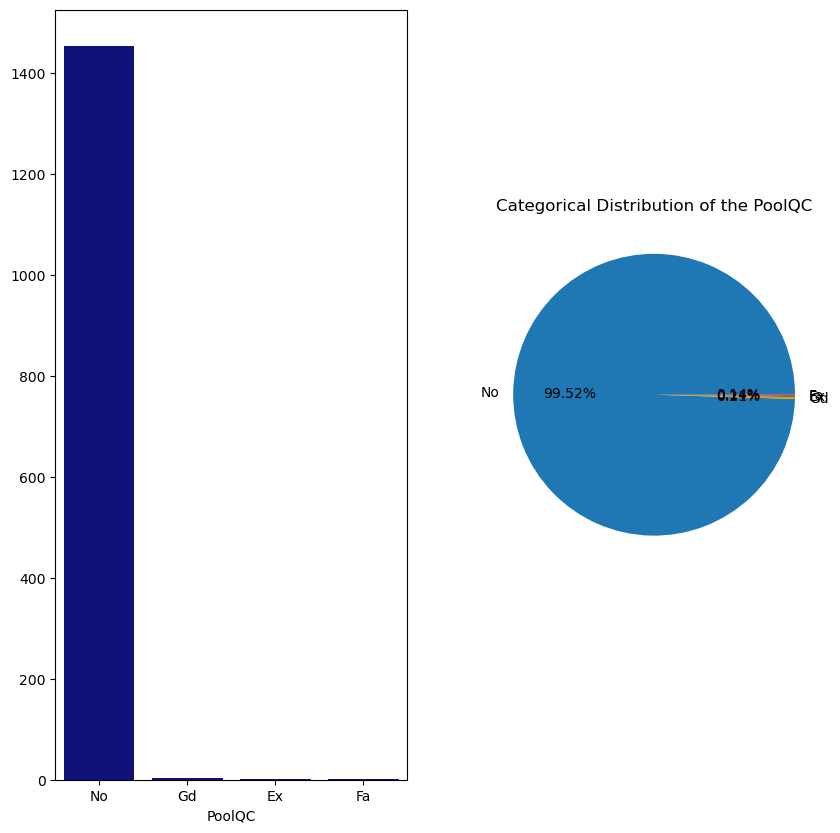

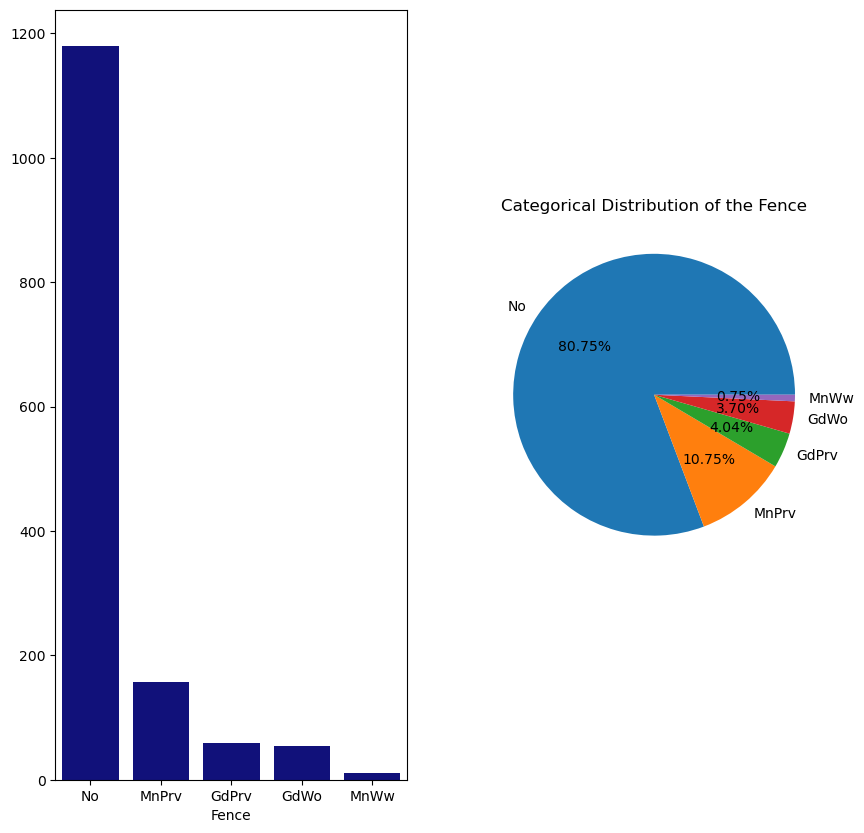

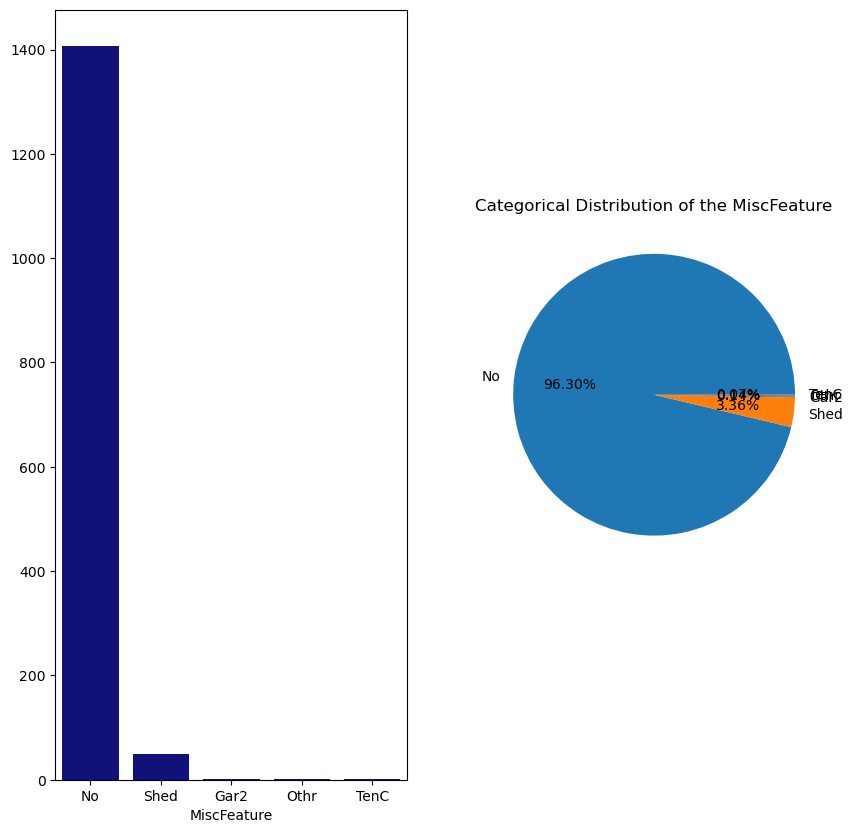

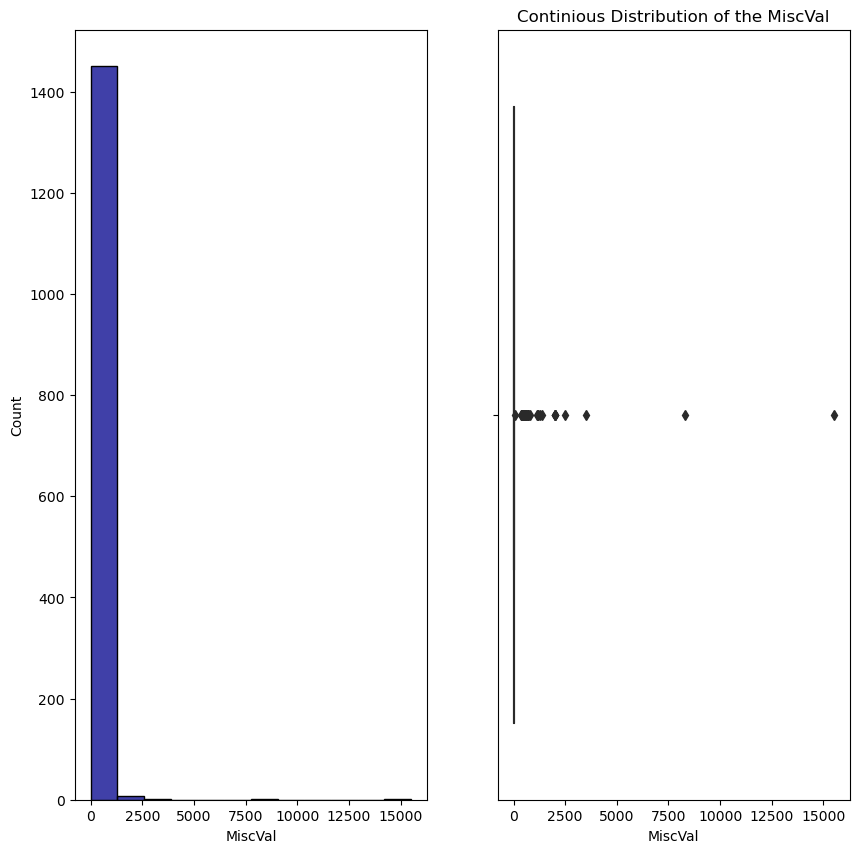

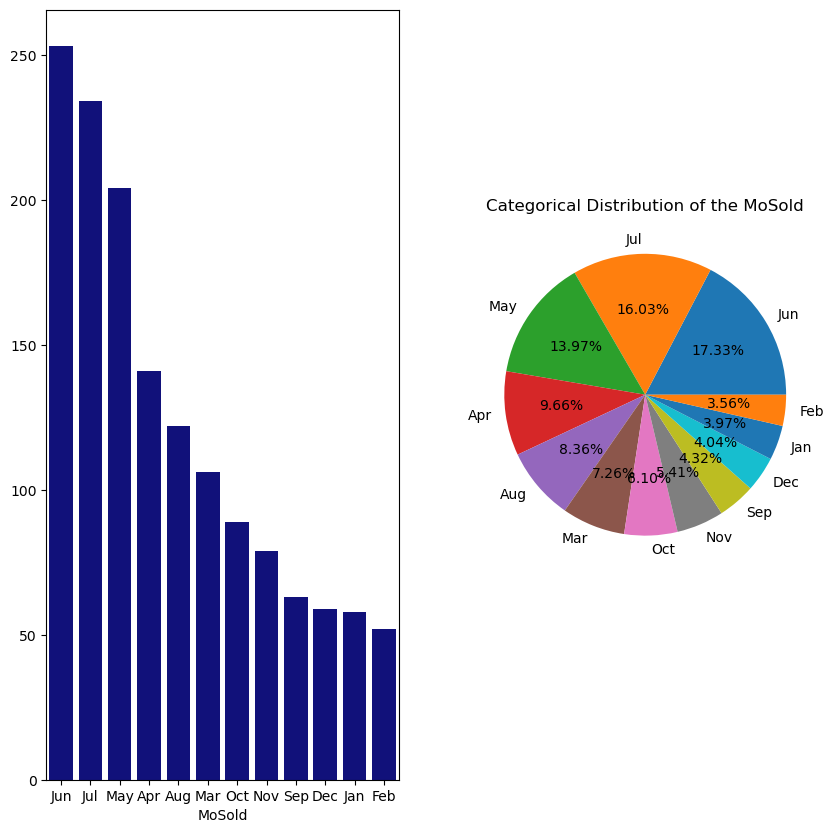

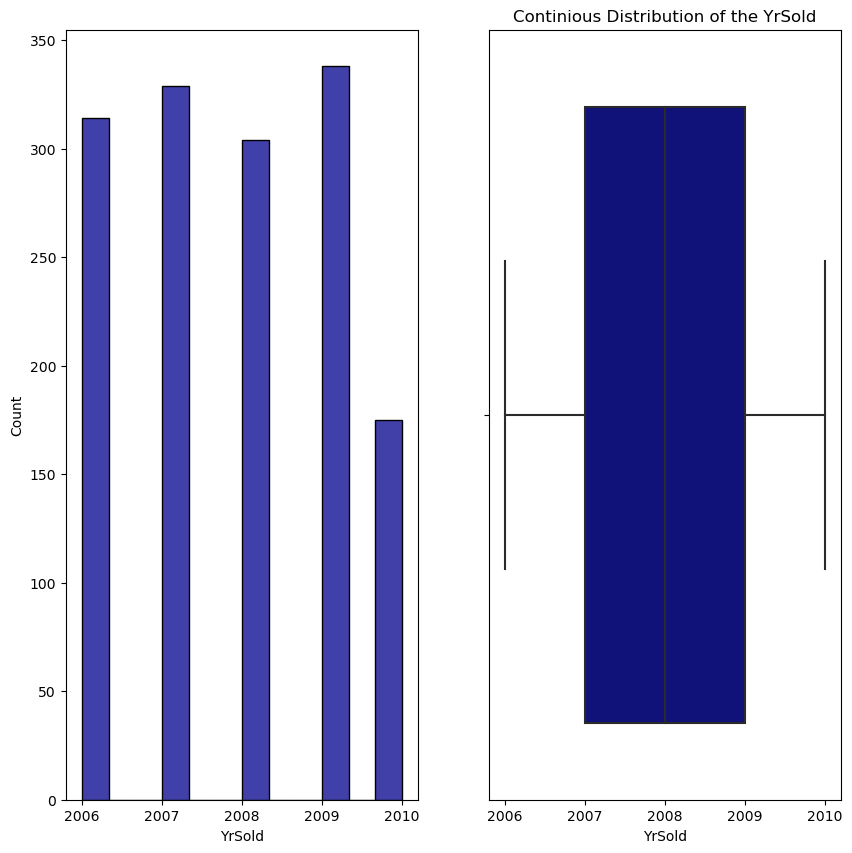

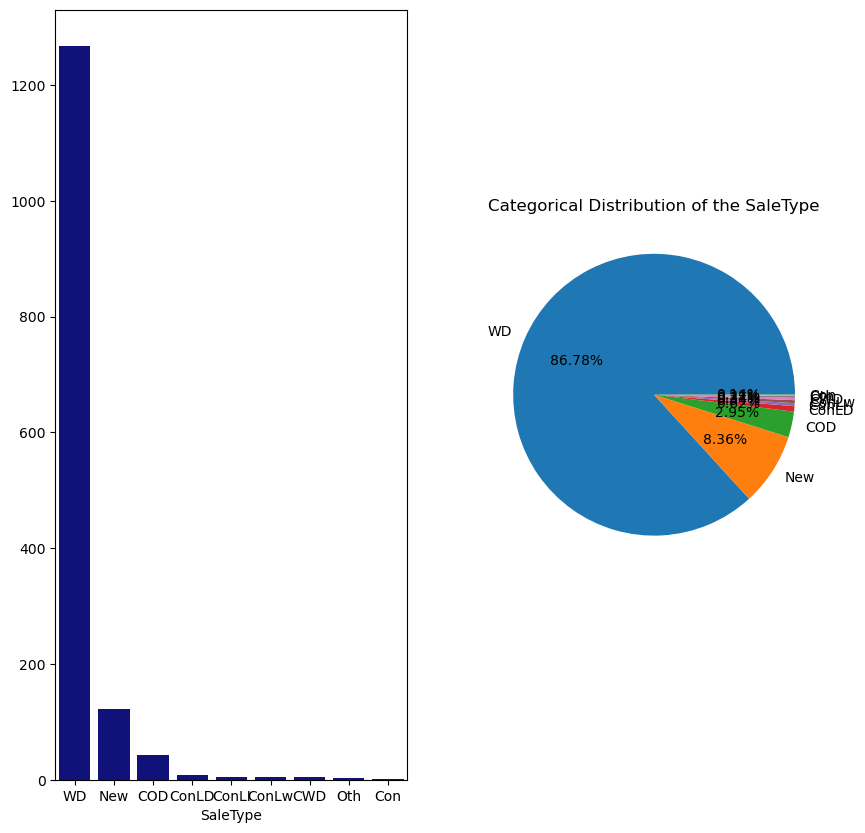

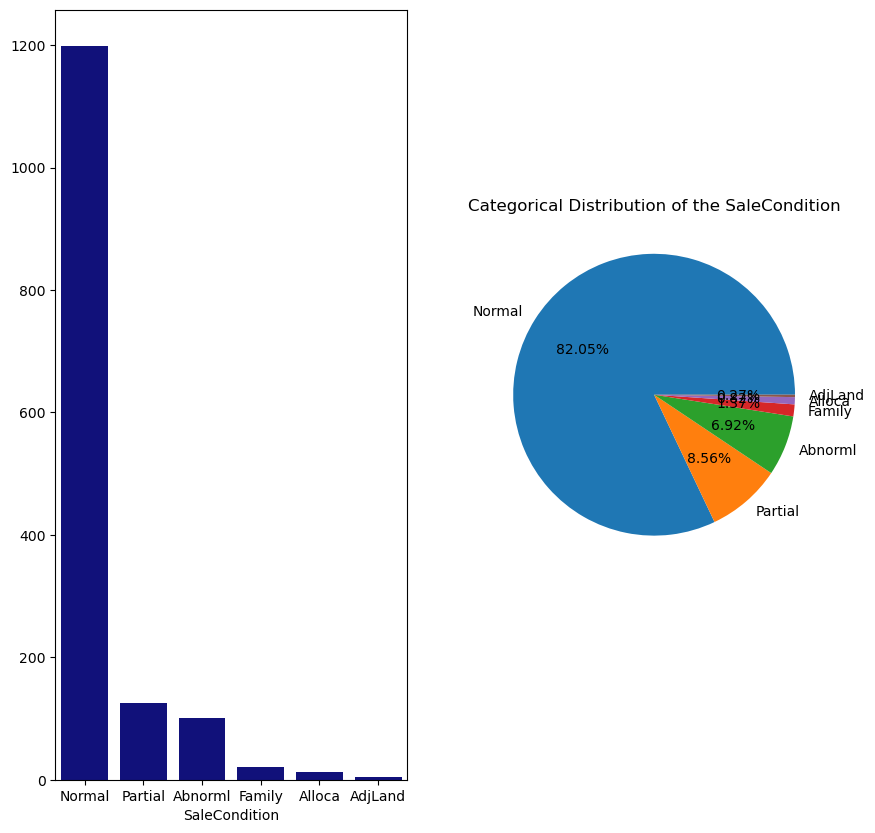

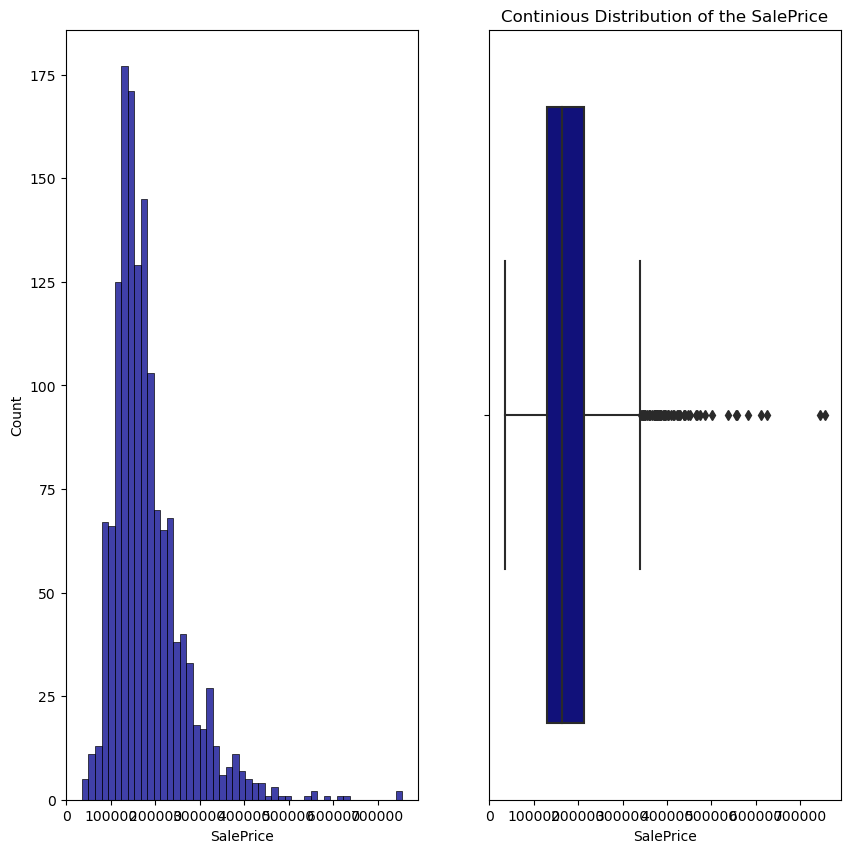

In [28]:
# # univariate_analysis
univariate_analysis(df1)

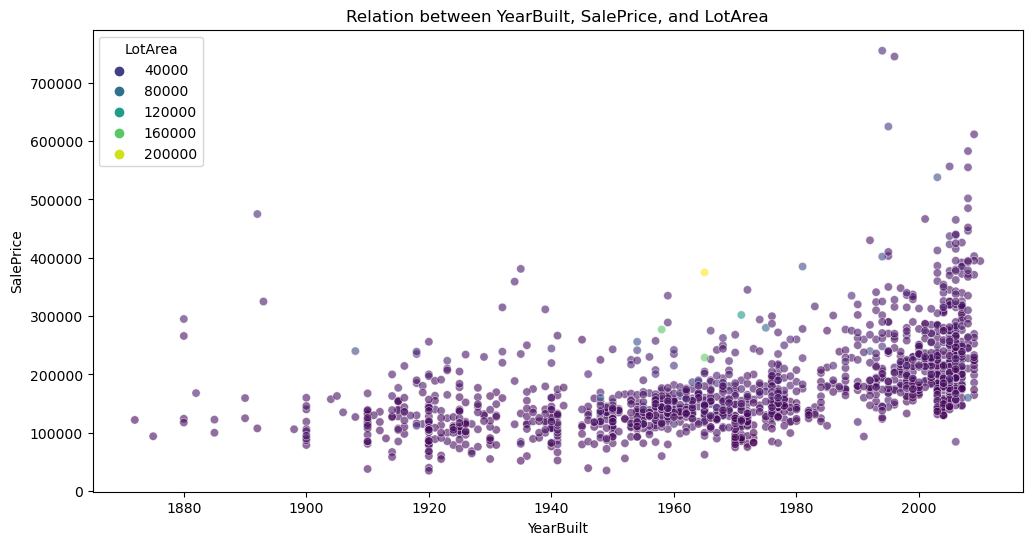

In [29]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', hue='LotArea', data=df1, alpha=0.6, palette='viridis')
plt.title('Relation between YearBuilt, SalePrice, and LotArea')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.legend(title='LotArea')
plt.show()


In [30]:
#from above plot we can find that very few house where built and sold at 80000-200000
# maximum house built and sold at 40000 lot

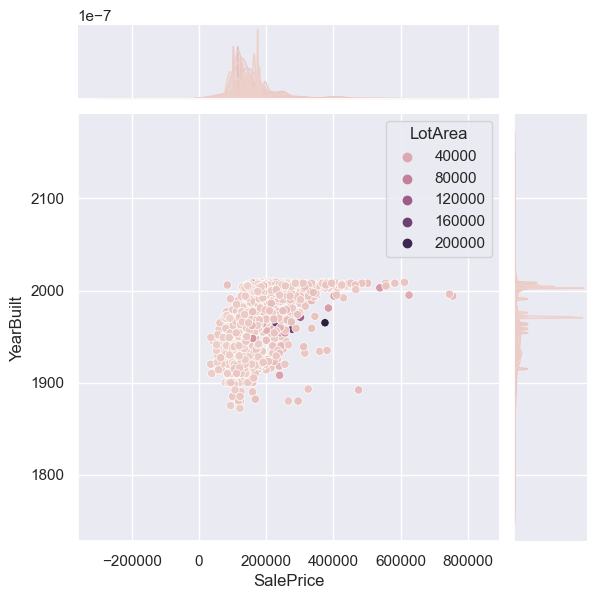

In [31]:
y=df1['YearBuilt']
x=df1['SalePrice']
a=df1['LotArea']
sns.set_theme(palette='BrBG_r')
sns.jointplot(data=df,x=x,y=y,hue=a)


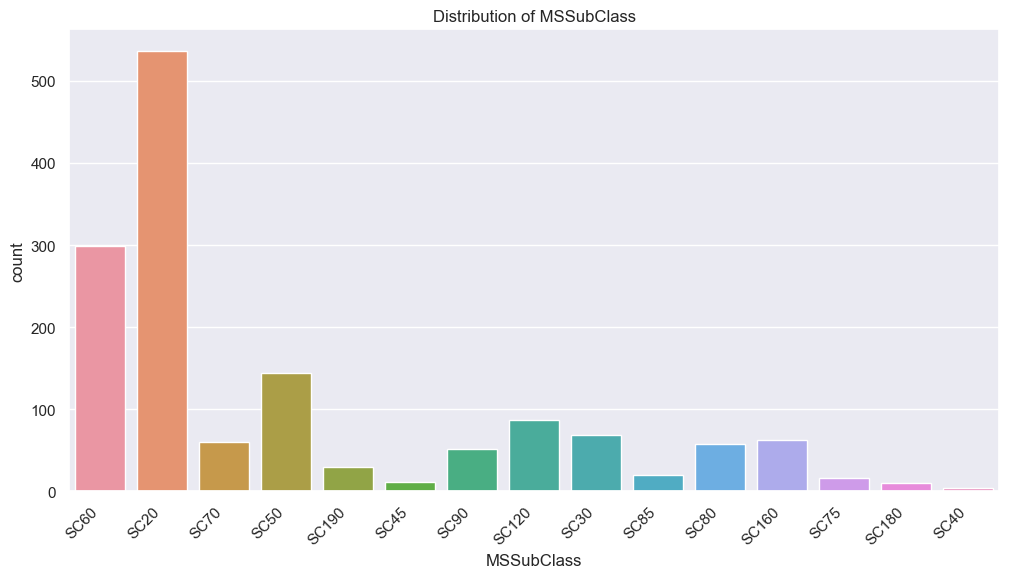

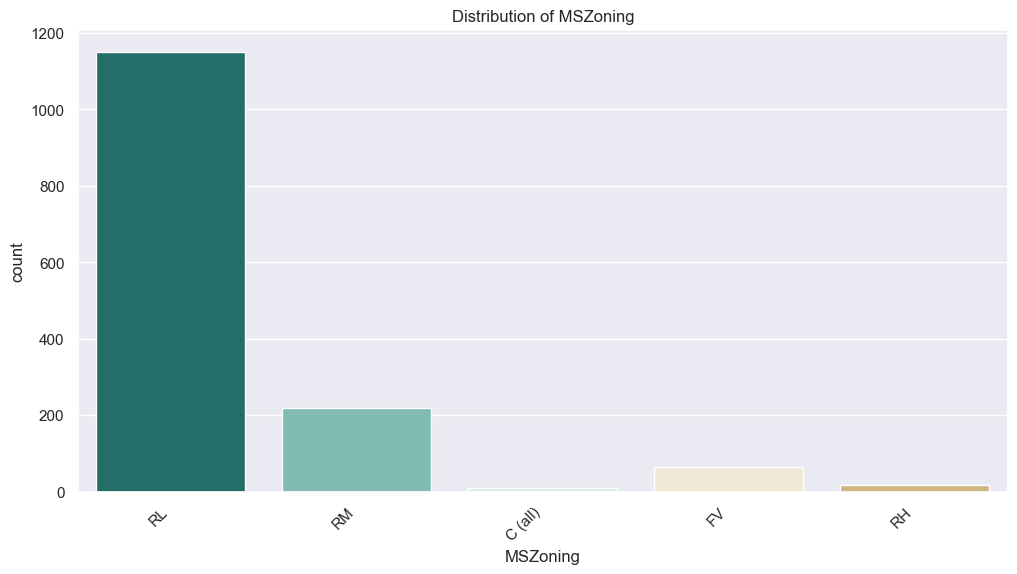

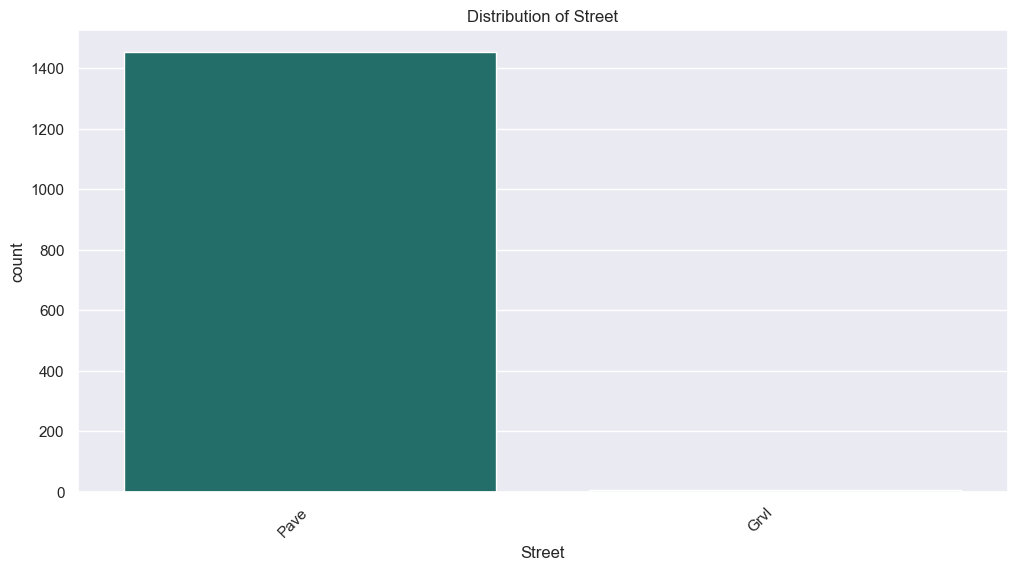

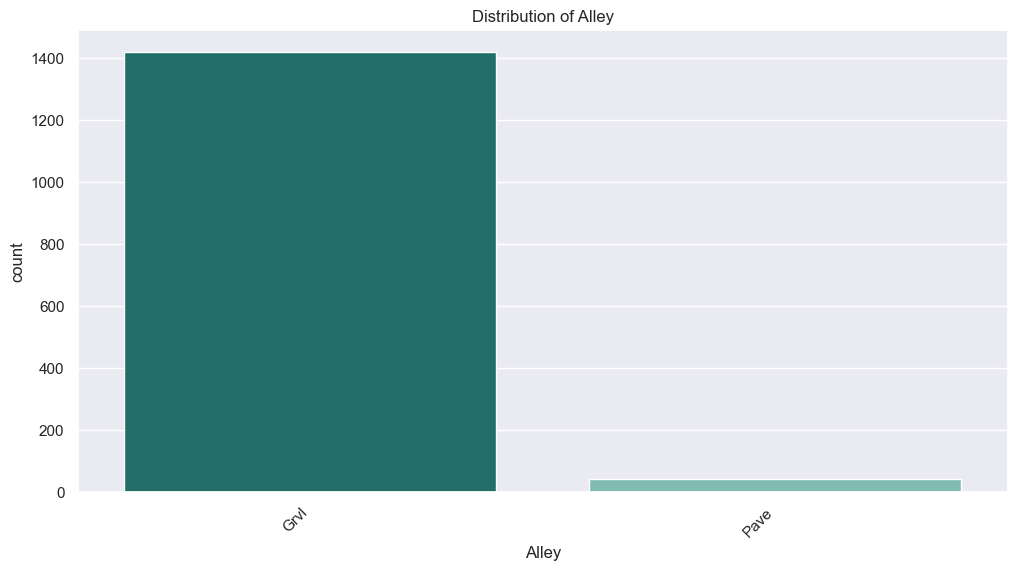

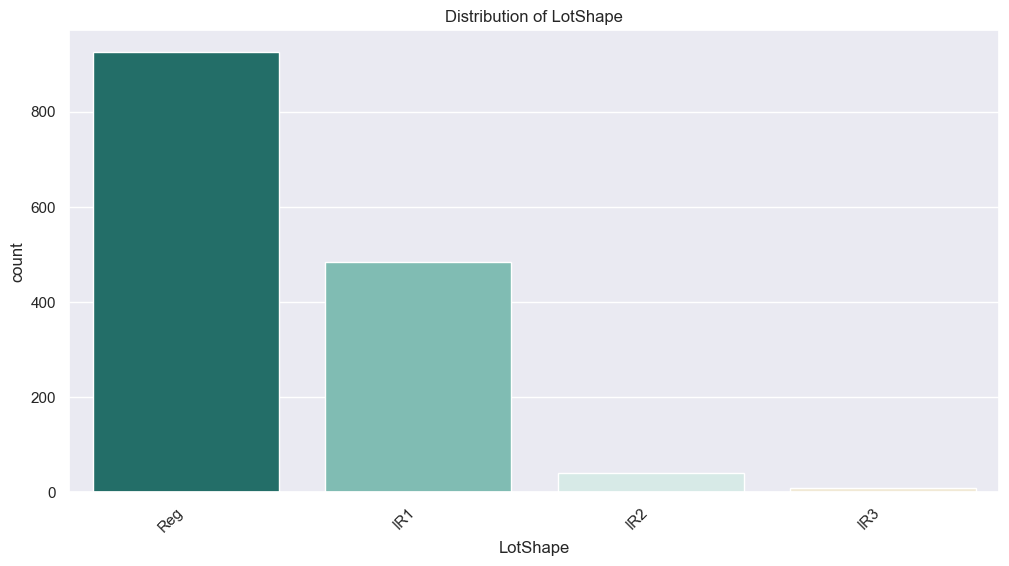

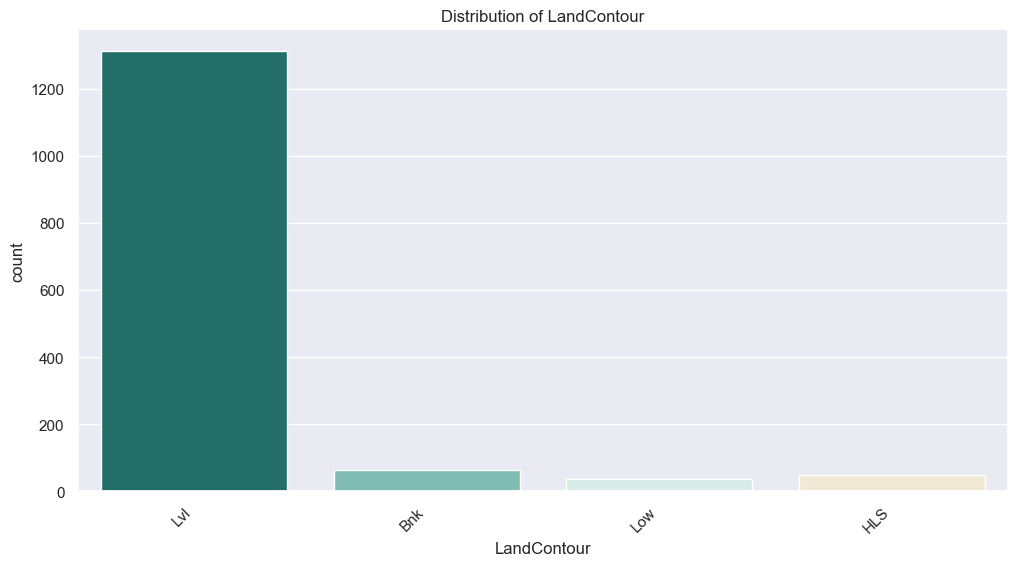

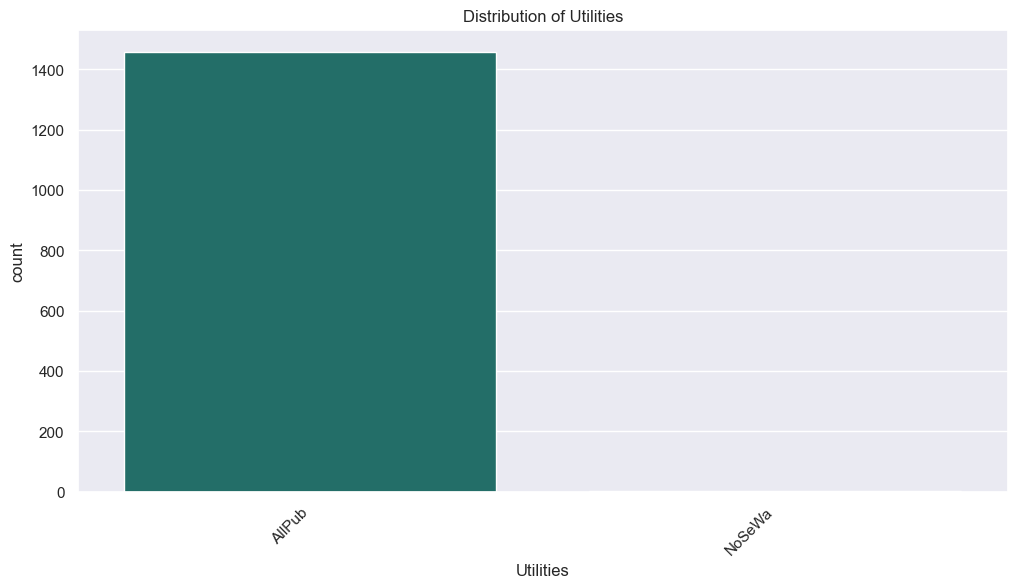

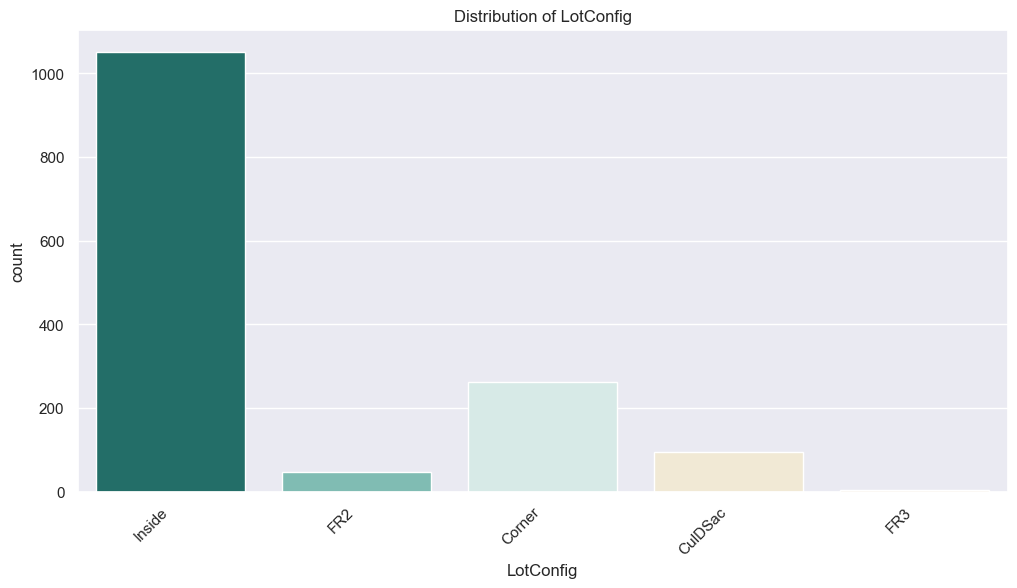

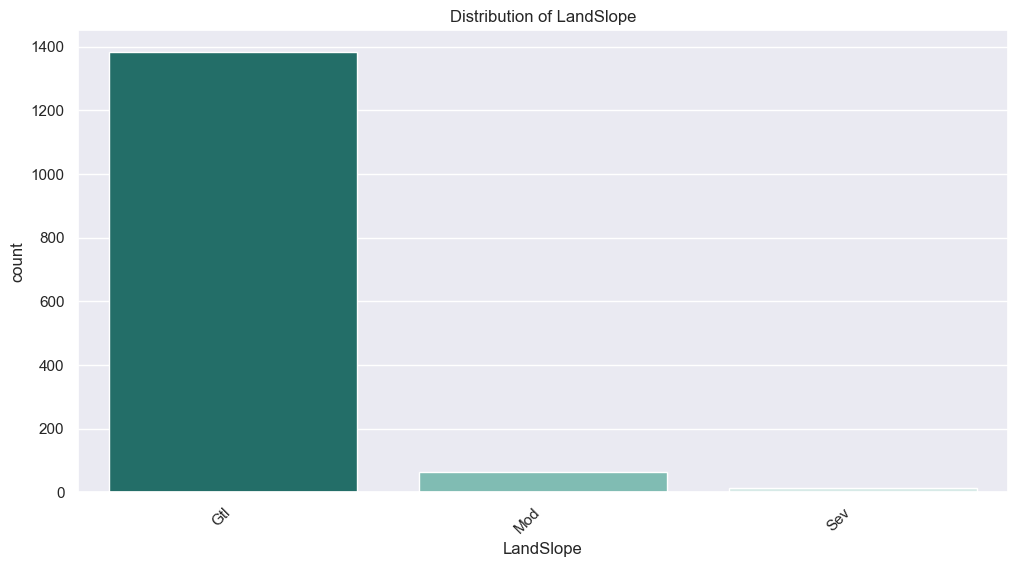

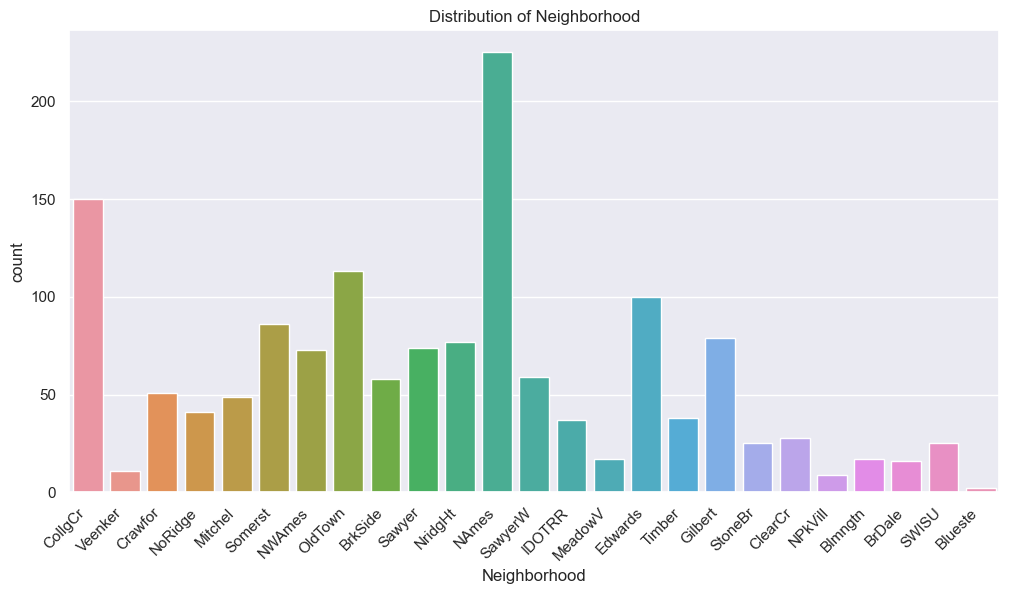

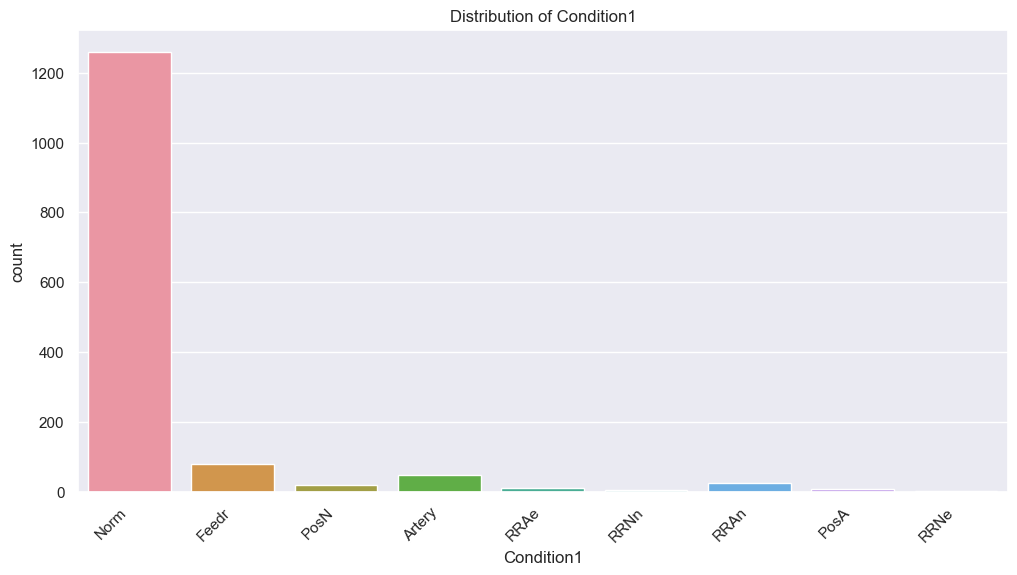

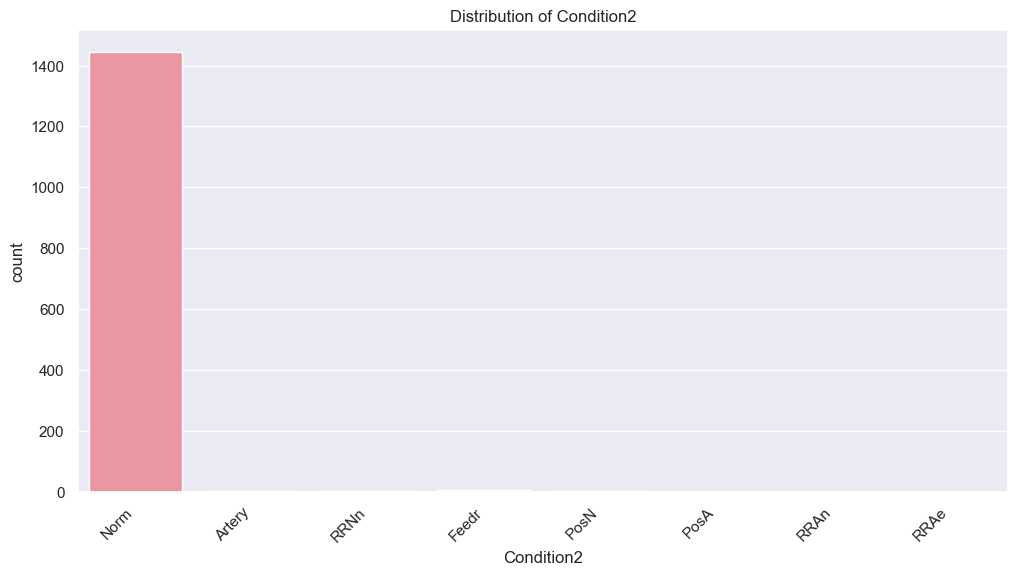

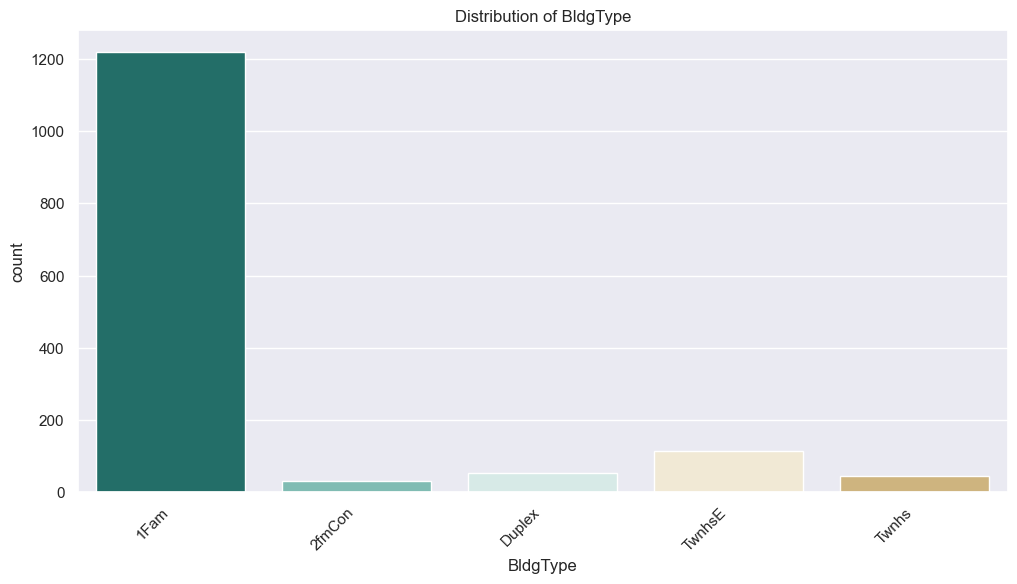

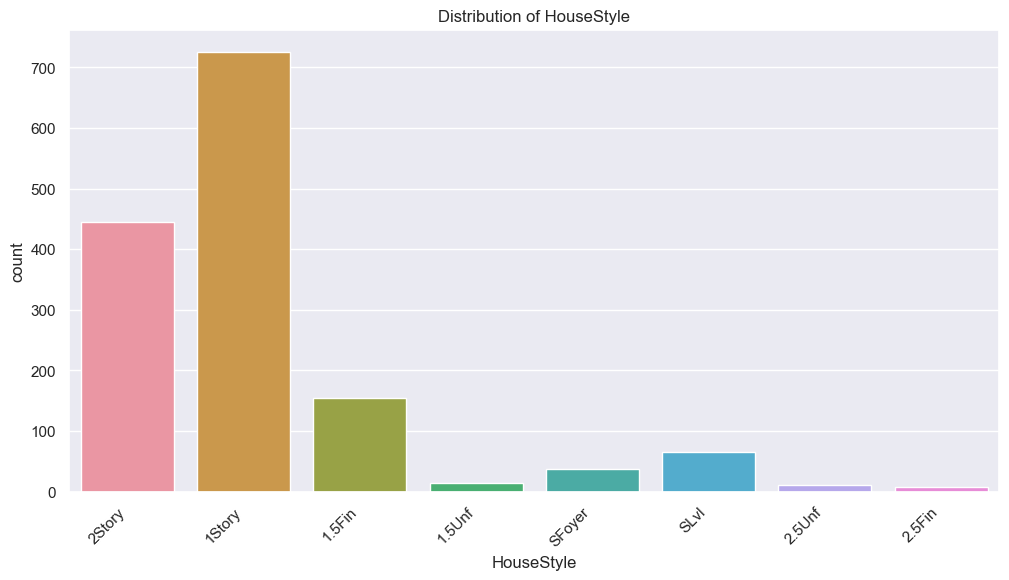

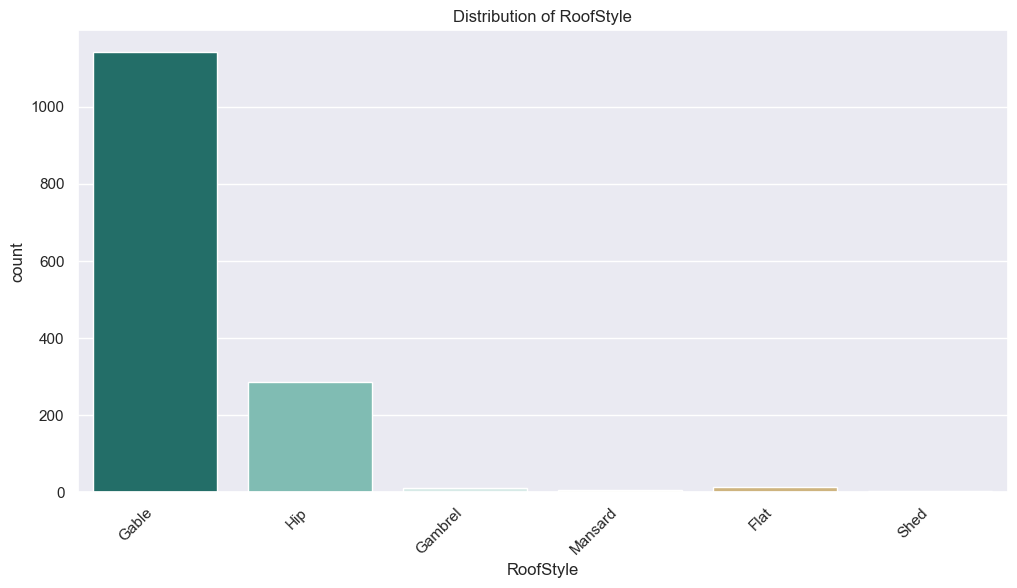

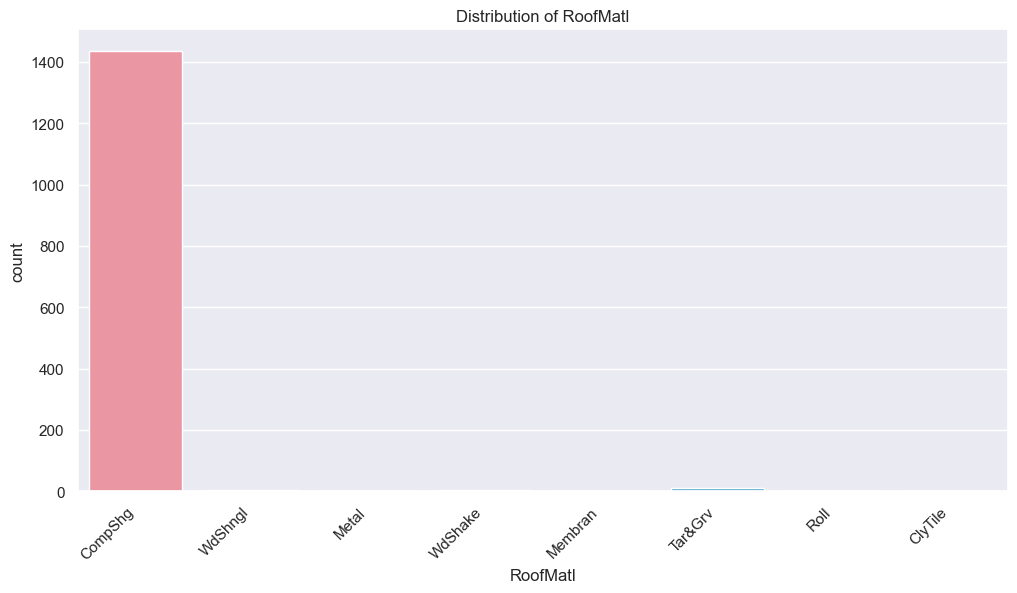

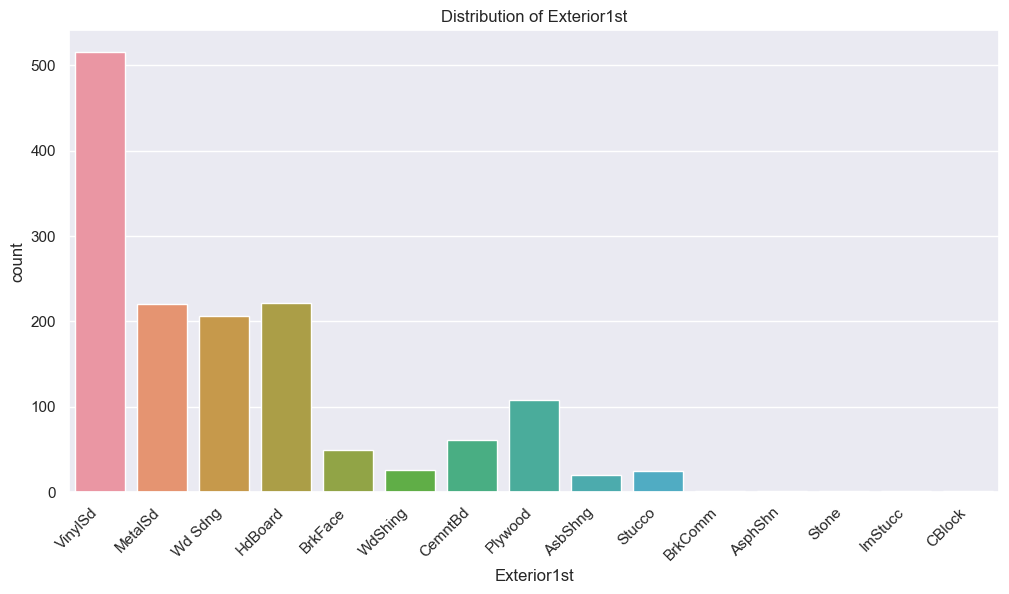

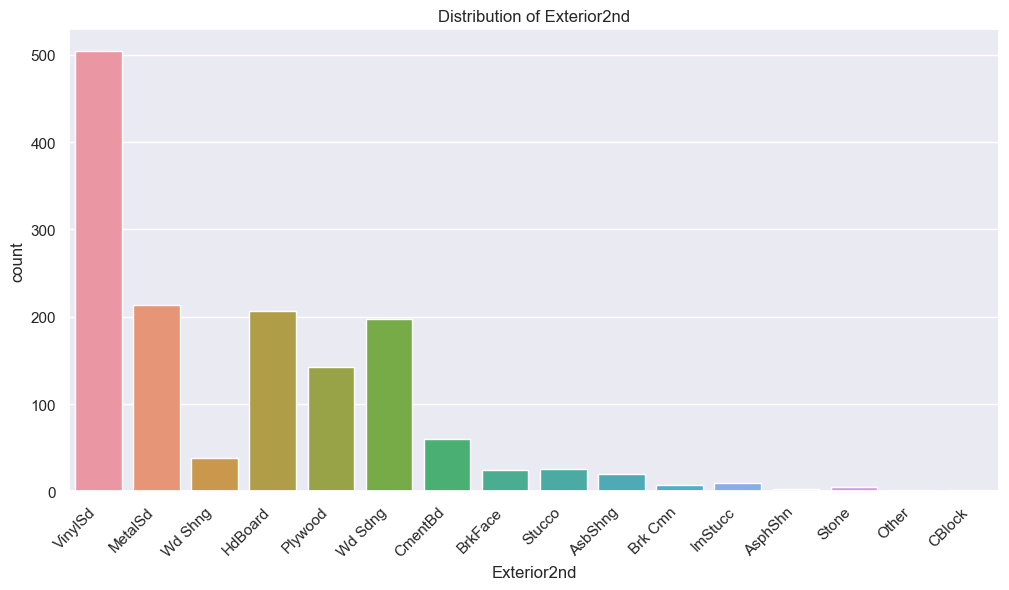

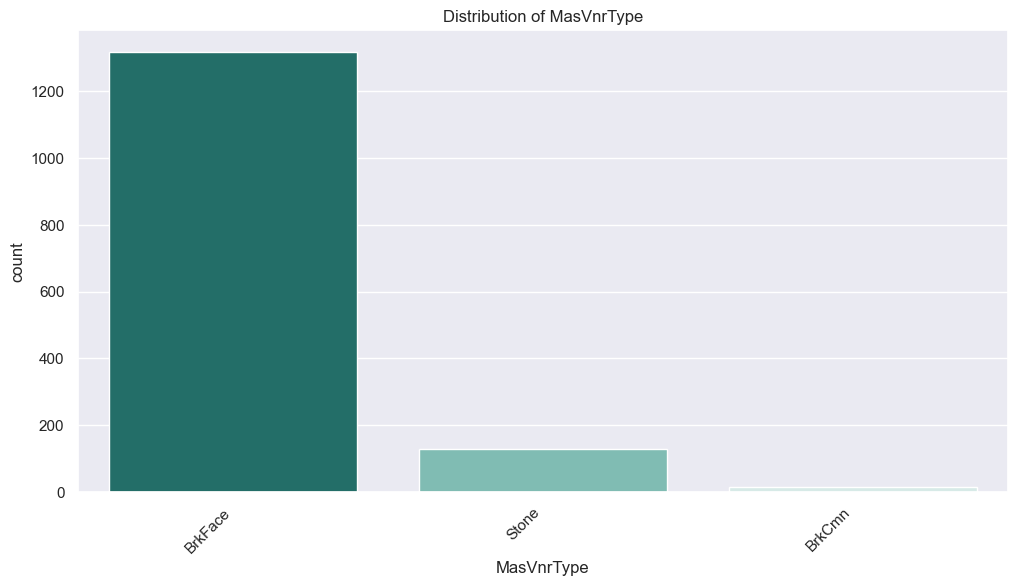

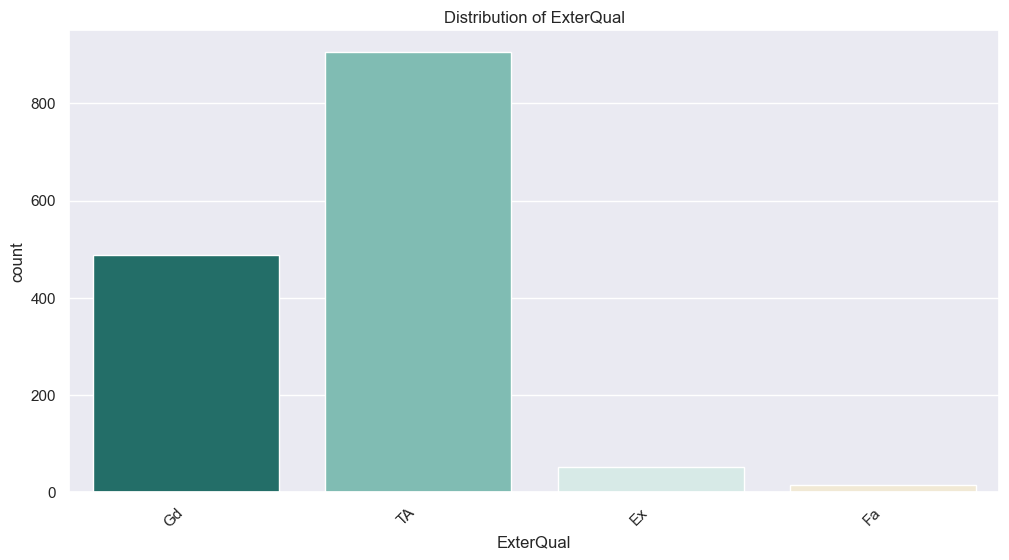

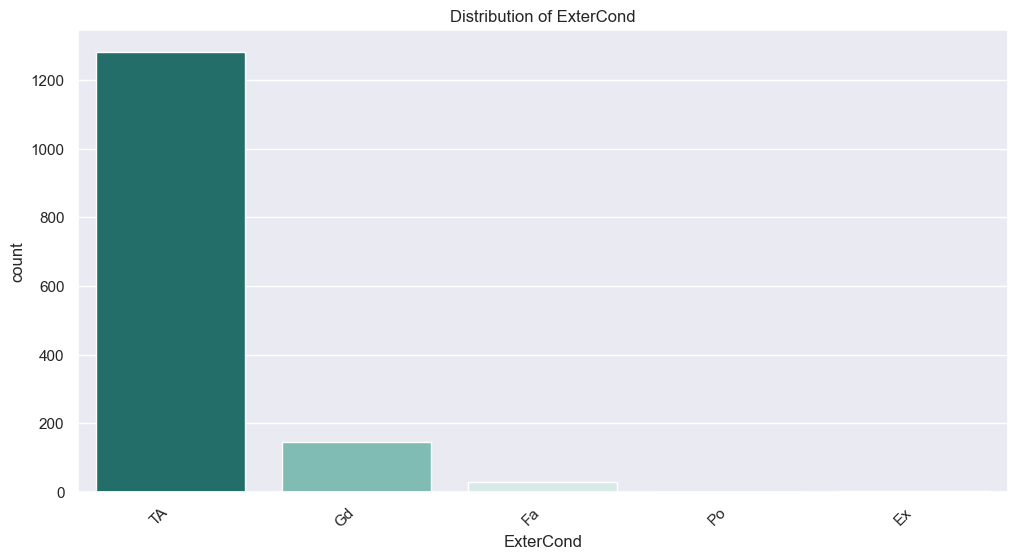

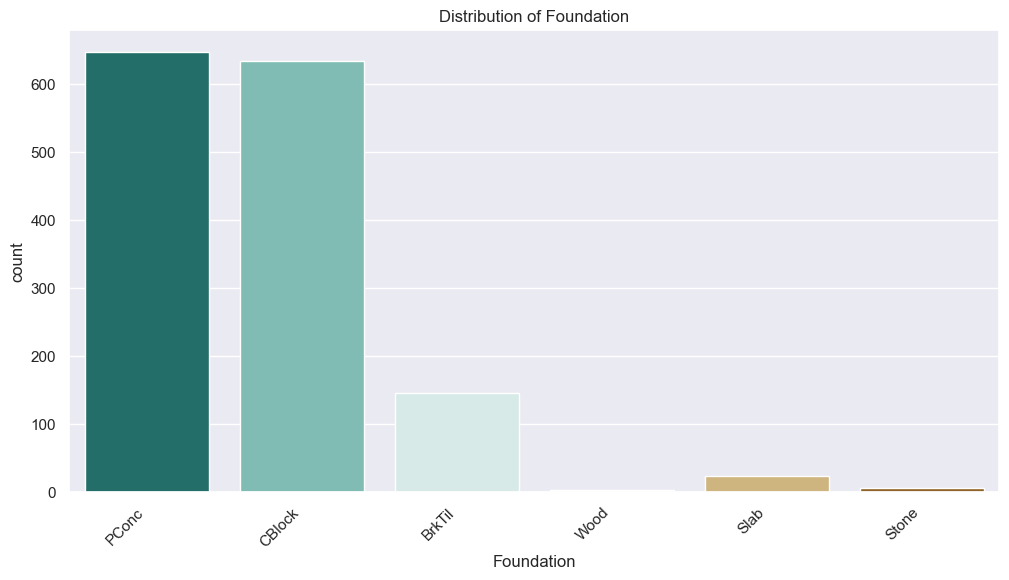

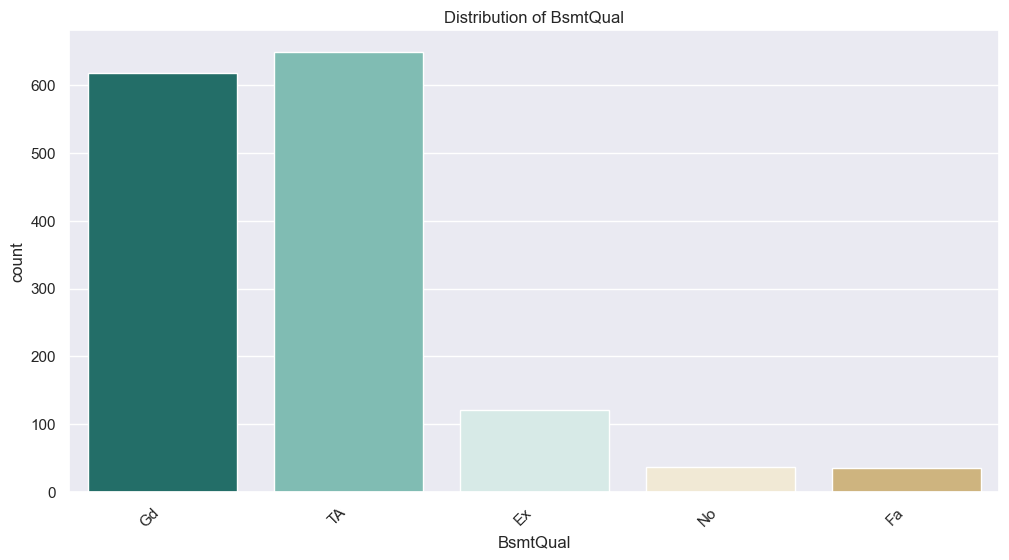

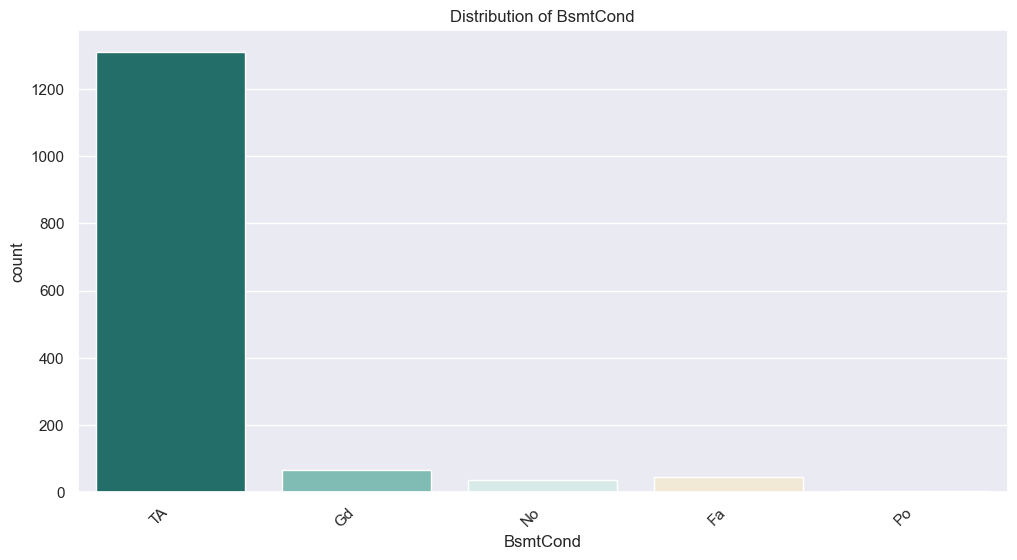

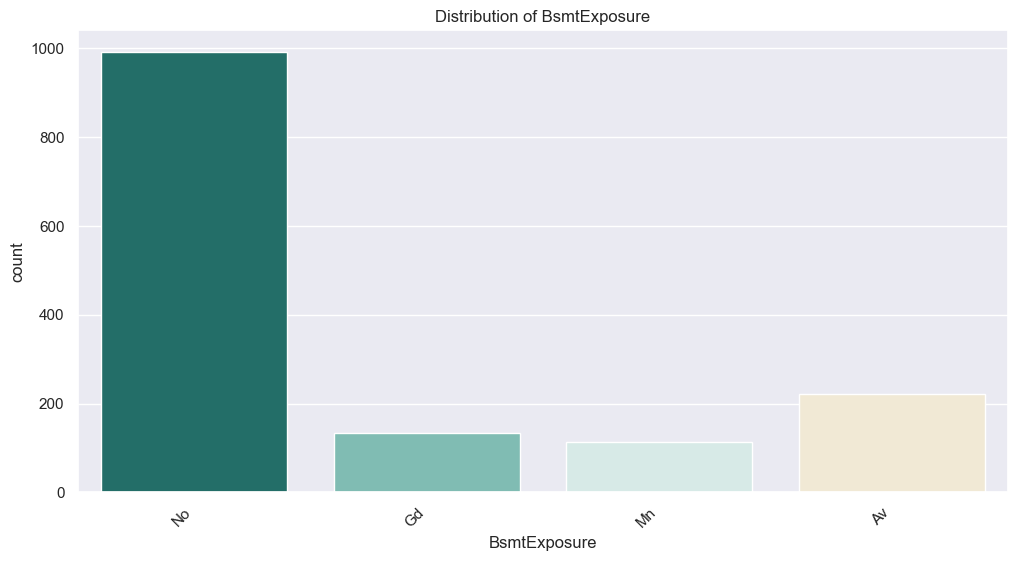

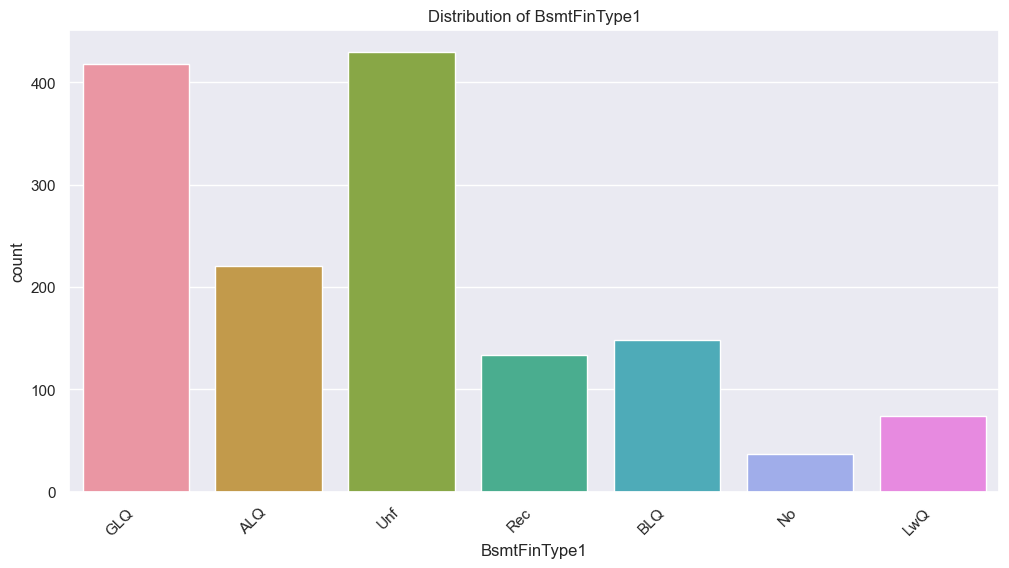

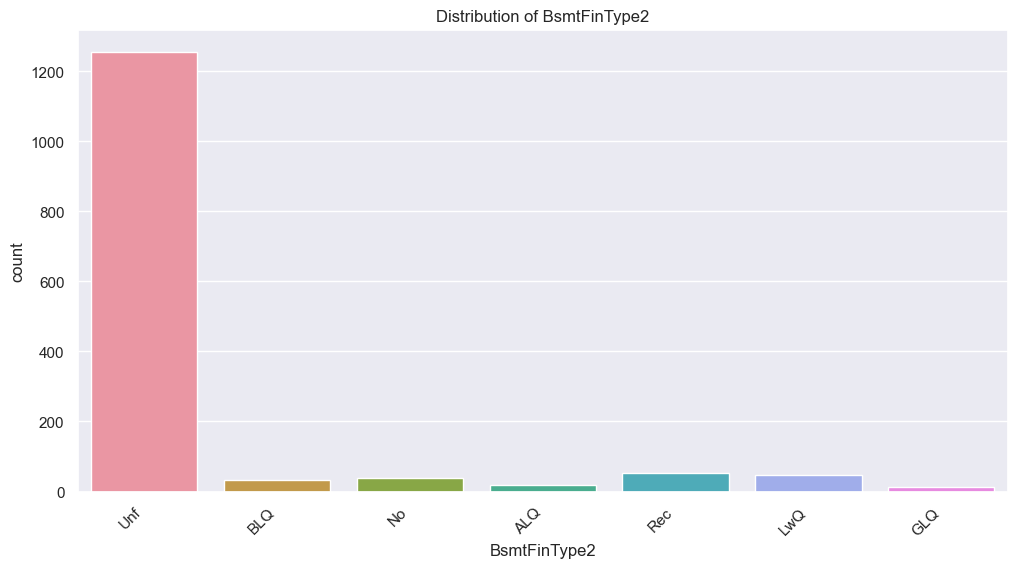

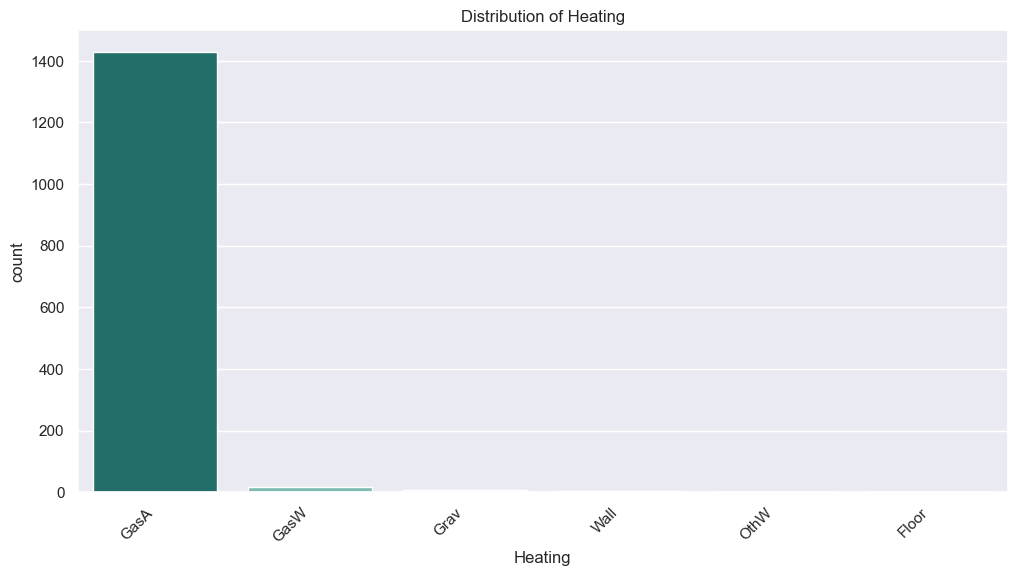

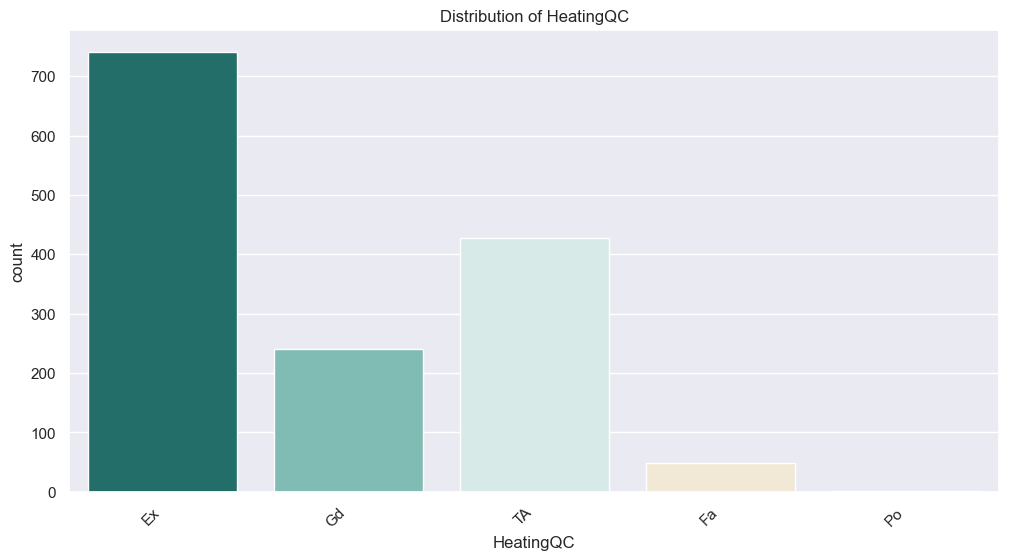

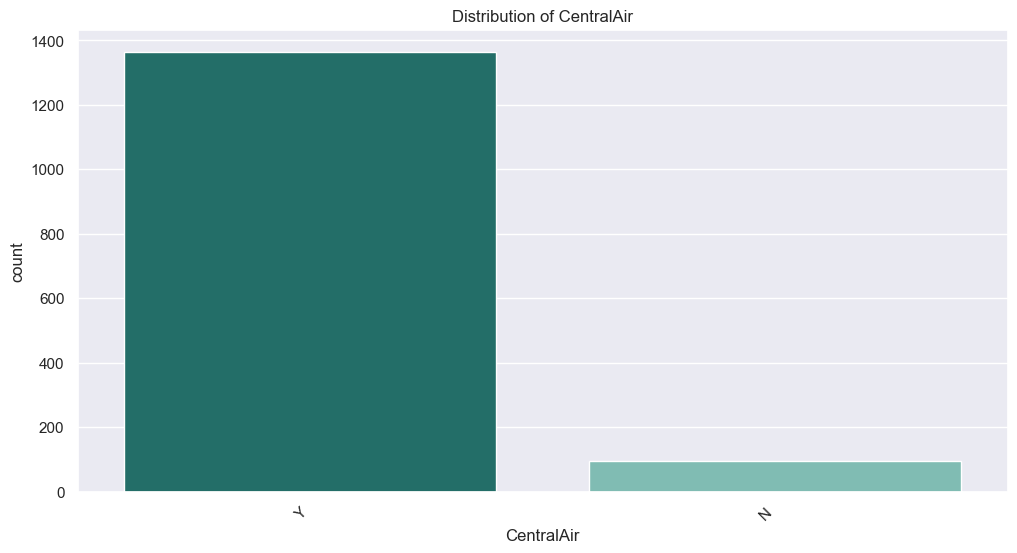

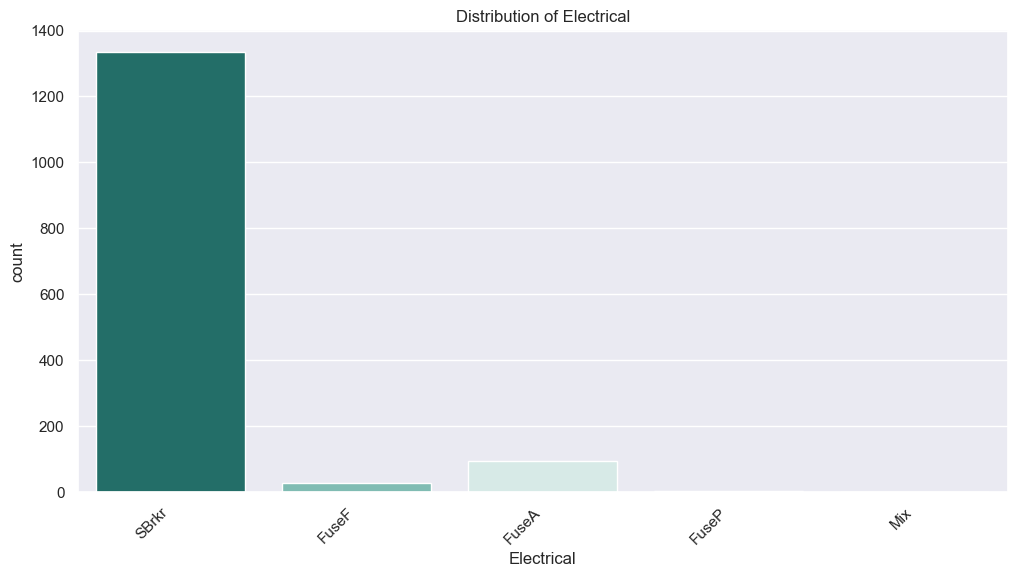

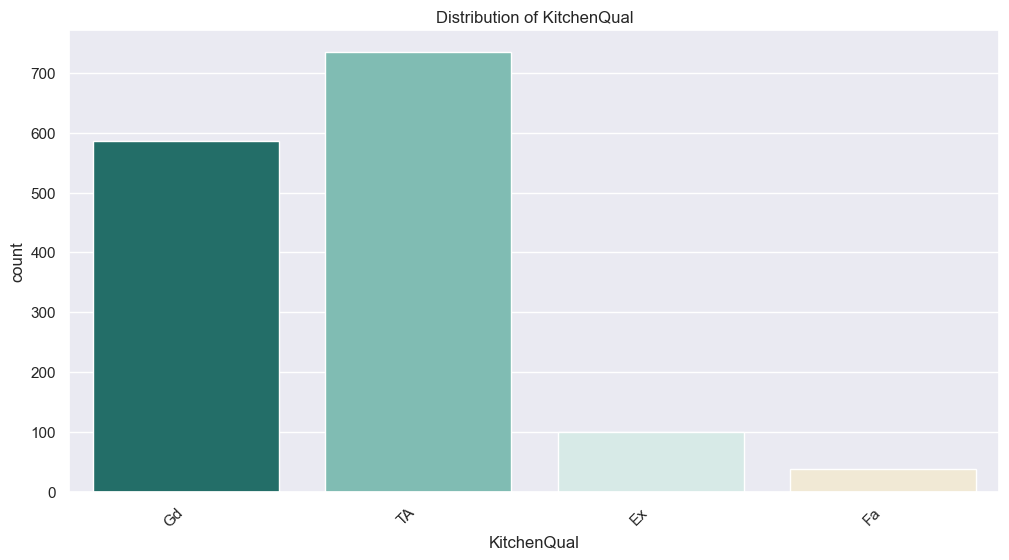

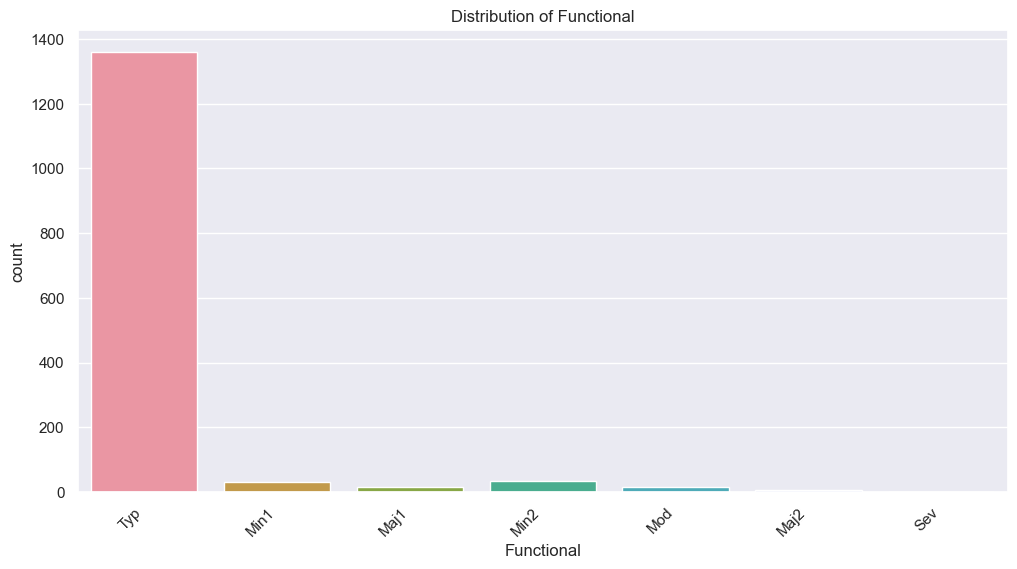

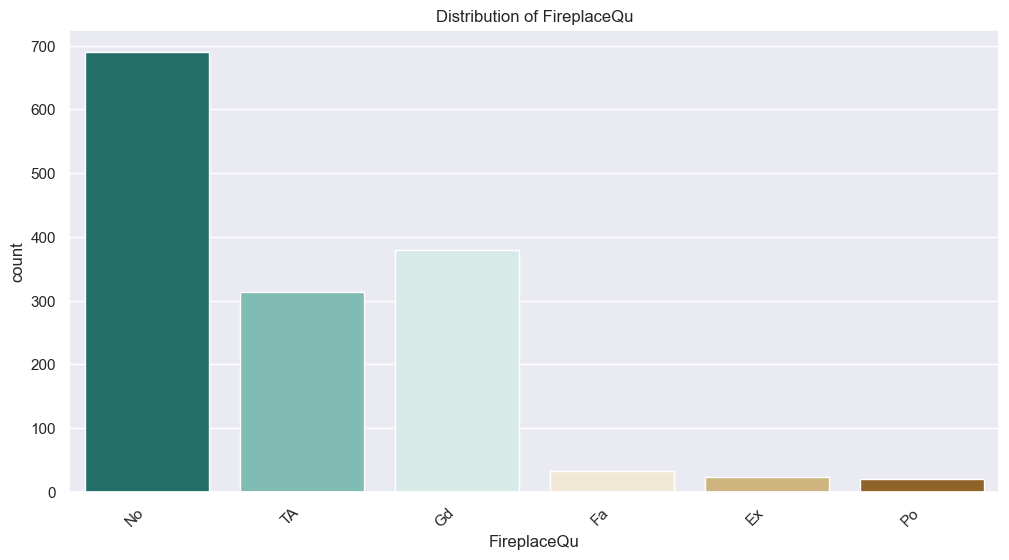

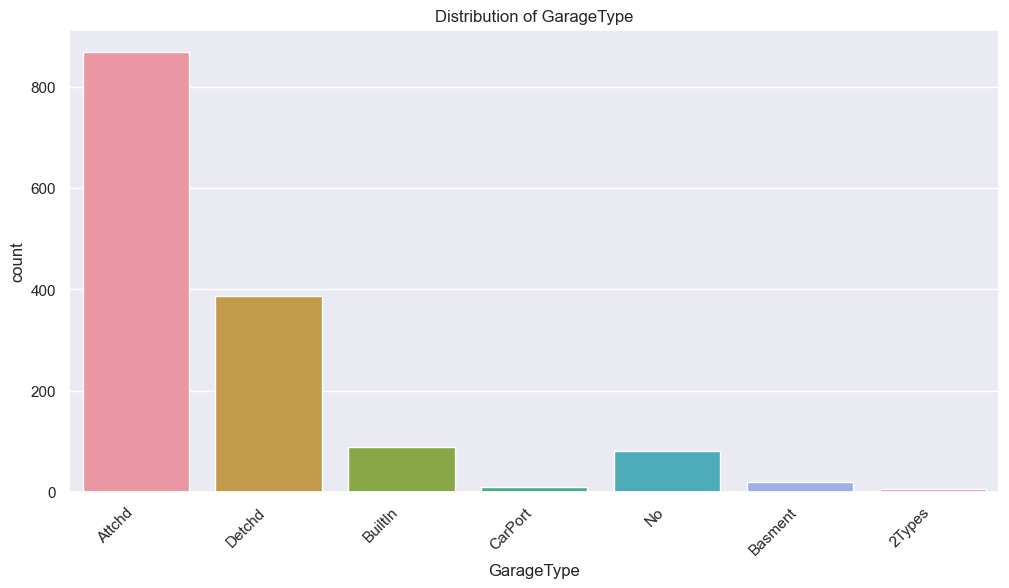

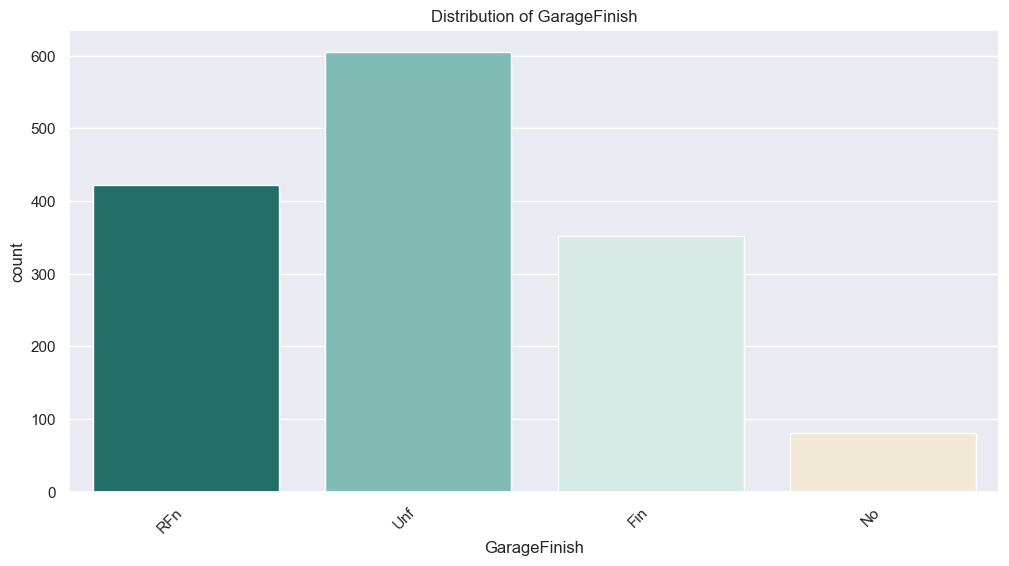

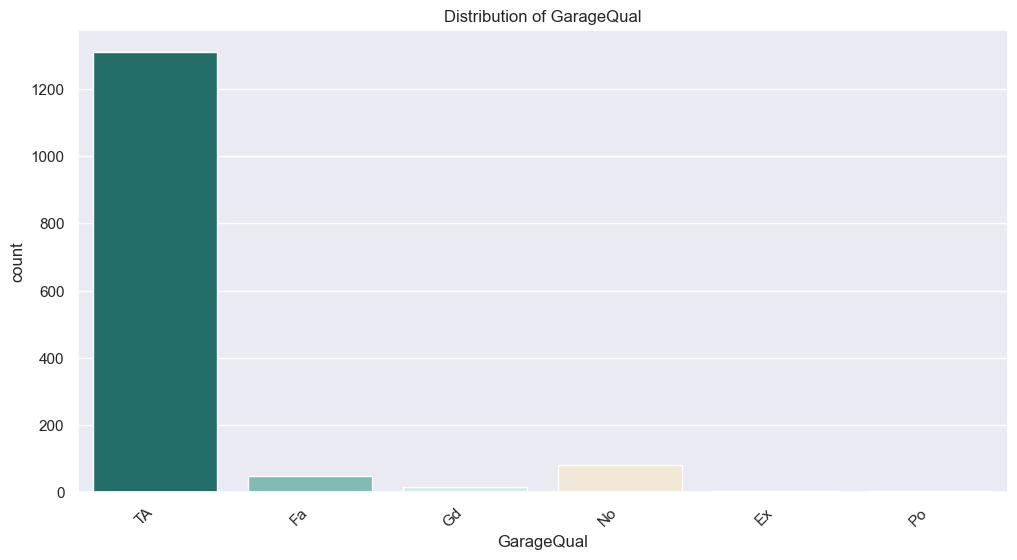

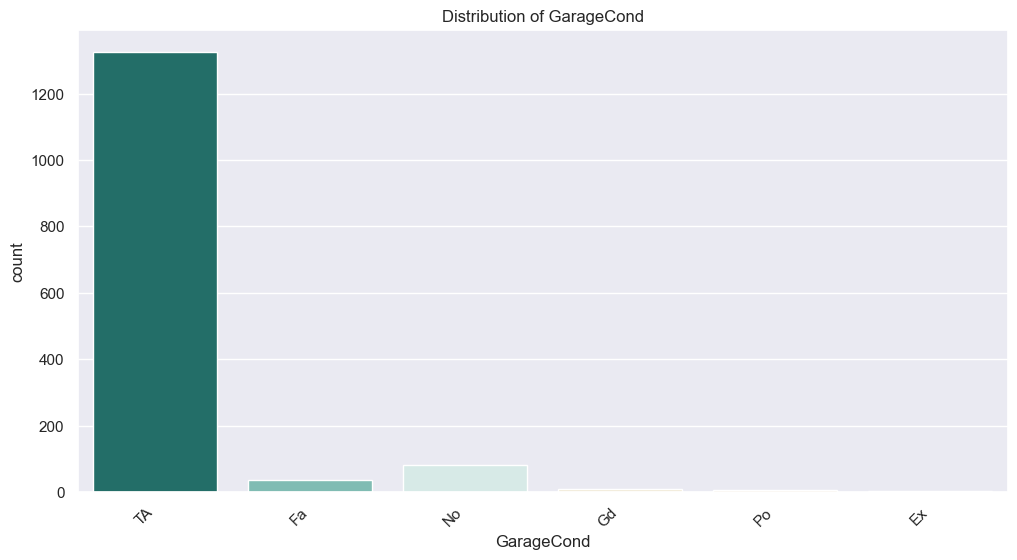

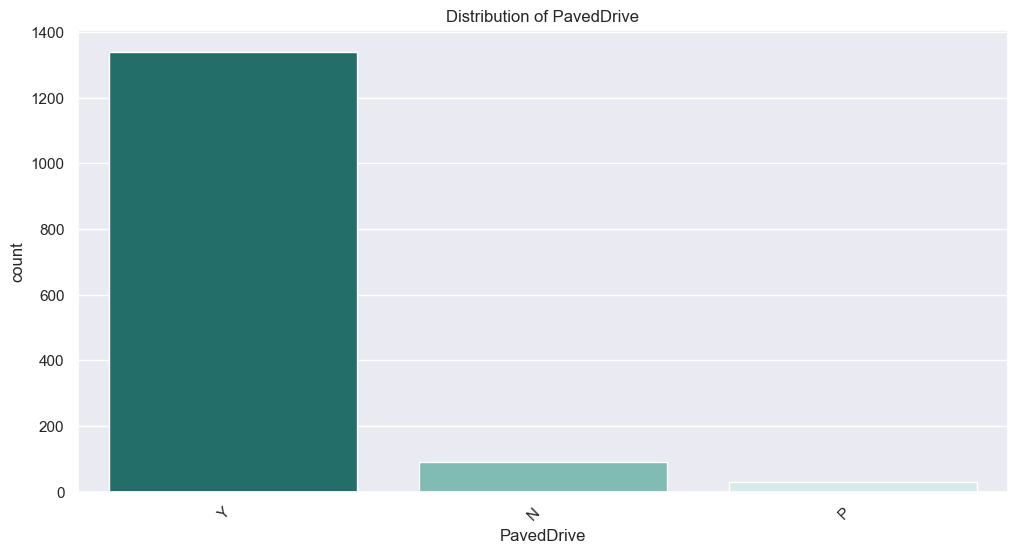

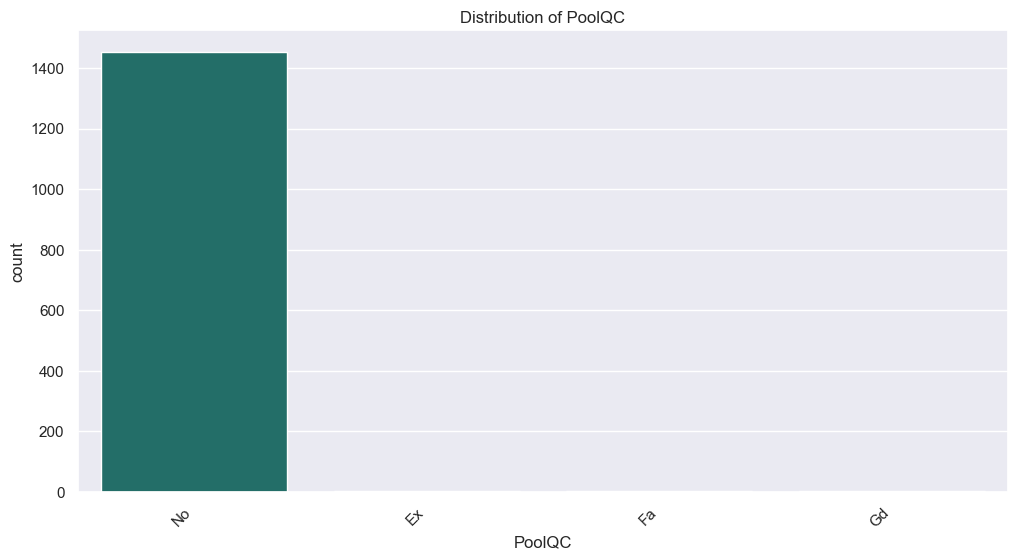

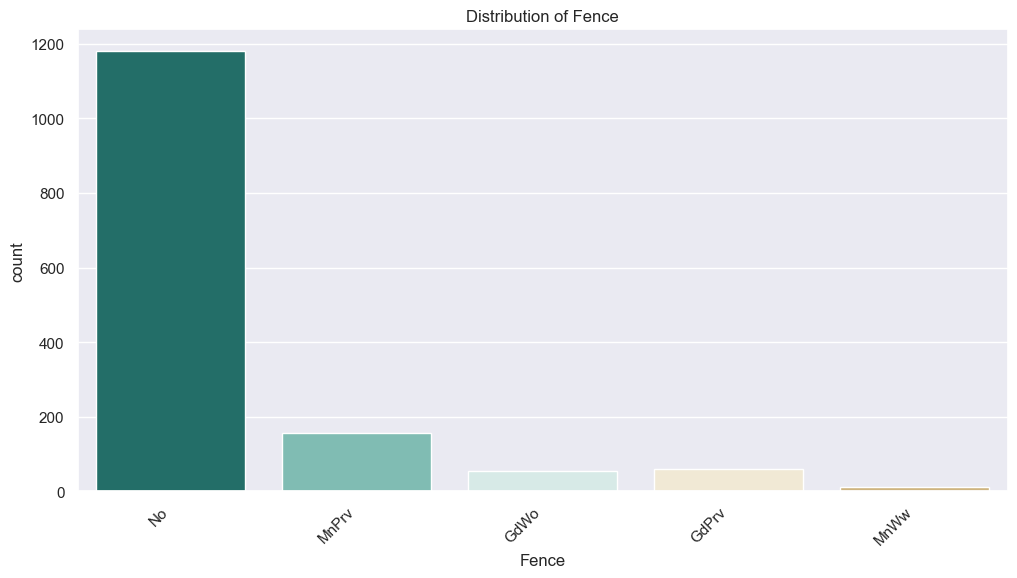

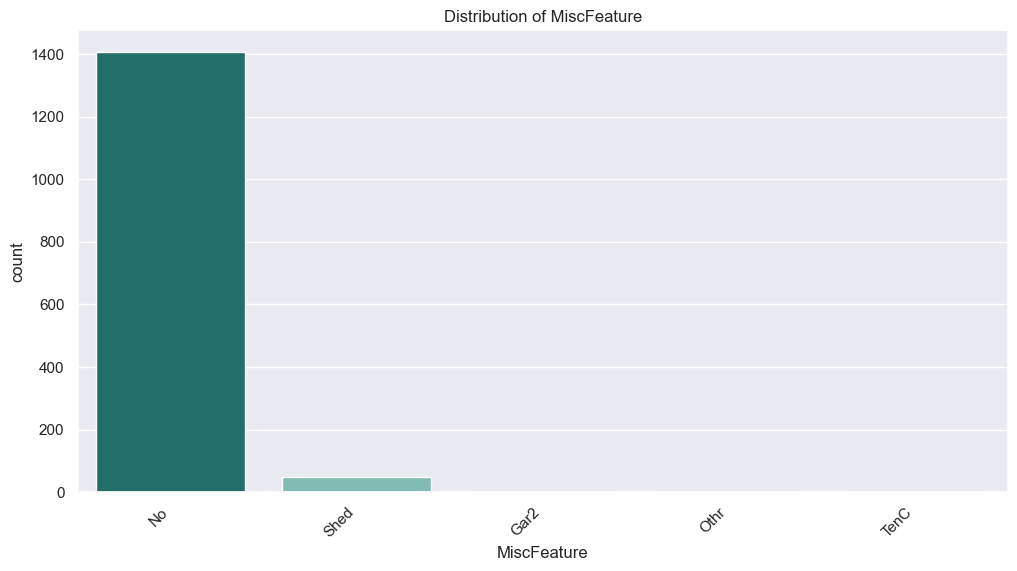

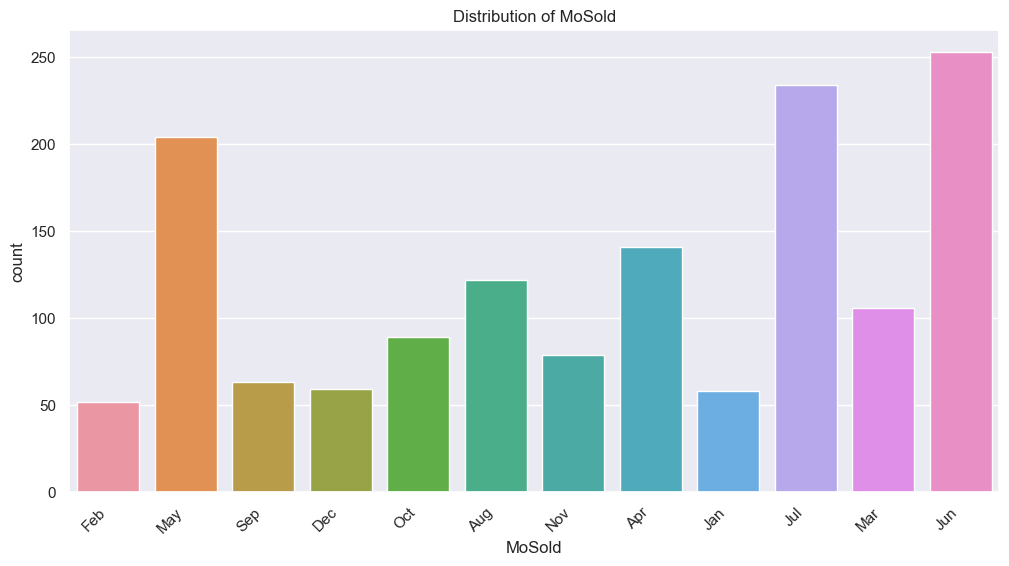

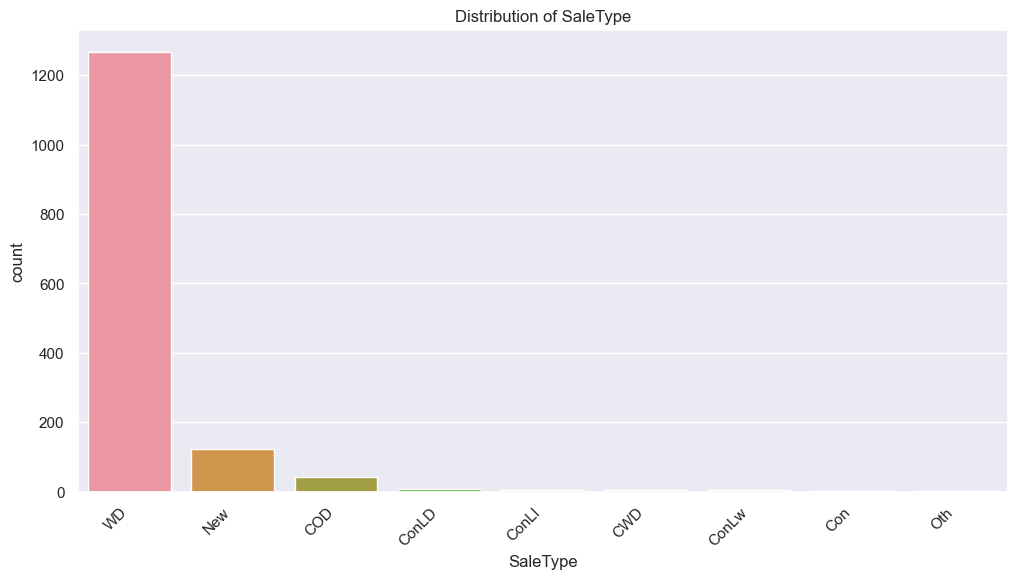

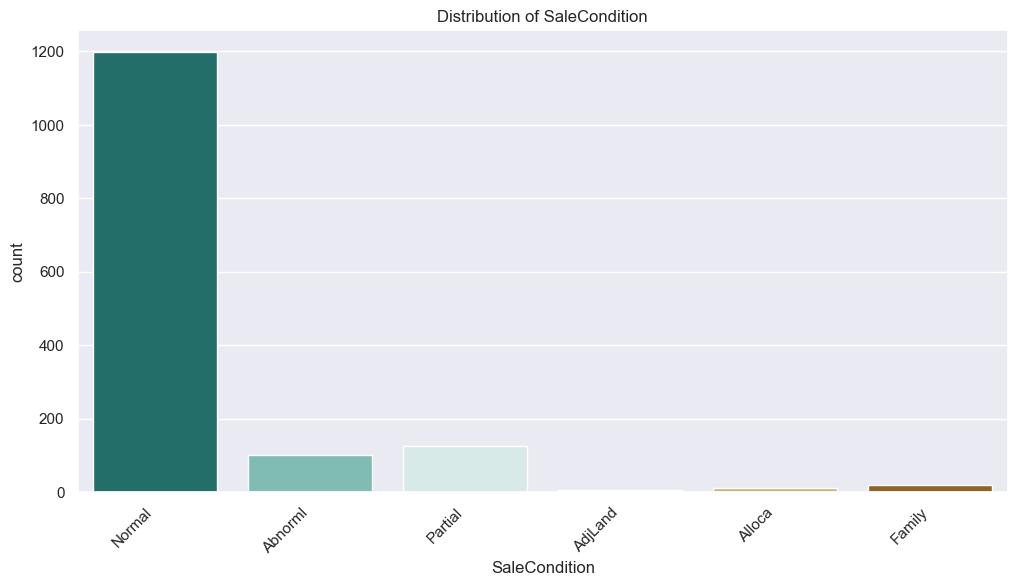

In [32]:
categorical_columns = df1.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
    sns.countplot(x=column, data=df1)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis ticks for better readability
    plt.show()


In [33]:
df1['Street'].value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

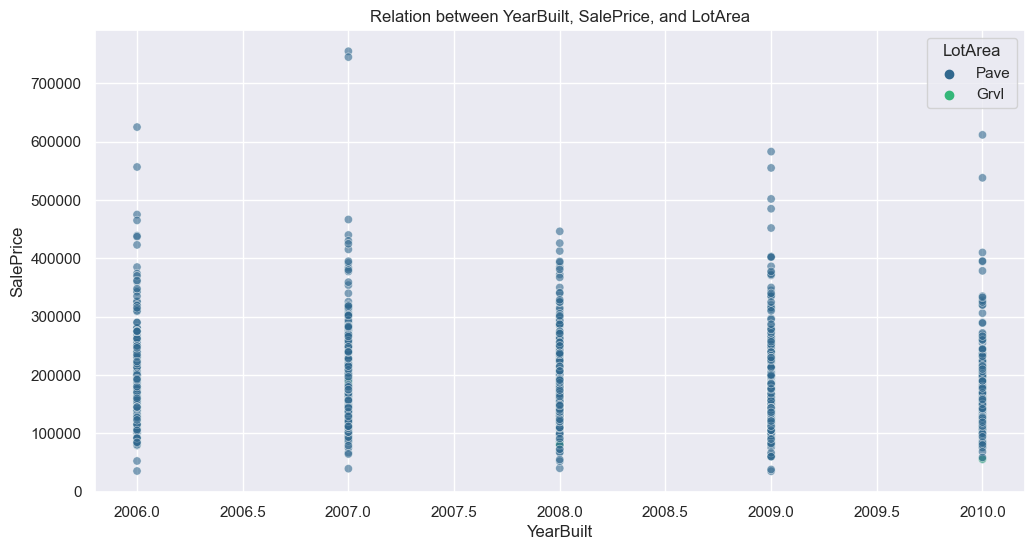

In [34]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='YrSold', y='SalePrice', hue='Street', data=df1, alpha=0.6, palette='viridis')
plt.title('Relation between YearBuilt, SalePrice, and LotArea')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.legend(title='LotArea')
plt.show()

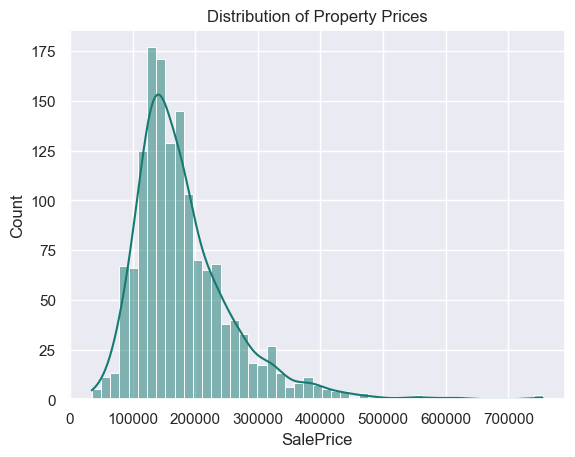

In [35]:
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of Property Prices')
plt.show()


In [ ]:
# in above findings its clear that saleprice is skew position as its tail is on right side.

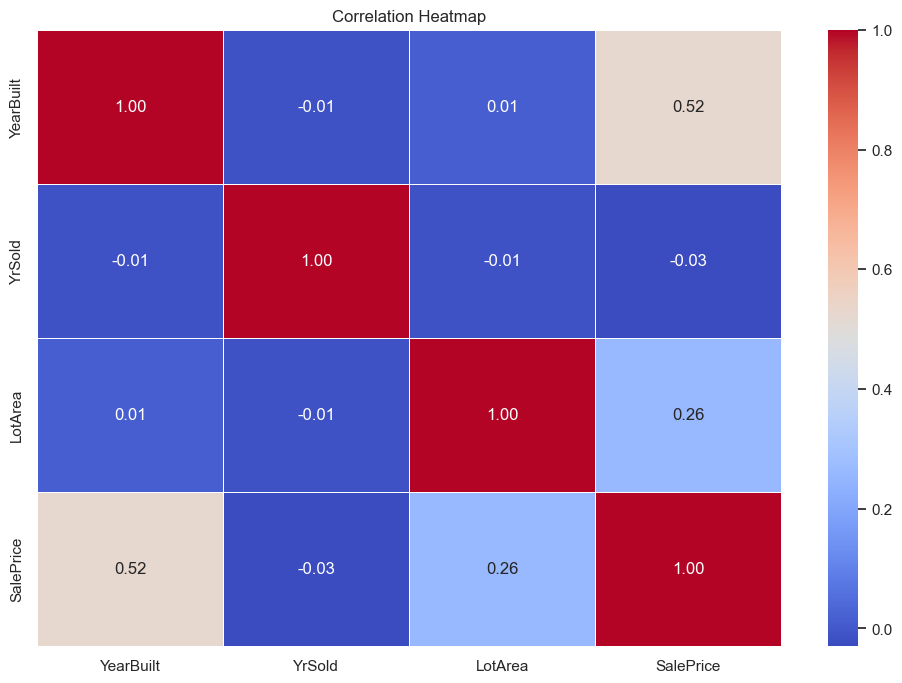

In [36]:
columns_of_interest = [ 'YearBuilt', 'YrSold','LotArea', 'SalePrice']

correlation_matrix = df[columns_of_interest].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [37]:
#Year built and saleprice is highly correlated

In [38]:
df1['SaleType'].value_counts()

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

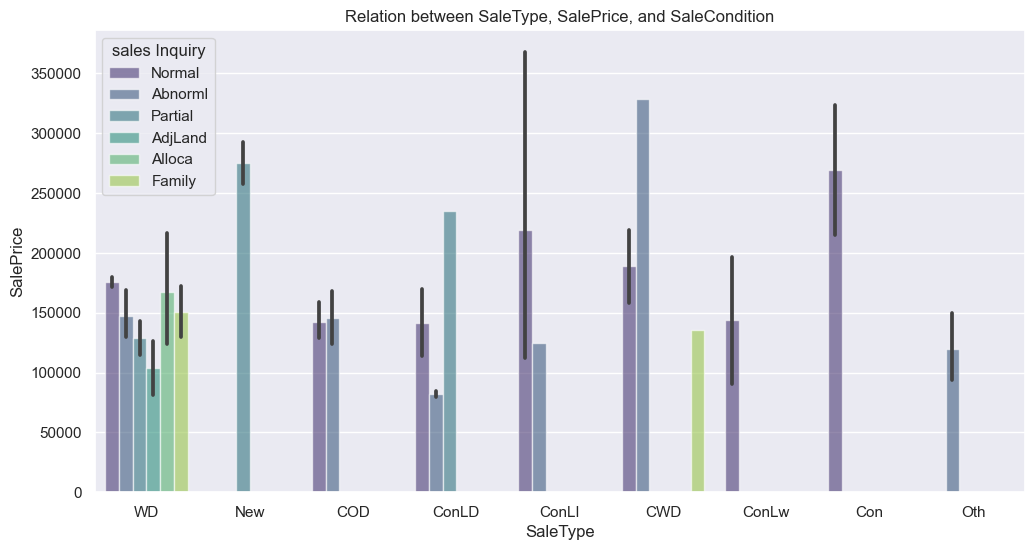

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(x='SaleType', y='SalePrice', hue='SaleCondition', data=df1, alpha=0.6, palette='viridis')
plt.title('Relation between SaleType, SalePrice, and SaleCondition')
plt.xlabel('SaleType')
plt.ylabel('SalePrice')
plt.legend(title='sales Inquiry')
plt.show()

In [40]:
import plotly.express as px

fig = px.scatter_3d(df1, x='SaleType', y='SaleCondition', z='SalePrice', opacity=0.6, color='SalePrice', size_max=10, size='SalePrice',
                    labels={'SaleType': 'Sale Type', 'SaleCondition': 'SaleCondition', 'SalePrice': 'Sale Price'})

fig.update_layout(scene=dict(zaxis=dict(nticks=4, tickangle=45)))

fig.show()


In [52]:
df1['Utilities'].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

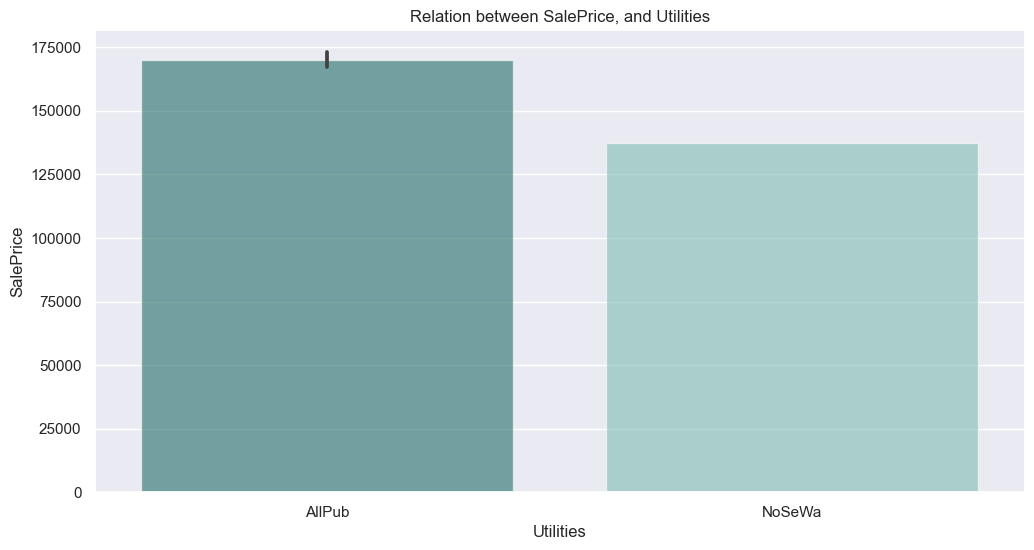

In [56]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Utilities', y='SalePrice', data=df1, alpha=0.6)
plt.title('Relation between SalePrice, and Utilities')
plt.xlabel('Utilities')
plt.ylabel('SalePrice')
plt.show()

In [61]:
df1['Neighborhood'].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

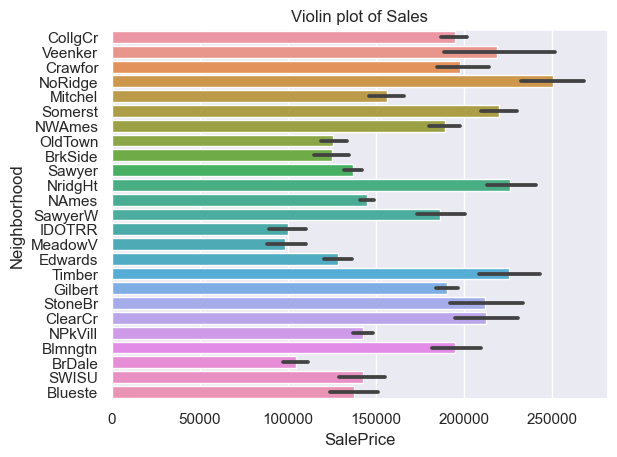

In [63]:
# Violin plots
sns.barplot(x='SalePrice',y='Neighborhood',data=df1)
plt.title('Violin plot of Sales')
plt.show()

In [64]:
df1['Alley'].value_counts()

Alley
Grvl    1419
Pave      41
Name: count, dtype: int64

TypeError: Neither the `x` nor `y` variable appears to be numeric.